## Outlines

- Data Wrangling
- Data Cleaning
- Visualizations

## Notes
- <span style="color:red">**PROVE ALL YOUR ANSWERS WITH GRAPHS IF AVAILABLE**.
- All problems **MUST** be solved.
- Read the problems well, before you start solving.
- The solution **MUST** pass all the test cases.
- Feel free to add more cells to develope the program, **BUT** make sure you gather them in ONE adequately working code cell.  

#### **Good Luck**

## <span style="color:blue">Problem statment

The content, tone, and format of job bulletins can influence the quality of the applicant pool. Overly-specific job requirements may discourage diversity. The Los Angeles Mayor’s Office wants to reimagine the city’s job bulletins by using text analysis to identify needed improvements.

The goal is to convert a folder full of plain-text job postings into a single structured CSV file and then to use this data to answer the questions provided below


## <span style="color:blue">Data Description

The job bulletins will be provided as a folder of plain-text files, one for each job classification.

Job Bulletins: 683 plain-text job postings

Instructions and Additional Documents:

- Job Bulletins with Annotations

- Annotation Descriptions.docx

- City Job Paths

- PDFs

- Description of promotions in job bulletins.docx

- Job_titles.csv

- Kaggle_data_dictionary.csv


### <span style="color:orange">Task 1

Create a descriptive csv file from the plain-text samples with the followoing columns:

- FILE_NAME: The bulletins file name.
- JOB_CLASS_TITLE: Job title.
- JOB_CLASS_NO: Job number.
- JOB_DUTIES: The duties of this job.
- EDUCATION_YEARS: Number of education yeras needed to apply for this job.
- SCHOOL_TYPE: The type of school you need to study in.
- EDUCATION_MAJOR: The eductaion major you study in this school.
- EXPERIENCE_LENGTH: The number of experience years needed to apply for this job .
- FULL_TIME_PART_TIME: If the job is full time or part time or both.
- EXP_JOB_CLASS_TITLE: The title of the job you must have experience in before applying in this job.
- COURSE_COUNT: Number of courses neede to apply for this job.
- COURSE_LENGTH: The course length in years or months.
- COURSE_SUBJECT: The course subject tha is needed to be accepted in this job.
- DRIVERS_LICENSE_REQ: Is driver license required or not for this job.
- EXAM_TYPE: Type of exams neededin the hiring process.
- ENTRY_SALARY: Salary range in this job.
- OPEN_DATE: Date at it the job bulliten got open.
- REQUIREMENT_SET_TEXT: The requirments set need for this job in points.

In [ ]:
from google.colab import drive
import os
import re
import csv
import pandas as pd


In [ ]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#file name
import os
import pandas as pd
import spacy
from tqdm import tqdm

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Add the path of text files
path_to_files = "/content/drive/MyDrive/Data/jobs"

# Create an empty DataFrame with the columns
columns = [
    "FILE_NAME", "JOB_CLASS_TITLE", "JOB_CLASS_NO", "JOB_DUTIES",
    "EDUCATION_YEARS", "SCHOOL_TYPE", "EDUCATION_MAJOR",
    "EXPERIENCE_LENGTH", "FULL_TIME_PART_TIME", "EXP_JOB_CLASS_TITLE",
    "COURSE_COUNT", "COURSE_LENGTH", "COURSE_SUBJECT",
    "DRIVERS_LICENSE_REQ", "EXAM_TYPE", "ENTRY_SALARY",
    "OPEN_DATE", "REQUIREMENT_SET_TEXT"
]
df = pd.DataFrame(columns=columns)

# Loop through each text file
for filename in tqdm(os.listdir(path_to_files)):
    if filename.endswith(".txt"):
        file_path = os.path.join(path_to_files, filename)

        # Read the content of the text file
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            text = file.read()

        # Directly i used the filename from the loop
        file_name = filename

        # Added new row to the DataFrame
        new_row = {"FILE_NAME": file_name}
        df = df.append(new_row, ignore_index=True)

# Save the DataFrame to a CSV file
df.to_csv("jobbs_descriptive.csv", index=False)


  0%|          | 0/683 [00:00<?, ?it/s]<ipython-input-83-746a5aa878d1>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
<ipython-input-83-746a5aa878d1>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
<ipython-input-83-746a5aa878d1>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
<ipython-input-83-746a5aa878d1>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
<ipython-input-83-746a5aa878d1>:38: FutureWarning: The frame.append method is deprecated and will be remo

In [ ]:
#job title
#job title
import os
import pandas as pd


path_to_files = "/content/drive/MyDrive/Data/jobs"

existing_csv_path = "jobbs_descriptive.csv"


df = pd.read_csv(existing_csv_path)
###########################################################
# Loop through each text file
for filename in os.listdir(path_to_files):
    if filename.endswith(".txt"):
        file_path = os.path.join(path_to_files, filename)

        # Read the first line of the text file to extract job title
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            first_line = file.readline().strip()

        # Update the DataFrame with the extracted job title
        df.loc[df["FILE_NAME"] == filename, "JOB_CLASS_TITLE"] = first_line

# Save the updated DataFrame to the existing CSV file
df.to_csv(existing_csv_path, index=False)

In [ ]:
#job number update
import os
import pandas as pd
import spacy
from spacy.matcher import Matcher
from tqdm import tqdm

# Load spaCy
nlp = spacy.load("en_core_web_sm")

# ######
path_to_files = "/content/drive/MyDrive/Data/jobs"

# #########
existing_csv_path = "jobbs_descriptive.csv"

# Read the existing CSV file
df = pd.read_csv(existing_csv_path)

# Initialize Matcher
matcher = Matcher(nlp.vocab)

# Define a pattern to match "Class Code:" followed by digits
pattern = [{"LOWER": "class"}, {"LOWER": "code"}, {"IS_PUNCT": True, "OP": "?"}, {"SHAPE": "dddd"}]

# Add the pattern to the Matcher
matcher.add("JOB_CLASS_NO", [pattern])

# Function to extract job number using spaCy
def extract_job_number(text):
    doc = nlp(text)
    matches = matcher(doc)

    # Extract job number from matches
    job_number = None
    for match_id, start, end in matches:
        if nlp.vocab.strings[match_id] == "JOB_CLASS_NO":
            job_number = doc[start:end].text

    # If job number contains non-digit characters, extract only the digits
    if job_number:
        job_number = ''.join(c for c in job_number if c.isdigit())

    return job_number

# Loop through each text file
for filename in tqdm(os.listdir(path_to_files)):
    if filename.endswith(".txt"):
        file_path = os.path.join(path_to_files, filename)

        # Reading the file
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            text = file.read()

        # Extract job number using spaCy
        job_number = extract_job_number(text)

        # Add job number to the DataFrame
        df.loc[df['FILE_NAME'] == filename, 'JOB_CLASS_NO'] = job_number

# Save the updated DataFrame to the existing CSV file
df.to_csv(existing_csv_path, index=False)


100%|██████████| 683/683 [04:02<00:00,  2.81it/s]


In [ ]:
#Entry_salary
import os
import pandas as pd
from tqdm import tqdm
import re

# Directory containing text files
path_to_files = "/content/drive/MyDrive/Data/jobs"

# Existing CSV file path
existing_csv_path = "jobbs_descriptive.csv"

# Read the existing CSV file into a DataFrame
df = pd.read_csv(existing_csv_path)

# Function to extract salary information using the provided salary function
def salary(content):
    try:
        salary_regex = re.compile(r'\$(\d+,\d+)((\s(to|and)\s)(\$\d+,\d+))?')  # match salary
        sal = re.search(salary_regex, content)
        if sal:
            range1 = sal.group(1)
            if range1 and '$' not in range1:
                range1 = '$' + range1
            range2 = sal.group(2)
            if range2:
                range2 = sal.group(2).replace('to', '')
                range2 = range2.replace('and', '')
            if range1 and range2:
                return f"{range1}-{range2.strip()}"
            elif range1:
                return f"{range1} (flat-rated)"
        else:
            return ''
    except Exception as e:
        return ''

# Loop through each text file
for filename in tqdm(os.listdir(path_to_files)):
    if filename.endswith(".txt"):
        file_path = os.path.join(path_to_files, filename)

        # Read the content of the text file with error handling
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            text_data = file.read()

        # Extract salary information using the defined function
        entry_salary = salary(text_data)

        # Update the ENTRY_SALARY column in the DataFrame
        df.loc[df['FILE_NAME'] == filename, 'ENTRY_SALARY'] = entry_salary

# Save the updated DataFrame to the existing CSV file
df.to_csv(existing_csv_path, index=False)



100%|██████████| 683/683 [00:01<00:00, 414.37it/s]


In [ ]:
#MINIMUM_SALARY' and 'MAXIMUM_SALARY
import os
import pandas as pd
from tqdm import tqdm
import re

# Directory containing text files
path_to_files = "/content/drive/MyDrive/Data/jobs"

# Existing CSV file path
existing_csv_path = "jobbs_descriptive.csv"

# Read the existing CSV file into a DataFrame
df = pd.read_csv(existing_csv_path)

# Function to extract salary information using the provided salary function
def salary(content):
    try:
        salary_regex = re.compile(r'\$(\d+,\d+)((\s(to|and)\s)(\$\d+,\d+))?')  # match salary
        sal = re.search(salary_regex, content)
        if sal:
            range1 = sal.group(1)
            range2 = sal.group(5) if sal.group(5) else sal.group(1)
            if range1 and '$' not in range1:
                range1 = '$' + range1
            if range2 and '$' not in range2:
                range2 = '$' + range2
            return f"{range1}-{range2.strip()}"
        else:
            return ''
    except Exception as e:
        return ''

# Loop through each text file
for filename in tqdm(os.listdir(path_to_files)):
    if filename.endswith(".txt"):
        file_path = os.path.join(path_to_files, filename)

        # Read the content of the text file with error handling
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            text_data = file.read()

        # Extract salary information using the defined function
        entry_salary = salary(text_data)

        # Update the ENTRY_SALARY column in the DataFrame
        df.loc[df['FILE_NAME'] == filename, 'ENTRY_SALARY'] = entry_salary

# Split the salary range into 'MINIMUM_SALARY' and 'MAXIMUM_SALARY' columns
df[['MINIMUM_SALARY', 'MAXIMUM_SALARY']] = df['ENTRY_SALARY'].str.split('-', expand=True)

# Save the updated DataFrame to the existing CSV file
df.to_csv(existing_csv_path, index=False)


100%|██████████| 683/683 [00:01<00:00, 492.66it/s]


In [ ]:
pip install inflect

In [ ]:
pip install word2number


In [ ]:
#Education Years
import os
import pandas as pd
from tqdm import tqdm
from word2number import w2n  # Import the library

path_to_files = "/content/drive/MyDrive/Data/jobs"

existing_csv_path = "jobbs_descriptive.csv"

# Read the existing CSV file
df = pd.read_csv(existing_csv_path)

# Function to extract information using spaCy
def extract_education_years(text):
    # Find the position of "Graduation" and extract the relevant text
    graduation_position = text.find("Graduation")
    education_years_text = text[graduation_position + len("Graduation"):graduation_position + 100]

    # Use word2number library to convert words to numeric values
    try:
        education_years = w2n.word_to_num(education_years_text)
        return education_years
    except ValueError:
        return None

# Loop through each text file in the specified directory
for filename in tqdm(os.listdir(path_to_files)):
    if filename.endswith(".txt"):
        file_path = os.path.join(path_to_files, filename)

        # Read the content of the text file
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            text = file.read()

        # Extract education years using spaCy
        education_years = extract_education_years(text)

        # Update the EDUCATION_YEARS column in the DataFrame
        df.loc[df['FILE_NAME'] == filename, 'EDUCATION_YEARS'] = education_years

# Save the updated DataFrame to the existing CSV file
df.to_csv(existing_csv_path, index=False)


100%|██████████| 683/683 [00:01<00:00, 360.53it/s]


In [ ]:
#job duties
import os
import pandas as pd
import re

# Replace 'path_to_your_files' with the actual path to your text files
path_to_files = "/content/drive/MyDrive/Data/jobs"

existing_csv_path = "jobbs_descriptive.csv"

df = pd.read_csv(existing_csv_path)

# Function to extract job duties between "DUTIES" and the next period (.)
def extract_job_duties(text):
    # Use regex to find text between "DUTIES" and the next period (.)
    match = re.search(r'\bDUTIES\b(.*?)(?=\.)', text, re.DOTALL | re.IGNORECASE)

    if match:
        job_duties_text = match.group(1).strip()
        return job_duties_text
    else:
        return None

# Loop through each text file in the specified directory
for filename in os.listdir(path_to_files):
    if filename.endswith(".txt"):
        file_path = os.path.join(path_to_files, filename)

        # Read the content of the text file
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            text = file.read()

        # Extract job duties between "DUTIES" and the next period (.)
        job_duties = extract_job_duties(text)

        # Update the JOB_DUTIES column in the DataFrame
        df.loc[df['FILE_NAME'] == filename, 'JOB_DUTIES'] = job_duties

# Save the updated DataFrame to the existing CSV file
df.to_csv(existing_csv_path, index=False)


In [ ]:
#shcool type

import os
import pandas as pd
import spacy
from tqdm import tqdm

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

path_to_files = "/content/drive/MyDrive/Data/jobs"

existing_csv_path = "jobbs_descriptive.csv"

# Read the existing CSV file
df = pd.read_csv(existing_csv_path)

def extract_school_type(text):
    # Define keywords and corresponding school types
    keywords = {
        "PhD": "University",
        "Doctor": "University",
        "Master": "University",
        "Bachelor": "University",
        "Diploma": "College",
        "High School": "High School"
    }

    # Initialize school type to None
    school_type = None

    # Process the text with spaCy
    doc = nlp(text)

    # Check for each keyword in the document
    for token in doc:
        for keyword, type_value in keywords.items():
            if token.text.lower() == keyword.lower():
                school_type = type_value
                break  # Stop searching if a match is found

    return school_type

# Loop through each text file in the specified directory
for filename in tqdm(os.listdir(path_to_files)):
    if filename.endswith(".txt"):
        file_path = os.path.join(path_to_files, filename)

        # Read the content of the text file
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            text = file.read()

        # Extract school type using spaCy
        school_type = extract_school_type(text)

        # Update the SCHOOL_TYPE column in the DataFrame
        df.loc[df['FILE_NAME'] == filename, 'SCHOOL_TYPE'] = school_type

# Save the updated DataFrame to the existing CSV file
df.to_csv(existing_csv_path, index=False)


100%|██████████| 683/683 [04:02<00:00,  2.81it/s]


In [ ]:
#Education major
import os
import spacy
import pandas as pd
from spacy.matcher import PhraseMatcher

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Education majors
education_majors = [
    "Agribusiness Operations", "Airport Guide", "Computer Engineering", "Airport", "Agricultural Business",
    "Agricultural Economics", "Carpet Layer", "Agricultural Mechanization", "Agricultural Production",
    "Agronomy & Crop Science", "Agriculture", "Animal Sciences", "Food Sciences",
    "Horticulture Operations & Management", "Horticulture Science", "Natural Resources Conservation",
    "Environmental Science", "Forestry", "Natural Resources Management",
    "Wildlife & Wildlands Management", "Architecture", "Architectural Environmental Design",
    "Regional Planning", "Interior Architecture", "Landscape Architecture", "African American Studies",
    "Women’s Studies", "Liberal Arts", "General Studies", "Library Science", "Interdisciplinary",
    "Art History", "Criticism", "Studio Arts", "Art", "Cinematography", "Video Production", "Dancing",
    "Design & Visual Communications", "Fashion", "Apparel Design", "Graphic Design", "Industrial Design",
    "Interior Design", "Music", "Photography", "Theatre Arts", "Drama", "Accounting Technician",
    "Accounting", "Business Administration & Management", "Hotel Management", "Human Resources Management",
    "Human Resources", "International Business Management", "Labor", "Industrial Relations",
    "Logistics & Materials Management", "Marketing Management & Research",
    "Office Supervision & Management", "Operations Management & Supervision", "Organizational Behavior",
    "Contracts Management", "Food Services Management", "Small Business Management/Operations",
    "Tourism Management", "Actuarial Science", "Auto Body and Fender Repairer", "Auto Body Builder",
    "Body Builder", "Business", "Managerial Economics", "Finance", "Banking & Financial Support Services",
    "Financial Planning & Services", "Insurance & Risk Management", "Investments & Securities",
    "Management Information Systems", "Real Estate", "Sales", "Merchandising", "Marketing",
    "Fashion Merchandising", "Tourism & Travel Marketing", "Secretarial Studies & Office Administration",
    "Communications", "Advertising", "Digital Communications", "Media", "Journalism", "Mass Communications",
    "Public Relations & Organizational Communication", "Radio & Television Broadcasting",
    "Communications", "Graphic & Printing Equipment Operation", "Multimedia", "Animation",
    "Special Effects", "Radio & Television Broadcasting", "Family & Consumer Sciences",
    "Adult Development & Aging/Gerontology", "Child Care Services Management", "Child Development",
    "Consumer & Family Economics", "Food & Nutrition", "Textile & Apparel", "Parks, Recreation, & Leisure",
    "Exercise Science", "Physiology", "Kinesiology", "Physical Education", "Fitness",
    "Administration Management", "Personal Services", "Cosmetology", "Culinary Arts", "Chef Training",
    "Funeral Services & Mortuary Science", "Protective Services", "Corrections", "Criminal Justice",
    "Fire Protection & Safety", "Law Enforcement", "Military Technologies", "Public Administration & Services",
    "Community Organization & Advocacy", "Public Administration", "Public Affairs & Public Policy Analysis",
    "Social Work", "Computer Science", "Geographical Information Systems", "Information System",
    "Mathematics", "Computer & Information Sciences", "Computer Networking", "Telecommunications",
    "Computer Programming", "Computer Software & Media Applications", "Computer System Administration",
    "Data Management", "Information Science", "Webpage Design", "Mathematics", "Applied Mathematics",
    "Statistics", "Counseling & Student Services", "Educational Administration", "Special Education",
    "Teacher Education", "Curriculum", "Early Childhood Education", "Elementary Education",
    "Junior High/Middle School Education", "Postsecondary Education", "Secondary Education",
    "Teacher Assisting", "Aide Education", "Teacher Education, Subject-Specific",
    "Agricultural Education", "Art Education", "Business Education", "Technical Education",
    "English-as-a-Second-Language Education", "English/Language Arts Education",
    "Foreign Languages Education", "Health Education", "Mathematics Education",
    "Music Education", "Physical Education", "Science Education", "Social Studies",
    "Sciences Education", "Aerospace Engineering", "Aeronautical Engineering",
    "Agricultural/Bioengineering", "Architectural Engineering", "Biomedical Engineering",
    "Chemical Engineering", "Civil Engineering", "Computer Engineering",
    "Construction Engineering/Management", "Electrical, Electronics & Communications Engineering",
    "Environmental Health Engineering", "Industrial Engineering", "Mechanical Engineering",
    "Nuclear Engineering", "Engineering Technology & Drafting", "Architectural Drafting",
    "Mechanical Drafting", "Engineering", "Engineering", "Drafting",
    "Aeronautical/Aerospace Engineering Technologies", "Architectural Engineering",
    "Automotive Engineering", "Civil Engineering", "Computer Engineering", "Construction",
    "Engineering", "Electrical Engineering", "Electronics Engineering",
    "Electromechanical Engineering", "Electromechanical", "Biomedical Engineering",
    "Environmental Control", "Industrial Production Technologies", "Mechanical Engineering",
    "Quality Control & Safety Technologies", "Surveying", "English Language",
    "American/English Literature", "Creative Writing", "Public Speaking", "Foreign Languages",
    "Asian Languages", "Ancient Languages", "Literatures", "Comparative Literature",
    "French Language & Literature", "German Language & Literature", "Linguistics",
    "Middle Eastern Languages & Literatures", "Spanish Language & Literature",
    "Health Administration & Assisting", "Health Services Administration",
    "Facilities Administration", "Medical Office", "Secretarial", "Medical Records",
    "Medical Clinical Assisting", "Dental Assisting", "Medical Assisting",
    "Occupational Therapy Assisting", "Physical Therapy Assisting", "Veterinarian Assisting",
    "Health Sciences & Technologies", "Chiropractic", "Dental Hygiene", "Dentistry",
    "Emergency Medical", "Health-Related Professions & Services", "Athletic Training",
    "Public Health", "Medical Laboratory", "Medical Radiologic", "Nuclear Medicine",
    "Respiratory Therapy", "Building and Safety", "Safety and Health",
    "Surgical", "Medicine", "Nursing, Practical", "Nursing, Registered",
    "Pharmacy", "Physician Assisting", "Therapy & Rehabilitation",
    "Alcohol/Drug Abuse Counseling", "Massage Therapy", "Mental Health Counseling",
    "Occupational Therapy", "Physical Therapy", "Psychiatric", "Mental Health Technician",
    "Rehabilitation Therapy", "Vocational Rehabilitation Counseling", "Veterinary Medicine",
    "Philosophy", "Theology", "Biblical Studies", "Divinity", "Ministry",
    "Marketing", "Refrigeration and Air Conditioning", "Refrigeration", "Air Conditioning",
    "Religious Education", "Aviation & Airway Science", "Aircraft Piloting & Navigation",
    "Aviation Management & Operations", "Construction Trades", "Mechanics & Repairers",
    "Aircraft Mechanics/Technology", "Autobody Repair/Technology", "Automotive Mechanics/Technology",
    "Avionics", "Diesel Mechanics", "Electrical/Electronics Equip Installation & Repair",
    "Precision Production Trades", "Machine Tool", "Welding", "Biology",
    "Biochemistry & Biophysics", "Cellular Biology", "Ecology", "Genetics",
    "Marine/Aquatic Biology", "Microbiology & Immunology", "Zoology",
    "Physical Sciences", "Astronomy", "Atmospheric Sciences & Meteorology",
    "Chemistry", "Geological & Earth Sciences", "Physics", "Social Sciences & Law",
    "Legal Studies", "Court Reporting", " Law ", "Legal Administrative Assisting/Secretarial",
    "Paralegal/Legal Assistant", "Social Sciences", "Anthropology", "Criminology",
    "Economics", "Geography", "History", "International Relations & Affairs",
    "Political Science & Government", "Clinical & Counseling", "Psychology",
    "Sociology", "Science", "Accounting", "Acounting", "Engineering", "Maintenance"
]

# Function to get major using spaCy
def get_major(text_data):
    doc = nlp(text_data)
    matcher = PhraseMatcher(nlp.vocab)

    # Convert majors to a list of Doc objects
    major_docs = [nlp(major) for major in education_majors]

    # Add the patterns to the matcher
    matcher.add("EDUCATION_MAJOR", None, *major_docs)

    # Find matches in the text
    matches = matcher(doc)
    if matches:
        return doc[matches[0][1]:matches[0][2]].text.upper()
    return None

files_directory = "/content/drive/MyDrive/Data/jobs"

# CSV file path
csv_file_path = "jobbs_descriptive.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Iterate through text files in the directory
for filename in os.listdir(files_directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(files_directory, filename)

        # Read the content of the text file with error handling
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            text_data = file.read()

        # Extract major using spaCy
        major = get_major(text_data)

        # Update the 'EDUCATION_MAJOR' column in the DataFrame
        df.loc[df['FILE_NAME'] == filename, 'EDUCATION_MAJOR'] = major

# Save the updated DataFrame to the CSV file
df.to_csv(csv_file_path, index=False)


In [ ]:
#EXPERIENCE_LENGTH
import os
import pandas as pd
import spacy
from spacy.matcher import Matcher
from concurrent.futures import ProcessPoolExecutor
import numpy as np
import re

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# CSV file path
csv_file_path = "jobbs_descriptive.csv"

# Function to extract experience length from the requirements text using spaCy and additional regex
def get_experience_length(text):
    # spaCy Matcher patterns
    doc = nlp(text)
    matcher = Matcher(nlp.vocab)
    patterns = [
        [{"LOWER": {"in": ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]}}, {"LOWER": {"in": ["year", "years"]}}],
    ]
    matcher.add("EXPERIENCE", patterns)
    matches = matcher(doc)

    # Process spaCy matches to extract numerical values
    for match_id, start, end in matches:
        match_text = doc[start:end].text
        try:
            # Try converting to int directly
            return int(match_text.lower().split()[0])
        except ValueError:
            # If it's not a numeric value, try to map words to numbers
            words_to_numbers = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9}
            return words_to_numbers.get(match_text.lower().split()[0], np.nan)

    # Additional regex pattern
    regex_pattern = r"(\d+) (years|months) of (full|part)-?time (paid|volunteer) experience .*?\."
    regex_matches = re.findall(regex_pattern, text, flags=re.IGNORECASE)
    if regex_matches:
        # If there are regex matches, return the first numeric value
        return int(regex_matches[0][0])

    return np.nan

# Directory containing text files
files_directory = "/content/drive/MyDrive/Data/jobs"

df = pd.read_csv(csv_file_path)

# Function to process a single file
def process_file(filename):
    file_path = os.path.join(files_directory, filename)

    # Read the content of the text file with error handling
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        text_data = file.read()

    # Extract experience length using the combined function
    experience_length = get_experience_length(text_data)

    return filename, experience_length

# Use parallel processing to speed up file processing
with ProcessPoolExecutor() as executor:
    results = list(executor.map(process_file, df['FILE_NAME']))

# Update the DataFrame with the results
for filename, experience_length in results:
    df.loc[df['FILE_NAME'] == filename, 'EXPERIENCE_LENGTH'] = experience_length

# Save the updated DataFrame to the CSV file
df.to_csv(csv_file_path, index=False)


In [ ]:
#FULL_TIME_PART_TIME
import os
import pandas as pd
import spacy
from spacy.matcher import Matcher
from concurrent.futures import ProcessPoolExecutor
import numpy as np

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# CSV file path
csv_file_path = "jobbs_descriptive.csv"

# Function to extract full time / part time from the job description using spaCy
def get_full_part_time(text):
    doc = nlp(text)

    # Define spaCy Matcher patterns for full-time and part-time
    matcher = Matcher(nlp.vocab)
    full_time_pattern = [{"LOWER": "full"}, {"LOWER": "time"}]
    part_time_pattern = [{"LOWER": "part"}, {"LOWER": "time"}]

    matcher.add("FULL_TIME", [full_time_pattern])
    matcher.add("PART_TIME", [part_time_pattern])

    # Apply the matcher on the text
    matches = matcher(doc)

    # Process the matches to determine full-time, part-time, both, or neither
    full_time_found = any(match_id == nlp.vocab.strings["FULL_TIME"] for match_id, _, _ in matches)
    part_time_found = any(match_id == nlp.vocab.strings["PART_TIME"] for match_id, _, _ in matches)

    if full_time_found and part_time_found:
        return "BOTH"
    elif full_time_found:
        return "FULL_TIME"
    elif part_time_found:
        return "PART_TIME"
    else:
        return np.nan

files_directory = "/content/drive/MyDrive/Data/jobs"

df = pd.read_csv(csv_file_path)

# Function to process a single file
def process_file(filename):
    file_path = os.path.join(files_directory, filename)

    # Read the content of the text file with error handling
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        text_data = file.read()

    # Extract full time / part time using the defined function
    full_part_time = get_full_part_time(text_data)

    return filename, full_part_time

# Use parallel processing to speed up file processing
with ProcessPoolExecutor() as executor:
    results = list(executor.map(process_file, df['FILE_NAME']))

# Update the DataFrame with the results
for filename, full_part_time in results:
    df.loc[df['FILE_NAME'] == filename, 'FULL_TIME_PART_TIME'] = full_part_time

# Save the updated DataFrame to the CSV file
df.to_csv(csv_file_path, index=False)


In [ ]:
#- EXP_JOB_CLASS_TITLE
import os
import pandas as pd
import spacy
from spacy.matcher import Matcher
from concurrent.futures import ProcessPoolExecutor

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# CSV file path
csv_file_path = "jobbs_descriptive.csv"

# Function to extract job class title from the job description using spaCy
def get_exp_job_class_title(text):
    doc = nlp(text)

    # Define spaCy Matcher patterns for job class title extraction
    matcher = Matcher(nlp.vocab)
    job_title_pattern = [
        {"POS": {"in": ["NOUN", "PROPN"]}, "OP": "+"},
        {"LOWER": {"in": ["experience", "as", "at", "level"]}, "OP": "*"},
        {"POS": {"in": ["NOUN", "PROPN"]}, "OP": "+"},
    ]
    matcher.add("JOB_TITLE", [job_title_pattern])

    # Apply the matcher on the text
    matches = matcher(doc)

    # Process the matches to extract job class title
    if matches:
        start, end = matches[0][1], matches[0][2]
        exp_job_title = doc[start:end].text.strip()
        return exp_job_title

    return None

files_directory = "/content/drive/MyDrive/Data/jobs"

df = pd.read_csv(csv_file_path)

# Function to process a single file
def process_file(filename):
    file_path = os.path.join(files_directory, filename)

    # Read the content of the text file with error handling
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        text_data = file.read()

    # Extract job class title using the defined function
    exp_job_class_title = get_exp_job_class_title(text_data)

    return filename, exp_job_class_title

# Use parallel processing to speed up file processing
with ProcessPoolExecutor() as executor:
    results = list(executor.map(process_file, df['FILE_NAME']))

# Update the DataFrame with the results
for filename, exp_job_class_title in results:
    df.loc[df['FILE_NAME'] == filename, 'EXP_JOB_CLASS_TITLE'] = exp_job_class_title

# Save the updated DataFrame to the CSV file
df.to_csv(csv_file_path, index=False)


In [ ]:
#course count
import os
import pandas as pd
import spacy
from concurrent.futures import ProcessPoolExecutor

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# CSV file path
csv_file_path = "jobbs_descriptive.csv"

# Function to count the number of courses mentioned in the job description using spaCy
def count_courses(text):
    doc = nlp(text)

    # Initialize variable to store the count
    course_count = 0

    # Iterate through tokens in the document
    for token in doc:
        # Check for tokens indicating a course
        if token.text.lower() in ["course", "class", "unit", "program"]:
            course_count += 1

    return course_count

files_directory = "/content/drive/MyDrive/Data/jobs"

df = pd.read_csv(csv_file_path)

# Function to process a single file
def process_file(filename):
    file_path = os.path.join(files_directory, filename)

    # Read the content of the text file with error handling
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        text_data = file.read()

    # Count the number of courses using the defined function
    course_count = count_courses(text_data)

    return filename, course_count

# Use parallel processing to speed up file processing
with ProcessPoolExecutor() as executor:
    results = list(executor.map(process_file, df['FILE_NAME']))

# Update the DataFrame with the results
for filename, course_count in results:
    df.loc[df['FILE_NAME'] == filename, 'COURSE_COUNT'] = course_count

# Save the updated DataFrame to the CSV file
df.to_csv(csv_file_path, index=False)


In [ ]:
#course length
import os
import pandas as pd
from concurrent.futures import ProcessPoolExecutor
import re

# CSV file path
csv_file_path = "jobbs_descriptive.csv"

# Function to extract course length using the provided R function
def get_course_length(text):
    course_len_regex = r"(\d{1,3}) (quarter|semester|weeks) (unit)?(s)?"
    course_len_match = re.findall(course_len_regex, text, flags=re.IGNORECASE)

    total_semesters = 0
    for match in course_len_match:
        number, unit = match[0], match[1].lower()

        # Convert quarters to semesters (if unit is quarter)
        if unit == 'quarter':
            total_semesters += int(number) / 2
        elif unit == 'semester':
            total_semesters += int(number)
        elif unit == 'week':

            total_semesters += int(number) / 16  # Assuming 16 weeks per semester

    # Convert total semesters to years (1 year = 2 semesters)
    total_years = total_semesters / 2

    return total_years

# Directory containing text files
files_directory = "/content/drive/MyDrive/Data/jobs"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Function to process a single file
def process_file(filename):
    file_path = os.path.join(files_directory, filename)

    # Read the content of the text file with error handling
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        text_data = file.read()

    # Extract course length using the defined function
    course_length = get_course_length(text_data)

    return filename, course_length

# Use parallel processing to speed up file processing
with ProcessPoolExecutor() as executor:
    results = list(executor.map(process_file, df['FILE_NAME']))

# Update the DataFrame with the results
for filename, course_length in results:
    df.loc[df['FILE_NAME'] == filename, 'COURSE_LENGTH'] = course_length

# Save the updated DataFrame to the CSV file
df.to_csv(csv_file_path, index=False)


In [ ]:
df=pd.read_csv("jobbs_descriptive.csv")
df.head(30)

FILE_NAME  \
0       AIRPORT POLICE SPECIALIST 3236 063017 (2).txt   
1                     AIRPORT MANAGER 7260 120216.txt   
2   ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE 23...   
3       ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt   
4            ADMINISTRATIVE CLERK 1358 033018 (2).txt   
5             APPLICATIONS PROGRAMMER 1429 062918.txt   
6              APPARATUS OPERATOR 2121 071417 (1).txt   
7                    ACCOUNTING CLERK 1223 071318.txt   
8   AIRPORT POLICE OFFICER 3225 110906 Rev 060115.txt   
9           AIR CONDITIONING MECHANIC 3774 041417.txt   
10  AIRPORTS MAINTENANCE SUPERINTENDENT 3331 02151...   
11  AIRPORT CHIEF INFORMATION SECURITY OFFICER 140...   
12          AIRPORT POLICE LIEUTENANT 3227 091616.txt   
13                      311 DIRECTOR  9206 041814.txt   
14                         ACCOUNTANT 1513 062218.txt   
15                      AIRPORT GUIDE 0845 042018.txt   
16              ANIMAL CARE ASSISTANT 4323 020119.txt   
17                      ANIMAL KEEPER 4304 083118.txt   
18  AIR CONDITIONING MECHANIC SUPERVISOR 3781 1116...   
19                   AIRPORT ENGINEER 7256 070618.txt   
20  AIRPORTS PUBLIC AND COMMUNITY RELATIONS DIRECT...   
21     AIRPORT INFORMATION SPECIALIST 1783 121115.txt   
22                       AIRPORT AIDE 1540 081018.txt   
23             ADMINISTRATIVE ANALYST 1590 060118.txt   
24             AIRPORT POLICE CAPTAIN 3228 021618.txt   
25   AIRPORT LABOR RELATIONS ADVOCATE 9210 020119.txt   
26            ANIMAL CONTROL OFFICER  4311 061518.txt   
27  ANIMAL CARE TECHNICIAN 4310 040116 REV 041416.txt   
28  ANIMAL CARE TECHNICIAN SUPERVISOR 4313 122118.txt   
29          APPRENTICE - METAL TRADES 3789 070816.txt   

                                     JOB_CLASS_TITLE  JOB_CLASS_NO  \
0                          AIRPORT POLICE SPECIALIST        3236.0   
1                                    AIRPORT MANAGER        7260.0   
2        ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE           NaN   
3                      ACCOUNTING RECORDS SUPERVISOR        1119.0   
4                               ADMINISTRATIVE CLERK        1358.0   
5                            APPLICATIONS PROGRAMMER        1429.0   
6                                 APPARATUS OPERATOR        2121.0   
7                                   ACCOUNTING CLERK        1223.0   
8                             AIRPORT POLICE OFFICER           NaN   
9                          AIR CONDITIONING MECHANIC        3774.0   
10               AIRPORTS MAINTENANCE SUPERINTENDENT        3331.0   
11                                               NaN        1404.0   
12                                               NaN        3227.0   
13                                      311 DIRECTOR        9206.0   
14                                        ACCOUNTANT        1513.0   
15                                     AIRPORT GUIDE         845.0   
16                             ANIMAL CARE ASSISTANT        4323.0   
17                                     ANIMAL KEEPER        4304.0   
18              AIR CONDITIONING MECHANIC SUPERVISOR        3781.0   
19                                  AIRPORT ENGINEER        3353.0   
20  AIRPORTS PUBLIC AND COMMUNITY RELATIONS DIRECTOR        1788.0   
21                    AIRPORT INFORMATION SPECIALIST        1783.0   
22                                      AIRPORT AIDE        1540.0   
23                            ADMINISTRATIVE ANALYST        1590.0   
24                            AIRPORT POLICE CAPTAIN        3228.0   
25                  AIRPORT LABOR RELATIONS ADVOCATE        9210.0   
26                            ANIMAL CONTROL OFFICER        4311.0   
27                            ANIMAL CARE TECHNICIAN        4310.0   
28                          WATER TREATMENT OPERATOR        5885.0   
29                         APPRENTICE - METAL TRADES        3789.0   

                                           JOB_DUTIES  EDUCATION_YEARS  \
0   As a sworn member of the Lo

In [ ]:
!pip install nltk

In [ ]:
#course subject
import os
import re
import pandas as pd
import nltk
from nltk import word_tokenize
nltk.download('punkt')

# List of course subjects
courseAllSubList = ['ecology', 'plane surveying', 'mass communication', 'Finance/Accounting', 'communications',
                    'electronics', 'Electrical Engineering', 'Computer Aided Drafting  and  Design (CADD)',
                    'environmental impact analysis', 'algebra', 'information systems', 'trigonometry', 'accounting',
                    'marine biology', 'environmental law', 'laboratory module', 'environmental planning',
                    'water quality', 'mechanical engineering', 'general chemistry', 'environmental engineering',
                    'upper-division mathematics', 'control systems', 'mathematics', 'environmental health',
                    'Geometry', 'geographic information systems', 'biology', 'structural engineering', 'microbiology',
                    'oceanography', 'real estate', 'Trigonometry', 'botany', 'Public Administration',
                    'civil engineering', 'air quality', 'geography', 'industrial hygiene', 'geometry', 'zoology',
                    'electrical or civil engineering', 'toxicology', 'public relations', 'geology', 'field biology',
                    'computer science', 'environmental auditing', 'computer aided drafting', 'communications engineering',
                    'Computer Aided Drafting Design (CADD)', 'regulatory oversight', 'statistics',
                    'transportation engineering', 'electrical engineering', 'environmental policy',
                    'journalism', 'biochemistry', 'Chemical or Environmental Engineering', 'social sciences',
                    'groundwater and surface water systems', 'drafting', 'chemistry', 'Supply Chain Management',
                    'limnology', 'computer engineering', 'Business Administration', "architectural drafting",
                    "design utilizing CADD systems", "electronics field of concentration",
                    "military electronics technician course", "business administration", "electrical or electronics",
                    "finance", "industrial electronics", "industrial electricity", "environmental science",
                    "solid waste management technology", "water supply technology",
                    "stormwater or wastewater treatment technology", "engineering", "horticulture", "writing",
                    "English", "Real Estate Principles", "Real Estate Finance", "Real Estate Appraisal",
                    "Real Estate Law", "real estate", "finance", "business", "physics", "electricity", "Microbiology",
                    "Bacteriology", "Parasitology", "Virology", "Microbial Ecology", "Microbial Physiology",
                    "Molecular Biology", "Mycology", "Biochemistry", "Public Health", "Statistics", "telecommunications",
                    "advanced statistics", "research design", "psychological measurement", "construction",
                    "design", "building inspection technology", "construction inspection", "architectural drafting",
                    "civil, mechanical, or electrical engineering technology", "public works construction",
                    "civil, mechanical, electrical, or fire protection engineering technology", "math", ]

directory = "/content/drive/MyDrive/Data/jobs"

# Initialize an empty DataFrame
df_result = pd.DataFrame(columns=['COURSE_SUBJECT', 'EXPERIENCE'])

# Function to extract course subjects and experience based on the "REQUIREMENTS/MINIMUM QUALIFICATIONS" field
def extract_course_and_experience(requirement_text):
    requirement_text = requirement_text.lower()

    # Extract courses
    related_courses = set(courseAllSubList)
    courses = [course for course in related_courses if re.search(fr'\b{re.escape(course.lower())}\b', requirement_text)]

    # Extract experience (assuming it's mentioned in years)
    experience_match = re.search(r'(\d+)(?:\s*-\s*(\d+))?\s*year(?:s?) experience', requirement_text)
    experience = f"{experience_match.group(1)}-{experience_match.group(2)}" if experience_match else ""

    return "|".join(courses).upper(), experience

for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)

        with open(file_path, 'r', encoding='ISO-8859-1') as file:
            text_content = file.read()

        print(f"Processing {filename}...")

        # Extract course subjects and experience based on the "REQUIREMENTS/MINIMUM QUALIFICATIONS" field
        course_subject, experience = extract_course_and_experience(text_content)

        # Append the result to the DataFrame
        df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)

df_original = pd.read_csv('jobbs_descriptive.csv')

# Concatenate the original DataFrame with the new DataFrame
df_updated = pd.concat([df_original, df_result], axis=1)

df_updated.to_csv('jobbs_descriptive.csv', index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)


Processing AIRPORT POLICE SPECIALIST 3236 063017 (2).txt...
Processing AIRPORT MANAGER 7260 120216.txt...
Processing ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE 2325 020808 REV 111214.txt...
Processing ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt...
Processing ADMINISTRATIVE CLERK 1358 033018 (2).txt...
Processing APPLICATIONS PROGRAMMER 1429 062918.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing APPARATUS OPERATOR 2121 071417 (1).txt...
Processing ACCOUNTING CLERK 1223 071318.txt...
Processing AIRPORT POLICE OFFICER 3225 110906 Rev 060115.txt...
Processing AIR CONDITIONING MECHANIC 3774 041417.txt...
Processing AIRPORTS MAINTENANCE SUPERINTENDENT 3331 021518.txt...
Processing AIRPORT CHIEF INFORMATION SECURITY OFFICER 1404 120415_Modified.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing AIRPORT POLICE LIEUTENANT 3227 091616.txt...
Processing 311 DIRECTOR  9206 041814.txt...
Processing ACCOUNTANT 1513 062218.txt...
Processing AIRPORT GUIDE 0845 042018.txt...
Processing ANIMAL CARE ASSISTANT 4323 020119.txt...
Processing ANIMAL KEEPER 4304 083118.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing AIR CONDITIONING MECHANIC SUPERVISOR 3781 111618 2.txt...
Processing AIRPORT ENGINEER 7256 070618.txt...
Processing AIRPORTS PUBLIC AND COMMUNITY RELATIONS DIRECTOR 1788 120817.txt...
Processing AIRPORT INFORMATION SPECIALIST 1783 121115.txt...
Processing AIRPORT AIDE 1540 081018.txt...
Processing ADMINISTRATIVE ANALYST 1590 060118.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing AIRPORT POLICE CAPTAIN 3228 021618.txt...
Processing AIRPORT LABOR RELATIONS ADVOCATE 9210 020119.txt...
Processing ANIMAL CONTROL OFFICER  4311 061518.txt...
Processing ANIMAL CARE TECHNICIAN 4310 040116 REV 041416.txt...
Processing ANIMAL CARE TECHNICIAN SUPERVISOR 4313 122118.txt...
Processing APPRENTICE - METAL TRADES 3789 070816.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing AIRPORT SUPERINTENDENT OF OPERATIONS 7268 121815 (1).txt...
Processing ADMINISTRATIVE HEARING EXAMINER 9135 100915.txt...
Processing AIRPORTS MAINTENANCE SUPERVISOR 3336 111618.txt...
Processing AUTO BODY BUILDER AND REPAIRER 3704 101317 revised.txt...
Processing AQUEDUCT AND RESERVOIR SUPERVISOR 5816 091115.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing ART CURATOR 2448 071516 REV 072816.txt...
Processing ARCHIVIST 1191 020918.txt...
Processing ARCHITECTURAL ASSOCIATE 7926 013114 REV 032916.txt...
Processing ASBESTOS SUPERVISOR 3440 012916.txt...
Processing ARTS ASSOCIATE 2454 072117 REV 072817.txt...
Processing ASPHALT PLANT SUPERVISOR 4145 110317.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing ASSISTANT DEPUTY SUPERINTENDENT OF BUILDING 4219 042817.txt...
Processing ASSISTANT UTILITY BUYER 1860 051818.txt...
Processing AQUATIC DIRECTOR 2419  082517 REV 0090717.txt...
Processing APPRENTICE MACHINIST 3764 071516.txt...
Processing AUTO BODY REPAIR SUPERVISOR 3706 051515.txt...
Processing ARCHITECTURAL DRAFTING TECHNICIAN 7922 080417 REVISED 081717.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing ASSOCIATE ZONING ADMINISTRATOR 7998 102618 REV 110818.txt...
Processing AUDIO VISUAL TECHNICIAN 6147 062014.txt...
Processing ARCHITECT 7925 033018.txt...
Processing ASSISTANT DIRECTOR INFORMATION SYSTEMS 9377 030218.txt...
Processing ART INSTRUCTOR 2447 051316.txt...
Processing ASSISTANT GARDENER 3142 012017.txt...
Processing ART CENTER DIRECTOR 2478 053014.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing ASSISTANT STREET LIGHTING ELECTRICIAN 3809 072117 REV 080818.txt...
Processing ASSISTANT TREE SURGEON 3150 012017.txt...
Processing ASSISTANT INSPECTOR 4208 111315.txt...
Processing ASSISTANT AIRPORT MANAGER 7259 012618.txt...
Processing AQUARIUM EDUCATOR 2493 010816.txt...
Processing ASPHALT PLANT OPERATOR 4143 102414.txt...
Processing AQUEDUCT AND RESERVOIR KEEPER 5813 063017 (1).txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing ASSISTANT RETIREMENT PLAN MANAGER 9415 050616.txt...
Processing AUTO ELECTRICIAN 3707 052215.txt...
Processing AUDITOR 1517 031816 (1).txt...
Processing ARTS MANAGER 2455 092818.txt...
Processing ASSISTANT COMMUNICATIONS CABLE WORKER 3808 080417 REVISED 081717.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing AQUARIST 2400 050214.txt...
Processing ASSISTANT COMMUNICATIONS ELECTRICIAN 3684 090916.txt...
Processing AQUATIC FACILITY MANAGER 2423 052915 REVISED 060915.txt...
Processing ASSISTANT SIGNAL SYSTEMS ELECTRICIAN 3818 073115_REVISED.txt...
Processing ASBESTOS WORKER 3435 100518.txt...
Processing BACKGROUND INVESTIGATION MANAGER 1759 060917 (2).txt...
Processing CHIEF BENEFITS ANALYST 9151 092316 REV 100616.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing CEMENT FINISHER WORKER 3351 103015.txt...
Processing BUILDING CONSTRUCTION AND MAINTENANCE SUPERINTENDENT 3124 122818.txt...
Processing CHIEF BUILDING OPERATING ENGINEER 5927 080516.txt...
Processing AUTO PAINTER 3721 022417.txt...
Processing CARPENTER SUPERVISOR 3346 051316.txt...
Processing CHIEF CLERK POLICE 1219 061215.txt...
Processing CEMENT FINISHER 3353 030918.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing BUILDING ELECTRICAL ENGINEER 7543 071516 REV 071816.txt...
Processing BUILDING MECHANICAL INSPECTOR 4251 082815 REV 080818.txt...
Processing BUILDING CIVIL ENGINEER 7244 032318.txt...
Processing BUILDING MECHANICAL ENGINEER 7561 040717.txt...
Processing BACKGROUND INVESTIGATOR 1764 102618.txt...
Processing BUILDING REPAIRER 3333 030218.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing BENEFITS SPECIALIST 1203 011918.txt...
Processing CHIEF CLERK PERSONNEL 1260 042117.txt...
Processing AVIONICS SPECIALIST 3565 103114revised.txt...
Processing AUTOMOTIVE SUPERVISOR 3714 062416.txt...
Processing CABLE TELEVISION PRODUCTION MANAGER 1801 121418.txt...
Processing BLACKSMITH 3733 082517 REV 090717.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing BUILDING MAINTENANCE DISTRICT SUPERVISOR 3190 042817 (1).txt...
Processing CHIEF AIRPORTS ENGINEER 7274 051515 (1).txt...
Processing CHIEF COMMUNICATIONS OPERATOR 1466 122217.txt...
Processing BOILERMAKER 3735 110714.txt...
Processing CARPENTER 3344 011218.txt...
Processing BUS OPERATOR SUPERVISOR 3589 012216.txt...
Processing AUTOMOTIVE DISPATCHER 3595 102017 revised.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing CHIEF CLERK POLICE 1249 083118.txt...
Processing BUILDING INSPECTOR 4211 101918.txt...
Processing CHEMIST  7833 102017.txt...
Processing BUS OPERATOR 3588 090216.txt...
Processing BOILERMAKER SUPERVISOR 3737 101714.txt...
Processing CHIEF ADMINISTRATIVE ANALYST 1554 062416.txt...
Processing CARPET LAYER 3418 061915.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing CHIEF CLERK 1253 012017.txt...
Processing CEMENT FINISHER SUPERVISOR 3354 120916.txt...
Processing BUILDING OPERATING ENGINEER 5923 111618 REV 112818.txt...
Processing BUILDING REPAIR SUPERVISOR 3338 111816.txt...
Processing CHIEF PORT PILOT 5154 031816.txt...
Processing COMMUNICATIONS CABLE SUPERVISOR 3800 051917 REVISED 060117.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing CHIEF CUSTODIAN SUPERVISOR 3182 041015.txt...
Processing CHIEF SECURITY OFFICER 3187 092818.txt...
Processing CHIEF OF DRAFTING OPERATIONS 7271  042018.txt...
Processing CHIEF OF OPERATIONS 7258 042018 REV 051318.txt...
Processing CHIEF ENVIRONMENTAL COMPLIANCE INSPECTOR 4289 033018.txt...
Processing COMMISSION EXECUTIVE ASSISTANT 9734 092118.txt...
Processing COMMERCIAL SERVICE SUPERVISOR  1213 061617.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing COMMUNICATIONS CABLE WORKER 3802 11816.txt...
Processing CHIEF CONSTRUCTION INSPECTOR 7296 122818.txt...
Processing CIVIL ENGINEERING ASSOCIATE 7246 061617.txt...
Processing COMMERCIAL FIELD REPRESENTATIVE 1600 120718.txt...
Processing CHIEF INSPECTOR 4254 082517.txt...
Processing CIVIL ENGINEER 7237 020918.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing COMMUNICATIONS ENGINEER 7610 072817 (2).txt...
Processing CHIEF STREET SERVICES INVESTIGATOR 4286 2017Revised 11.21.txt...
Processing CHIEF TAX COMPLIANCE OFFICER 1211 041814.txt...
Processing CHIEF FORENSIC CHEMIST 2237 092818.txt...
Processing COMMERCIAL FIELD SUPERVISOR 1603 121616.txt...
Processing CHIEF PARK RANGER 1968 120106 REV 121306.txt...
Processing COMMUNICATIONS ELECTRICIAN 3686 052518.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing CIVIL ENGINEERING DRAFTING TECHNICIAN 7232 080417 REVISED 081717.txt...
Processing CLAIMS AGENT 1767 020317.txt...
Processing CHIEF FINANCIAL OFFICER 9230 041114.txt...
Processing CHIEF TRANSPORTATION INVESTIGATOR 4275 103114.txt...
Processing COMMUNICATIONS ELECTRICIAN SUPERVISOR 3689 012717.txt...
Processing CITY PLANNER 7944 120718.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing CHIEF HARBOR ENGINEER 9286 112015.txt...
Processing CITY PLANNING ASSOCIATE 7941 110317.txt...
Processing CHIEF SAFETY ENGINEER PRESSURE VESSELS 4260 120916 REV 122016.txt...
Processing CHIEF OF AIRPORT PLANNING 7945 032417 (3).txt...
Processing CHIEF INTERNAL AUDITOR 1619 090916 (5).txt...
Processing CHIEF MANAGEMENT ANALYST 9182 020918.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing CHIEF OF PARKING ENFORCEMENT OPERATIONS 9180 031618.txt...
Processing COMMUNICATIONS ENGINEERING ASSOCIATE 7607 081018.txt...
Processing COMMUNICATIONS INFORMATION REPRESENTATIVE 1461 101317 Revised.txt...
Processing CHIEF ELECTRIC PLANT OPERATOR 5237 121115.txt...
Processing DIRECTOR OF AIRPORTS ADMINISTRATION 9302 012717.txt...
Processing DIRECTOR OF PRINTING SERVICES 1488 101218 REV 102418 (3).txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing CONTRACT ADMINISTRATOR 9168 031017.txt...
Processing CONSTRUCTION EQUIPMENT SERVICE WORKER 3541  012618.txt...
Processing COMMUNITY AFFAIRS ADVOCATE  111414.txt...
Processing CUSTODIAN SUPERVISOR 3176 042817 051117 REV.txt...
Processing DETENTION OFFICER 3211 113018.txt...
Processing DATABASE ARCHITECT 1470 083118.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing DIRECTOR OF COMMUNICATIONS SERVICES 7625 042718.txt...
Processing DEPARTMENTAL CHIEF ACCOUNTANT 1593 111717 revised 11.21.txt...
Processing DECK HAND 5131 093016.txt...
Processing CORRECTIONAL NURSE 2317 101615.txt...
Processing CONSTRUCTION INSPECTOR 7291 042117.txt...
Processing DIRECTOR OF FIELD OPERATIONS 4321 040618.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing DELIVERY DRIVER 1121 032318.txt...
Processing DIRECTOR OF ENFORCEMENT OPERATIONS 4266 012618.txt...
Processing CUSTOMER SERVICE REPRESENTATIVE 1230 020918.txt...
Processing DIRECTOR OF MAINTENANCE AIRPORTS 7270 041516.txt...
Processing CONSTRUCTION AND MAINTENANCE SUPERVISOR 3127 030416.txt...
Processing CONSTRUCTION AND MAINTENANCE SUPERINTENDENT 3129 082616 REV 090816.txt...
Processing CONSTRUCTION ESTIMATOR 3341 070816 REVISED 072116 (1).txt...
Processing CUSTODIAL SERVICES ASSISTANT 3149 012017.txt...
Processing DIRECTOR OF POLICE TRANSPORTATION 3722 061915.txt...
Processing CUSTODIAN 3156 111618.txt...
Processing DIRECTOR OF HOUSING 1568 062317.txt...
Processing COMMUNITY HOUSING PROGRAMS MANAGER 8500 072018 REV 080918 (2).txt...
Processing COMPLIANCE PROGRAM MANAGER 9165 111618.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing CRIMINALIST 2234 030918.txt...
Processing CRIME AND INTELLIGENCE ANALYST  2236  062918.txt...
Processing COMMUNITY PROGRAM ASSISTANT 2501 062218.txt...
Processing DIRECTOR OF AIRPORT MARKETING 1768 042718.txt...
Processing CUSTOMER SERVICE SPECIALIST 1229 101218.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing CONTROL SYSTEMS ENGINEERING ASSOCIATE 7230 090817 (1).txt...
Processing DATA PROCESSING TECHNICIAN 1136 051217.txt...
Processing DIRECTOR OF SECURITY SERVICES 3208 040717.txt...
Processing DIRECTOR OF AIRPORT OPERATIONS 9304 062317 (3).txt...
Processing DIRECTOR OF PORT CONSTRUCTION AND MAINTENANCE 3123 030416.txt...
Processing DIVISION LIBRARIAN 6157 012717 REV 022217.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing ELEVATOR MECHANIC 3866 012717 REV 080718.txt...
Processing DIRECTOR OF SYSTEMS 9375 042117.txt...
Processing EMERGENCY MANAGEMENT COORDINATOR 1702 102618.txt...
Processing ELECTRICAL INSPECTOR 4221 030218.txt...
Processing ELECTRICAL SERVICES MANAGER 092818 REV 100118.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing DISTRICT SUPERVISOR ANIMAL SERVICES 4320 022318.txt...
Processing ELECTRIC DISTRIBUTION MECHANIC SUPERVISOR 3873 102816.txt...
Processing ELECTRICAL SERVICE WORKER 3825 090916.txt...
Processing ELECTRICAL REPAIR SUPERVISOR 3855 092217 (7).txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)


Processing ENVIRONMENTAL COMPLIANCE INSPECTOR 4292 080516 REV 081616.txt...
Processing EMS NURSE PRACTITIONER SUPERVISOR 2340 031116 REV 032316 (1).txt...
Processing EMS ADVANCED PROVIDER 2341 111618 REV 122018.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing ELEVATOR REPAIR SUPERVISOR 032516 REVISED 040516.txt...
Processing ELECTRICAL MECHANIC 3841 012017.txt...
Processing ENGINEERING DESIGNER 7217 082517 REV 090717.txt...
Processing ENGINEER OF FIRE DEPARTMENT 2131 111116.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing ENGINEERING GEOLOGIST ASSOCIATE 7253 082517.txt...
Processing DUPLICATING MACHINE OPERATOR 1493 121418.txt...
Processing ENGINEERING GEOLOGIST 7255 022318.txt...
Processing ENGINEER OF SURVEYS 9486 101615.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing ELECTRIC TROUBLE DISPATCHER 3828 063017 (1).txt...
Processing ELECTRIC SERVICE REPRESENTATIVE 020317.txt...
Processing ELECTRICAL CRAFT HELPER 3799 092818.txt...
Processing ELECTRICAL ENGINEERING DRAFTING TECHNICIAN 7532 113018.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)


Processing ELECTRICAL TESTER 7512 102816.txt...
Processing ELECTRICAL REPAIRER 3853 122917 updated.txt...
Processing DRILL RIG OPERATOR 3521 033018.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)


Processing ELECTRICAL MECHANIC SUPERVISOR 3835 072216 REVISED 080416.txt...
Processing ENVIRONMENTAL ENGINEER  7872 082616 REV 090116.txt...
Processing ELECTRIC DISTRIBUTION MECHANIC 3879 040717.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing EMERGENCY MEDICAL SERVICES EDUCATOR  2322 110615 REV 112515.txt...
Processing ELEVATOR MECHANIC HELPER 3860 071417.txt...
Processing ELECTRIC STATION OPERATOR  5224 070717 (3).txt...
Processing ELECTRICIAN SUPERVISOR 3865 091616  REV 092916.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing ENVIRONMENTAL AFFAIRS OFFICER 7320 061518.txt...
Processing ELECTRICIAN 3863 101317.txt...
Processing ELECTRICAL ENGINEERING ASSOCIATE 7525 093016 REV 100416.txt...
Processing ELECTRIC METER SETTER 3822 012017.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing FIREBOAT MATE 5125 102315 rev110515.txt...
Processing ENVIRONMENTAL ENGINEERING ASSOCIATE  7871 020113 REV 032916.txt...
Processing FINANCIAL ANALYST 1549 020218.txt...
Processing GARAGE ASSISTANT 3538 012017.txt...
Processing FIRE SPRINKLER INSPECTOR 4240 062317 REVISED 070617 (2).txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing FISCAL SYSTEMS SPECIALIST 1555 101918.txt...
Processing EXECUTIVE ASSISTANT AIRPORTS 9186 060917 (1).txt...
Processing EXECUTIVE ADMINISTRATIVE ASSISTANT 1117 083118.txt...
Processing EQUIPMENT SUPERVISOR 3527 041318.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing FIREBOAT PILOT 5127 102315 rev110515 (1).txt...
Processing FIRE SPECIAL INVESTIGATOR 021216.txt...
Processing FLEET SERVICES MANAGER 9103 042117.txt...
Processing EQUIPMENT REPAIR SUPERVISOR 3746 012717.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing FIELD ENGINEERING AIDE 7228 092316 REV 080718 (2).txt...
Processing FORENSIC  PRINT SPECIALIST 2200 062218.txt...
Processing FIRE ASSISTANT CHIEF 2166 011218.txt...
Processing ENVIRONMENTAL SUPERVISOR 7304 052518 (1).txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing EQUIPMENT MECHANIC 3711 051818.txt...
Processing FIREFIGHTER 2112 011918.txt...
Processing GALLERY ATTENDANT 2442 092515.txt...
Processing EQUIPMENT SPECIALIST 3734 111717 revised 11.21.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing FINGERPRINT IDENTIFICATION EXPERT 1157 052915.txt...
Processing FIRE CAPTAIN 2142 033018.txt...
Processing FIRE PROTECTION ENGINEERING ASSOCIATE 7978 041318.txt...
Processing FINANCIAL DEVELOPMENT OFFICER 1571 102017 revised.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing EXAMINER OF QUESTIONED DOCUMENTS 3229 120415.txt...
Processing EXHIBIT PREPARATOR 2444 062416.txt...
Processing FIRE BATTALION CHIEF 2152 030918.txt...
Processing FIRE INSPECTOR 2128 031717.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing FINANCIAL MANAGER 1557 070116 Rev.txt...
Processing EQUIPMENT SUPERINTENDENT 3750 121914.txt...
Processing FIRE HELICOPTER PILOT 3563 081415 REV. 081815.txt...
Processing GARAGE ATTENDANT 3531 013015.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)


Processing EQUIPMENT OPERATOR 3525 041417 REV 042717.txt...
Processing ENVIRONMENTAL SPECIALIST 7310 012916.txt...
Processing FIREARMS EXAMINER 2233 062416.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing HOUSING INSPECTOR 4243 070618 REV 010819.txt...
Processing HELICOPTER MECHANIC 3742 072206 REV 020818.txt...
Processing GEOGRAPHIC INFORMATION SYSTEMS SUPERVISOR 7214 031717 REV 033017.txt...
Processing INDUSTRIAL AND COMMERCIAL FINANCE OFFICER 9191 rev051515.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)


Processing HUMAN RELATIONS ADVOCATE 9207 122217.txt...
Processing HYDROGRAPHER 7263 012717.txt...
Processing INTERNAL AUDITOR 1625 011918.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing GARDENER CARETAKER 3141 100518.txt...
Processing INDUSTRIAL GRAPHICS SUPERVISOR 1490 052518.txt...
Processing HELICOPTER MECHANIC SUPERVISOR 3749 121616 REV 122216.txt...
Processing GENERAL AUTOMOTIVE SUPERVISOR 3718 061915.txt...
Processing INFORMATION SERVICES SPECIALIST 1456 080417 (1).txt...
Processing GRAPHICS SUPERVISOR 7935 052617 (4).txt...
Processing GEOGRAPHIC INFORMATION SYSTEMS CHIEF  7211 030416.txt...
Processing HARBOR PLANNING AND ECONOMIC ANALYST 9224 111816 REV 112916.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing GEOTECHNICAL ENGINEER 7239 090718 REV 092018.txt...
Processing GRAPHICS DESIGNER 1670 011218.txt...
Processing HOUSING PLANNING AND ECONOMIC ANALYST 8504 Bulletin FINAL DRAFT.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)


Processing INSTRUMENT MECHANIC 3843 060818 2.txt...
Processing HARBOR PLANNING AND RESEARCH DIRECTOR 9234 081018 REV 082318.txt...
Processing GEOGRAPHIC INFORMATION SYSTEMS SPECIALIST 7213 012414 revised.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)


Processing GENERAL SERVICES MANAGER  9601 042117.txt...
Processing HEAVY DUTY EQUIPMENT MECHANIC 3743 021717.txt...
Processing HEAD CUSTODIAN SUPERVISOR  3178 050418.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)


Processing HEATING AND REFRIGERATION INSPECTOR 4245 121115.txt...
Processing HARBOR ENGINEER 9279 120718.txt...
Processing INDUSTRIAL HYGIENIST 2330 012618.txt...
Processing HEAVY DUTY TRUCK OPERATOR 3584 122316.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing IMPROVEMENT ASSESSOR SUPERVISOR 1564 100215.txt...
Processing INFORMATION SYSTEMS MANAGER 1409 090117 (2).txt...
Processing GOLF STARTER SUPERVISOR 2479 120817.txt...
Processing GOLF STARTER 2453 121115.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)


Processing INSTRUMENT MECHANIC SUPERVISOR 3844 051917 final.txt...
Processing HOUSING INVESTIGATOR 8516 062918.txt...
Processing INDUSTRIAL CHEMIST 7834 020714.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing MANAGING WATER UTILITY ENGINEER 9406 032417 REV 040417.txt...
Processing MECHANICAL REPAIR SUPERVISOR 3795 051818.txt...
Processing LANDSCAPE ARCHITECT 7929 090718.txt...
Processing LABOR SUPERVISOR 3126 121815.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)


Processing INVESTMENT OFFICER 9146 061518.txt...
Processing MACHINIST SUPERVISOR 3766 121815.txt...
Processing MECHANICAL HELPER 3771 011317.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing MATERIALS TESTING TECHNICIAN 7968 081318.txt...
Processing MARINE ENVIRONMENTAL SUPERVISOR 9433 071114 (1).txt...
Processing MARINE ENVIRONMENTAL MANAGER 9437 060614.txt...
Processing LANDSCAPE ARCHITECTURAL ASSOCIATE  7933 07222016.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing LICENSED VOCATIONAL NURSE  2332 042415.txt...
Processing LABORATORY TECHNICIAN 7854 030416.txt...
Processing MECHANICAL REPAIRER 3773 092118.txt...
Processing LEGISLATIVE REPRESENTATIVE 9482 122917.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing LIBRARY ASSISTANT 1172 051118 (2).txt...
Processing MECHANICAL REPAIR GENERAL SUPERVISOR 3731 040116 REV 041416.txt...
Processing MARINE AQUARIUM CURATOR 2425 091517.txt...
Processing LAND SURVEYING ASSISTANT 7283 120817.txt...
Processing MAINTENANCE LABORER 3112 111618.txt...
Processing MANAGEMENT ASSISTANT 1539 032318.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing MATERIALS TESTING ENGINEERING ASSOCIATE 7967 051818.txt...
Processing MACHINIST 3763 061016.txt...
Processing MARINE AQUARIUM PROGRAM DIRECTOR 2403 082517.txt...
Processing MANAGEMENT AIDE 1508 033117.txt...
Processing MANAGEMENT ANALYST 9184 092118.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing MAINTENANCE AND CONSTRUCTION HELPER 3115 120817 (1).txt...
Processing MECHANICAL ENGINEER 7558 100617.txt...
Processing LINE MAINTENANCE ASSISTANT 3882 122818.txt...
Processing MECHANICAL ENGINEERING DRAFTING TECHNICIAN 7551 121418.txt...
Processing IRRIGATION SPECIALIST 3913 020615.txt...
Processing MASONRY WORKER 3451 011918.txt...
Processing LOCKSMITH 3393 113018.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing LEGISLATIVE ASSISTANT 1182 091815.txt...
Processing LIBRARIAN 6152 051217 REV 020218.txt...
Processing MECHANICAL ENGINEERING ASSOCIATE 7554 061617.txt...
Processing PARKING MANAGER 9170 020714.txt...
Processing PIPEFITTER 3433 080318.txt...
Processing PARK MAINTENANCE SUPERVISOR 3145 102618.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing POLICE ADMINISTRATOR 9196 100617.txt...
Processing PERFORMING ARTS DIRECTOR 2449 020317 REV 020817.txt...
Processing PAINTER SUPERVISOR 3426 120514.txt...
Processing PARKING ATTENDANT 3530 042718 (4).txt...
Processing PERSONNEL RESEARCH ANALYST 1739 113018.txt...
Processing PAINTER 3423 092118.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing PAYROLL ANALYST 1630 031816.txt...
Processing MOTOR SWEEPER OPERATOR 3585 031618.txt...
Processing MOTION PICTURE AND TELEVISION MANAGER 1789 111717.txt...
Processing OFFICE SERVICES ASSISTANT 1360 021017.txt...
Processing PARKING ENFORCEMENT MANAGER 9025 021916 rev022516.txt...
Processing PLUMBING INSPECTOR 4231 042817 REV 051117.txt...
Processing PLANNING ASSISTANT 7939 071417 REV 072617 (1).txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing PARK RANGER 1966 072718 REV 073118 (1).txt...
Processing METER READER 1611 080715.txt...
Processing PARKING METER TECHNICIAN 3738 110615 (1).txt...
Processing PIPEFITTER SUPERVISOR 3438 081216.txt...
Processing PARK SERVICES SUPERVISOR 2426 072018.txt...
Processing PAYROLL SUPERVISOR 1170 102618.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing OCCUPATIONAL HEALTH NURSE  2314 020317 REV 022317 (1).txt...
Processing PLUMBER SUPERVISOR 3446 100518.txt...
Processing OPERATIONS AND STATISTICAL RESEARCH ANALYST 1779 110317.txt...
Processing OFFICE ENGINEERING TECHNICIAN 7212 110218.txt...
Processing MEDICAL ASSISTANT 2310 030918.txt...
Processing PILE DRIVER WORKER 3553 041417.txt...
Processing OFFICE TRAINEE 1101 012017.txt...
Processing PARKING METER TECHNICIAN SUPERVISOR 3757 2017.txt...
Processing PERSONNEL RECORDS SUPERVISOR 1129 041318.txt...
Processing PERSONNEL ANALYST 1731 092118 REV 092618.txt...
Processing PERSONNEL DIRECTOR 1714 050418.txt...
Processing PARK SERVICES ATTENDANT 2412 032219.txt...
Processing PHOTOGRAPHER 1793 041516.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing PLUMBER 3443 113018.txt...
Processing PRINCIPAL CONSTRUCTION INSPECTOR 7297 021618.txt...
Processing PRINCIPAL CLERK POLICE 1152 121815.txt...
Processing PRINCIPAL CITY PLANNER 7946 030218.txt...
Processing PORTFOLIO MANAGER 9143 082517.txt...
Processing PORT POLICE CAPTAIN 3224 110416.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing PORT MAINTENANCE SUPERVISOR 3128 052016 REV 060216.txt...
Processing POLICE SERVICE REPRESENTATIVE 2207 051316 REV 051716.txt...
Processing POLICE DETECTIVE 2223 033018.txt...
Processing PRINCIPAL ANIMAL KEEPER 4312 070618.txt...
Processing POLICE OFFICER 2214 110906 Rev 060115.txt...
Processing PORT PILOT 5151 081817 REV 090717.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing POLICE LIEUTENANT 2232 020918.txt...
Processing PORT POLICE SERGEANT 3222 121616.txt...
Processing POLICE PERFORMANCE AUDITOR 1627 120216.txt...
Processing PORT ELECTRICAL MECHANIC SUPERVISOR 3759 031816.txt...
Processing POLICE CAPTAIN 2244 081718.txt...
Processing PRINCIPAL COMMUNICATIONS OPERATOR 1458 072514.txt...
Processing PRE-PRESS OPERATOR 1481 072817 (4).txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing POWER SHOVEL OPERATOR 3558 062416.txt...
Processing POLYGRAPH EXAMINER 2240 121517.txt...
Processing PORT ELECTRICAL MECHANIC 3758 022616.txt...
Processing POLICE SPECIALIST 2217 110906 Rev 060115.txt...
Processing POLICE SPECIAL INVESTIGATOR 1640 072018 REV 011019.txt...
Processing POLICE SURVEILLANCE SPECIALIST 3687 052215.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing PRINCIPAL CIVIL ENGINEERING DRAFTING TECHNICIAN 7219 110218.txt...
Processing PRINCIPAL CLERK 1201 021618.txt...
Processing PORT POLICE OFFICER 3221 110906 Rev 060115.txt...
Processing POLICE SERGEANT 2227 102116.txt...
Processing PRINCIPAL CLERK UTILITY 1202 100518 REV 101718.txt...
Processing PRINCIPAL ACCOUNTANT 1525 121517.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing PRINCIPAL DETENTION OFFICER 3215 101218.txt...
Processing PORT POLICE LIEUTENANT 3223 120916.txt...
Processing POWER ENGINEERING MANAGER 9453 042817 (1).txt...
Processing POLICE COMMANDER 2251 092917.txt...
Processing PRINCIPAL CIVIL ENGINEER 9489 022318.txt...
Processing PRINCIPAL DEPUTY CONTROLLER 7260 032814.txt...
Processing PRINCIPAL SECURITY OFFICER 3200 110218.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing PROTECTIVE COATING WORKER 3463 082115.txt...
Processing PRINTING SERVICES SUPERINTENDENT 1496 101416.txt...
Processing PROCUREMENT ANALYST 1859 022318.txt...
Processing PRINCIPAL ENVIRONMENTAL ENGINEER 7875 092118.txt...
Processing REAL ESTATE OFFICER 1960 051118.txt...
Processing PRINCIPAL UTILITY ACCOUNTANT 1589 030218 updated.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing PRINCIPAL PUBLIC RELATIONS REPRESENTATIVE 1786 031717.txt...
Processing PUBLIC SAFETY RISK MANAGER 7976 102618.txt...
Processing PROCUREMENT SUPERVISOR 1852 050517.txt...
Processing PRINCIPAL STOREKEEPER 1839 072718.txt...
Processing PRINCIPAL INSPECTOR 4226 061617.txt...
Processing PROPERTY MANAGER 1964 090916 (1).txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing PRINCIPAL GROUNDS MAINTENANCE SUPERVISOR  3147 111315.txt...
Processing PRINCIPAL ELECTRICAL ENGINEERING DRAFTING TECHNICIAN 7531 090916 TRACK CHANGES.txt...
Processing PUBLIC RELATIONS SPECIALIST 1785 012017.txt...
Processing PRINCIPAL PHOTOGRAPHER 1794 040116.txt...
Processing PUBLIC INFORMATION DIRECTOR 1800 030317.txt...
Processing PRINCIPAL RECREATION SUPERVISOR 2464 021618.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing PROPERTY OFFICER 3207 071417 (1).txt...
Processing REAL ESTATE ASSOCIATE 1941 052716.txt...
Processing PRINCIPAL ELECTRIC TROUBLE DISPATCHER 3830 022616.txt...
Processing PROGRAMMER ANALYST 1431 092217 (3).txt...
Processing PRINCIPAL LIBRARIAN 6155 032417 REV 040417.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing REAL ESTATE TRAINEE 1937 122917.txt...
Processing PRINCIPAL TAX AUDITOR 1524 110416.txt...
Processing RATES MANAGER 5601 012017.txt...
Processing PRINCIPAL TRANSPORTATION ENGINEER 9266 101317.txt...
Processing PRINTING PRESS OPERATOR 1494 092515.txt...
Processing PRINCIPAL PROPERTY OFFICER 3210 121517.txt...
Processing PRINCIPAL TAX COMPLIANCE OFFICER 1195 030218.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing PRINCIPAL MECHANICAL ENGINEERING DRAFTING TECHNICIAN 7550 081415.txt...
Processing PRINCIPAL WORKERS_ COMPENSATION ANALYST 1777 071814.txt...
Processing RECREATION COORDINATOR 2469 091517(1).txt...
Processing RETIREMENT PLAN MANAGER 9149 052314 (1).txt...
Processing SAFETY ADMINISTRATOR 1728 101615.txt...
Processing SENIOR ADMINISTRATIVE ANALYST 1541 070618.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing RIDESHARE PROGRAM ADMINISTRATOR 2485 020918.txt...
Processing SENIOR ANIMAL CONTROL OFFICER 4316 111618.txt...
Processing SAFETY ENGINEER 1727 021717.txt...
Processing REPROGRAPHICS OPERATOR 3162 110615.txt...
Processing SENIOR ADMINISTRATIVE CLERK 1368 062918 REV 091718.txt...
Processing SECRETARY 1116 030317.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing REHABILITATION PROJECT COORDINATOR 8502 032715.txt...
Processing RISK MANAGER 1530 2016 061716_REVISED.txt...
Processing SECURITY AIDE  3199 090415.txt...
Processing SAFETY ENGINEER ELEVATORS 4263 112015 REV 120215.txt...
Processing SECURITY OFFICER 3181 040717 REV 072718.txt...
Processing RECREATION SUPERVISOR 2460 101416 REVISED 102716.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing SENIOR ARCHITECT 7927 020317.txt...
Processing RISK MANAGEMENT AND PREVENTION PROGRAM SPECIALIST 7980 030317.txt...
Processing REHABILITATION CONSTRUCTION SPECIALIST 072718.txt...
Processing REPROGRAPHICS SUPERVISOR  3163 091517.txt...
Processing SENIOR ANIMAL KEEPER 4305 022616.txt...
Processing REFUSE CREW FIELD INSTRUCTOR 4100 081216.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing SENIOR ARCHITECTURAL DRAFTING TECHNICIAN 7208 091418.txt...
Processing SANITATION SOLID RESOURCES MANAGER 4126 060515.txt...
Processing ROOFER SUPERVISOR 3478 062218.txt...
Processing RECREATION FACILITY DIRECTOR 2434 051217.txt...
Processing SAFETY ENGINEERING ASSOCIATE 1726 052518.txt...
Processing SAFETY ENGINEER PRESSURE VESSELS 4261 050313 REV 120417.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing SECRETARY LEGAL  1924 081718.txt...
Processing SANITATION WASTEWATER MANAGER 4128 090916.txt...
Processing ROOFER 3476 121214.txt...
Processing SENIOR ACCOUNTANT 1523 030218.txt...
Processing REFUSE COLLECTION TRUCK OPERATOR 021717.txt...
Processing RISK AND INSURANCE ASSISTANT 1645 072718.txt...
Processing REFUSE COLLECTION SUPERVISOR 4101 033117.txt...
Processing REINFORCING STEEL WORKER 3483 022318.txt...
Processing SENIOR AUTOMOTIVE SUPERVISOR 3716 112015.txt...
Processing SENIOR AUDITOR 1518 102618.txt...
Processing SENIOR ENVIRONMENTAL ENGINEER 7874 121815.txt...
Processing SENIOR CARPENTER  3345 081117 REV 082417.txt...
Processing SENIOR CONSTRUCTION INSPECTOR 7294 090117 REV 091317.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing SENIOR CIVIL ENGINEER 9485 012618.txt...
Processing SENIOR CIVIL ENGINEERING DRAFTING TECHNICIAN 7207 081718.txt...
Processing SENIOR COMMUNICATIONS CABLE WORKER 3801 102116 draft.txt...
Processing SENIOR CUSTODIAN 3157 062918.txt...
Processing SENIOR BUILDING OPERATING ENGINEER 5925 011615 (1).txt...
Processing SENIOR CONSTRUCTION ENGINEER 7289 042514.txt...
Processing SENIOR BUILDING INSPECTOR 4213 010816.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing SENIOR EXAMINER OF QUESTIONED DOCUMENTS 3231 072216 REVISED 072716.txt...
Processing SENIOR ELECTRICAL INSPECTOR 4223 042718.txt...
Processing SENIOR ENVIRONMENTAL COMPLIANCE INSPECTOR 4293 042916 REV 051916.txt...
Processing SENIOR COMMUNICATIONS ENGINEER 7614 060917.txt...
Processing SENIOR ELECTRICIAN  3864 102116 Rev 110216.txt...
Processing SENIOR CONSTRUCTION ESTIMATOR 3347 041318.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing SENIOR ELECTRICAL REPAIR SUPERVISOR 3856 060118.txt...
Processing SENIOR ELECTRICAL MECHANIC SUPERVISOR 3836 080417.txt...
Processing SENIOR CLAIMS REPRESENTATIVE 1770 070717 (1).txt...
Processing SENIOR EQUIPMENT MECHANIC 3712 010518 REV 080718.txt...
Processing SENIOR DETENTION OFFICER 3212 012017.txt...
Processing SENIOR COMMUNICATIONS OPERATOR 1467 122118.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing SENIOR CHEMIST 7830 030416.txt...
Processing SENIOR ELECTRICAL TEST TECHNICIAN  7515 092917 REV 101117.txt...
Processing SENIOR DATA PROCESSING TECHNICIAN 1139 081117.txt...
Processing SENIOR BUILDING MECHANICAL INSPECTOR 4253 2017 REV (1).txt...
Processing SENIOR CITY PLANNER 7947 051217.txt...
Processing SENIOR ELECTRIC SERVICE REPRESENTATIVE 7521 092917 (2).txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing SENIOR ELECTRICAL MECHANIC 3834 060217 (2) REVISED.txt...
Processing SENIOR COMMERCIAL FIELD REPRESENTATIVE 1602 042817 REV 051117.txt...
Processing SENIOR ELECTRIC TROUBLE DISPATCHER 3829 100716.txt...
Processing SENIOR COMPUTER OPERATOR 1428 102017.txt...
Processing SENIOR COMMUNICATIONS ELECTRICIAN 3638 030317 (1).txt...
Processing SENIOR ELECTRICAL ENGINEERING DRAFTING TECHNICIAN 7209 042817 REV 051117.txt...
Processing SENIOR COMMUNICATIONS ELECTRICIAN SUPERVISOR 3691 041318.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing SENIOR FIRE PROTECTION ENGINEER 7981 021916 rev022516.txt...
Processing SENIOR PARKING ATTENDANT 3529 032417.txt...
Processing SENIOR HOUSING INVESTIGATOR 8517 020317 REVISED 021617.txt...
Processing SENIOR MECHANICAL REPAIRER 3772 030416.txt...
Processing SENIOR PAINTER 3424 041318.txt...
Processing SENIOR HYDROGRAPHER 7264 030714.txt...
Processing SENIOR MACHINIST SUPERVISOR 3768 051016.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing SENIOR MECHANICAL ENGINEERING DRAFTING TECHNICIAN 7210 110416.txt...
Processing SENIOR STREET LIGHTING ENGINEER 9536 062218.txt...
Processing SENIOR ROOFER 3477 101708 REV 110608.txt...
Processing SENIOR PLUMBING INSPECTOR 4233 051818.txt...
Processing SENIOR PARK MAINTENANCE SUPERVISOR 3146 101416.txt...
Processing SENIOR GARDENER 3143 121517 (1)revised.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing SENIOR PHOTOGRAPHER 1795 041516 REVISED 042816.txt...
Processing SENIOR POLICE SERVICE REPRESENTATIVE 2209 020918.txt...
Processing SENIOR LEGISLATIVE ASSISTANT 1187 050418.txt...
Processing SENIOR HEAVY DUTY EQUIPMENT MECHANIC 3745 012017.txt...
Processing SENIOR MANAGEMENT ANALYST 9171 040618.txt...
Processing SENIOR INDUSTRIAL HYGIENIST 2331 022318.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing SENIOR PORT ELECTRICAL MECHANIC 3847 072916 REV 081116 (1).txt...
Processing SENIOR PROPERTY OFFICER 3209 012618.txt...
Processing SENIOR HOUSING INSPECTOR 4244 042718.txt...
Processing SENIOR PERSONNEL ANALYST 9167 120718 REV 121018.txt...
Processing SENIOR REAL ESTATE OFFICER 1961 0413018 (2).txt...
Processing SENIOR HEATING AND REFRIGERATION INSPECTOR 4247 121115.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing SENIOR RECREATION DIRECTOR 2446 050517 REV 051117.txt...
Processing SENIOR FORENSIC PRINT SPECIALIST 2201 090718.txt...
Processing SENIOR STOREKEEPER 1837 052518.txt...
Processing SENIOR SAFETY ENGINEER ELEVATORS 4264  042718.txt...
Processing SENIOR SAFETY ENGINEER PRESSURE VESSELS 4262 101218.txt...
Processing SENIOR LABOR RELATIONS SPECIALIST 9202 11618.txt...
Processing SENIOR LIBRARIAN 6153 033117.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing SENIOR SECURITY OFFICER 3184 122818.txt...
Processing SENIOR PARK SERVICES ATTENDANT 2422 102717.txt...
Processing SENIOR PARK RANGER 1967 091815.txt...
Processing SENIOR LOAD DISPATCHER 5235 060118.txt...
Processing SENIOR PLUMBER 3444 020516.txt...
Processing SENIOR STRUCTURAL ENGINEER 9425 040417 REV 042017.txt...
Processing SENIOR WORKERS_ COMPENSATION ANALYST 1769 041417 REV 042717.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing SPECIAL INVESTIGATOR 0602 042216.txt...
Processing STEAM PLANT MAINTENANCE SUPERVISOR 3786 033117.txt...
Processing SIGN PAINTER 3428 121214.txt...
Processing SENIOR TRANSPORTATION ENGINEER 9262 102017.txt...
Processing SENIOR TAX AUDITOR 1519 062317.txt...
Processing SENIOR TRANSPORTATION INVESTIGATOR 4273 070717 (2).txt...
Processing SR CRIME _ INTELLIGENCE ANALYST 2241 011516.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing STAFF ASSISTANT TO GENERAL MANAGER WATER AND POWER 9185 032715.txt...
Processing SOCIAL WORKER 2385 102717  revised.txt...
Processing STEAM PLANT MAINTENANCE MECHANIC 5630 0902116.txt...
Processing SENIOR UTILITY ACCOUNTANT 1521 100716.txt...
Processing SENIOR UNDERGROUND DISTRIBUTION CONSTRUCTION SUPERVISOR 3815 072817.txt...
Processing STEAM PLANT OPERATOR 5624 101416.txt...
Processing SHEET METAL SUPERVISOR 3777 061314.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing SENIOR UTILITY SERVICES SPECIALIST 3753 121815 (1).txt...
Processing SENIOR SYSTEMS ANALYST 1597 100617.txt...
Processing STEAM PLANT ASSISTANT 5622 051118 (1).txt...
Processing SHOPS SUPERINTENDENT 3780 051118.txt...
Processing SENIOR SURVEY SUPERVISOR 7288 081718.txt...
Processing SENIOR UTILITY SERVICES SPECIALIST 3573 113018.txt...
Processing SHEET METAL WORKER 3775 093016.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing SIGNAL SYSTEMS SUPERVISOR 3839 092818.txt...
Processing SENIOR TITLE EXAMINER 1947 121517.txt...
Processing SENIOR TRAFFIC SUPERVISOR 3218 121517.txt...
Processing SHIFT SUPERINTENDENT WASTEWATER TREATMENT 7242 072415.txt...
Processing SENIOR WINDOW CLEANER 3174 013114 Rev021314.txt...
Processing SIGNAL SYSTEMS ELECTRICIAN 3819 042018.txt...
Processing SOLID RESOURCES SUPERINTENDENT 4102 031017 REV 032317 (2).txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing SIGN SHOP SUPERVISOR 3419 030615.txt...
Processing SENIOR UTILITY BUYER 1862 052518.txt...
Processing SOLID WASTE DISPOSAL SUPERINTENDENT 4108 020218.txt...
Processing SENIOR WASTEWATER TREATMENT OPERATOR 4124 041417.txt...
Processing SHIP CARPENTER 3348 093016.txt...
Processing SIGNAL SYSTEMS SUPERINTENDENT 3832 110416.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing TAX COMPLIANCE AIDE 1173 061215 (1).txt...
Processing STRUCTURAL STEEL FABRICATOR 3793 122316.txt...
Processing STREET SERVICES SUPERINTENDENT 4158 101918.txt...
Processing STREET SERVICES SUPERVISOR 4152 082815.txt...
Processing STREET SERVICES INVESTIGATOR 4283 102315 REV 110315.txt...
Processing STREET LIGHTING CONSTRUCTION AND MAINTENANCE SUPERINTENDENT 3820 051818.txt...
Processing STRUCTURAL ENGINEERING ASSOCIATE 7957 061617.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing STRUCTURAL ENGINEER 7956 101918.txt...
Processing STREET LIGHTING ENGINEERING ASSOCIATE 7527 101102 REV 032916.txt...
Processing SUPPLY SERVICES PAYMENT CLERK 1214 031017-.txt...
Processing TILE SETTER 3493 090415.txt...
Processing STREET LIGHTING ELECTRICIAN  3811 022318.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing TRAFFIC OFFICER 3214 040116.txt...
Processing SURVEY SUPERVISOR 7287 110918.txt...
Processing SUPERVISING CRIMINALIST 2235 030416.txt...
Processing STORES SUPERVISOR 1866 122917.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing SUPERVISING OCCUPATIONAL HEALTH  2315 111414.txt...
Processing SURVEY PARTY CHIEF 7286 093016.txt...
Processing STREET LIGHTING ELECTRICIAN SUPERVISOR 3840 031717.txt...
Processing SUPPLY SERVICES MANAGER 1865 092818.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing TIRE REPAIRER 3727 091517 (1).txt...
Processing STREET SERVICES WORKER 4150 032318.txt...
Processing SYSTEMS PROGRAMMER 1455 091616 REV 100416.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)


Processing STREET TREE SUPERINTENDENT 3160 060917.txt...
Processing SYSTEMS ANALYST 1596 102717.txt...
Processing STOREKEEPER 1835 051118.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)


Processing TELECOMMUNICATIONS PLANNING AND UTILIZATION OFFICER 7640 122217.txt...
Processing TAX COMPLIANCE OFFICER 1179 111816.txt...
Processing SUPERVISING TRANSPORTATION PLANNER 2481 072216.txt...
Processing STRUCTURAL STEEL FABRICATOR SUPERVISOR 3794 060217.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing STREET LIGHTING ENGINEER 7537 052617 (4).txt...
Processing TAX AUDITOR 1514 062218.txt...
Processing TRAFFIC MARKING AND SIGN SUPERINTENDENT 3430 032219.txt...
Processing SUPERINTENDENT OF RECREATION AND PARKS OPERATIONS 2472 012618.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing SUPERVISING WATER SERVICE REPRESENTATIVE 1697 081318.txt...
Processing SYSTEMS AIDE 1599 070116.txt...
Processing TITLE EXAMINER 1943 032318 REV 040518.txt...
Processing STREET SERVICES GENERAL SUPERINTENDENT 4160 042916.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing TREE SURGEON SUPERVISOR 3117 030317.txt...
Processing TREASURY ACCOUNTANT 1609 102816.txt...
Processing VIDEO PRODUCTION COORDINATOR 1802 012717.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing TRANSPORTATION ENGINEERING ASSOCIATE 7280 072415.txt...
Processing TRANSPORTATION ENGINEERING AIDE 7285 100915.txt...
Processing UTILITY ACCOUNTANT 1511 092818.txt...
Processing TRANSPORTATION INVESTIGATOR 4271 061016.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing WASTEWATER COLLECTION SUPERVISOR 4113 121616.txt...
Processing TRANSPORTATION ENGINEER 7278 092917.txt...
Processing UTILITY BUYER 1861 090718.txt...
Processing WASTEWATER TREATMENT LABORATORY MANAGER 7840 110918.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing TRUCK AND EQUIPMENT DISPATCHER 3586 052617 (4) REVISED.txt...
Processing TREE SURGEON 3114 081916 REV 080818.txt...
Processing VIDEO TECHNICIAN 6145 012717.txt...
Processing UTILITIES SERVICE INVESTIGATOR 1631 101615 (1).txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)


Processing WASTEWATER TREATMENT ELECTRICIAN 5615 060812 REV 011218.txt...
Processing UTILITY SERVICES MANAGER 9106 110416.txt...
Processing UTILITY SERVICES SPECIALIST 3755 072117 (1).txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing WASTEWATER TREATMENT OPERATOR 120718.txt...
Processing WATER BIOLOGIST 7856 120216.txt...
Processing WASTEWATER TREATMENT ELECTRICIAN SUPERVISOR 5613 060515.txt...
Processing WATER MICROBIOLOGIST  7857 072514 rev073114.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing UTILITY ADMINISTRATOR 9105 060217.txt...
Processing Vocational Worker  DEPARTMENT OF PUBLIC WORKS.txt...
Processing UPHOLSTERER 3723 041715.txt...
Processing VOLUNTEER COORDINATOR 2495 030218.txt...
Processing WATER SERVICE REPRESENTATIVE 1693 111717.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing TREE SURGEON ASSISTANT 3151 060316.txt...
Processing WASTEWATER TREATMENT MECHANIC 5614 021712 REV 120417.txt...
Processing TRANSPORTATION PLANNING ASSOCIATE 2480 072018.txt...
Processing UTILITY EXECUTIVE SECRETARY 1336 042817 (1).txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing VETERINARY TECHNICIAN 2369 020599 REV 120417.txt...
Processing WASTEWATER COLLECTION WORKER 4110 102612 REV 092817.txt...
Processing TRAFFIC PAINTER AND SIGN POSTER 3421 033117.txt...
Processing UNDERGROUND DISTRIBUTION CONSTRUCTION MECHANIC 3812 101918.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)


Processing TRUCK OPERATOR 3583 012618.txt...
Processing UNDERGROUND DISTRIBUTION CONSTRUCTION SUPERVISOR 3814 121418 REV 122718 (1).txt...
Processing TRANSMISSION AND DISTRIBUTION DISTRICT SUPERVISOR 3875 050418 REV 051718.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing WATER SERVICE SUPERVISOR 3930 012717.txt...
Processing WAREHOUSE AND TOOLROOM WORKER 1832 091418 REV 121218.txt...
Processing WASTEWATER TREATMENT MECHANIC SUPERVISOR 5617 072117 (1).txt...
Processing WELDER 3796 102816.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing X-RAY AND LABORATORY TECHNICIAN 2358 012916.txt...
Processing WATER SERVICES MANAGER 9602 081216.txt...
Processing WATER UTILITY OPERATOR SUPERVISOR 5857 062918.txt...
Processing ZOO CURATOR 4297 040816.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing WATER TREATMENT SUPERVISOR 5887 072018.txt...
Processing WHARFINGER 1190 092118.txt...
Processing WATER UTILITY OPERATOR 5854 080516.txt...
Processing WATER SERVICE WORKER 3931 040618 (1).txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing WORKERS_ COMPENSATION CLAIMS ASSISTANT 1775 041114.txt...
Processing ZOO REGISTRAR 4290 070618.txt...
Processing WELDER SUPERVISOR 3798 120817.txt...
Processing WATER UTILITY SUPERINTENDENT 3980 121418.txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing WORKERS_ COMPENSATION ANALYST 1774 032417R.txt...
Processing ZOO CURATOR OF EDUCATION 4300 091418.txt...
Processing WATER UTILITY SUPERVISOR 3976 050418 (1).txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)


Processing WATER TREATMENT OPERATOR 5885 122118.txt...
Processing WATERSHED RESOURCES SPECIALIST  7862 080516 (1).txt...
Processing WATERWORKS ENGINEER 7248 071516 (1).txt...


<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append({'COURSE_SUBJECT': course_subject, 'EXPERIENCE': experience}, ignore_index=True)
<ipython-input-93-ab8992e8940e>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Processing WATER UTILITY WORKER 3912 120817.txt...
Processing WATERWORKS MECHANIC SUPERVISOR 3987 051614 (1).txt...
Processing WINDOW CLEANER 3173 032417.txt...


In [ ]:
df=pd.read_csv("jobbs_descriptive.csv")
df.head(30)

FILE_NAME  \
0       AIRPORT POLICE SPECIALIST 3236 063017 (2).txt   
1                     AIRPORT MANAGER 7260 120216.txt   
2   ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE 23...   
3       ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt   
4            ADMINISTRATIVE CLERK 1358 033018 (2).txt   
5             APPLICATIONS PROGRAMMER 1429 062918.txt   
6              APPARATUS OPERATOR 2121 071417 (1).txt   
7                    ACCOUNTING CLERK 1223 071318.txt   
8   AIRPORT POLICE OFFICER 3225 110906 Rev 060115.txt   
9           AIR CONDITIONING MECHANIC 3774 041417.txt   
10  AIRPORTS MAINTENANCE SUPERINTENDENT 3331 02151...   
11  AIRPORT CHIEF INFORMATION SECURITY OFFICER 140...   
12          AIRPORT POLICE LIEUTENANT 3227 091616.txt   
13                      311 DIRECTOR  9206 041814.txt   
14                         ACCOUNTANT 1513 062218.txt   
15                      AIRPORT GUIDE 0845 042018.txt   
16              ANIMAL CARE ASSISTANT 4323 020119.txt   
17                      ANIMAL KEEPER 4304 083118.txt   
18  AIR CONDITIONING MECHANIC SUPERVISOR 3781 1116...   
19                   AIRPORT ENGINEER 7256 070618.txt   
20  AIRPORTS PUBLIC AND COMMUNITY RELATIONS DIRECT...   
21     AIRPORT INFORMATION SPECIALIST 1783 121115.txt   
22                       AIRPORT AIDE 1540 081018.txt   
23             ADMINISTRATIVE ANALYST 1590 060118.txt   
24             AIRPORT POLICE CAPTAIN 3228 021618.txt   
25   AIRPORT LABOR RELATIONS ADVOCATE 9210 020119.txt   
26            ANIMAL CONTROL OFFICER  4311 061518.txt   
27  ANIMAL CARE TECHNICIAN 4310 040116 REV 041416.txt   
28  ANIMAL CARE TECHNICIAN SUPERVISOR 4313 122118.txt   
29          APPRENTICE - METAL TRADES 3789 070816.txt   

                                     JOB_CLASS_TITLE  JOB_CLASS_NO  \
0                          AIRPORT POLICE SPECIALIST        3236.0   
1                                    AIRPORT MANAGER        7260.0   
2        ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE           NaN   
3                      ACCOUNTING RECORDS SUPERVISOR        1119.0   
4                               ADMINISTRATIVE CLERK        1358.0   
5                            APPLICATIONS PROGRAMMER        1429.0   
6                                 APPARATUS OPERATOR        2121.0   
7                                   ACCOUNTING CLERK        1223.0   
8                             AIRPORT POLICE OFFICER           NaN   
9                          AIR CONDITIONING MECHANIC        3774.0   
10               AIRPORTS MAINTENANCE SUPERINTENDENT        3331.0   
11                                               NaN        1404.0   
12                                               NaN        3227.0   
13                                      311 DIRECTOR        9206.0   
14                                        ACCOUNTANT        1513.0   
15                                     AIRPORT GUIDE         845.0   
16                             ANIMAL CARE ASSISTANT        4323.0   
17                                     ANIMAL KEEPER        4304.0   
18              AIR CONDITIONING MECHANIC SUPERVISOR        3781.0   
19                                  AIRPORT ENGINEER        3353.0   
20  AIRPORTS PUBLIC AND COMMUNITY RELATIONS DIRECTOR        1788.0   
21                    AIRPORT INFORMATION SPECIALIST        1783.0   
22                                      AIRPORT AIDE        1540.0   
23                            ADMINISTRATIVE ANALYST        1590.0   
24                            AIRPORT POLICE CAPTAIN        3228.0   
25                  AIRPORT LABOR RELATIONS ADVOCATE        9210.0   
26                            ANIMAL CONTROL OFFICER        4311.0   
27                            ANIMAL CARE TECHNICIAN        4310.0   
28                          WATER TREATMENT OPERATOR        5885.0   
29                         APPRENTICE - METAL TRADES        3789.0   

                                           JOB_DUTIES  EDUCATION_YEARS  \
0   As a sworn member of the Lo

In [ ]:

#DRIVERS_LICENSE_REQ
import os
import pandas as pd
import spacy
from concurrent.futures import ProcessPoolExecutor

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# CSV file path
csv_file_path = "jobbs_descriptive.csv"

# Function to extract driver's license requirement using spaCy
def get_drivers_license_requirement(text):
    try:
        result = re.search("(.*?)(California driver\'s license|driver\'s license)", text)

        if result:
            exp = result.group(1).strip()
            exp = ' '.join(exp.split()[-10:]).lower()
            if 'may require' in exp:
                return 'P'
            else:
                return 'R'
        else:
            return ''
    except Exception as e:
        return ''

files_directory = "/content/drive/MyDrive/Data/jobs"

df = pd.read_csv(csv_file_path)

# Function to process a single file
def process_file(filename):
    file_path = os.path.join(files_directory, filename)

    # Read the content of the text file with error handling
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        text_data = file.read()

    # Extract driver's license requirement using the defined function
    license_requirement = get_drivers_license_requirement(text_data)

    return filename, license_requirement

# Use parallel processing to speed up file processing
with ProcessPoolExecutor() as executor:
    results = list(executor.map(process_file, df['FILE_NAME']))

# Update the DataFrame with the results
for filename, license_requirement in results:
    df.loc[df['FILE_NAME'] == filename, 'DRIVERS_LICENSE_REQ'] = license_requirement

# Save the updated DataFrame to the CSV file
df.to_csv(csv_file_path, index=False)


In [ ]:
df=pd.read_csv("jobbs_descriptive.csv")
df.head(30)

FILE_NAME  \
0       AIRPORT POLICE SPECIALIST 3236 063017 (2).txt   
1                     AIRPORT MANAGER 7260 120216.txt   
2   ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE 23...   
3       ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt   
4            ADMINISTRATIVE CLERK 1358 033018 (2).txt   
5             APPLICATIONS PROGRAMMER 1429 062918.txt   
6              APPARATUS OPERATOR 2121 071417 (1).txt   
7                    ACCOUNTING CLERK 1223 071318.txt   
8   AIRPORT POLICE OFFICER 3225 110906 Rev 060115.txt   
9           AIR CONDITIONING MECHANIC 3774 041417.txt   
10  AIRPORTS MAINTENANCE SUPERINTENDENT 3331 02151...   
11  AIRPORT CHIEF INFORMATION SECURITY OFFICER 140...   
12          AIRPORT POLICE LIEUTENANT 3227 091616.txt   
13                      311 DIRECTOR  9206 041814.txt   
14                         ACCOUNTANT 1513 062218.txt   
15                      AIRPORT GUIDE 0845 042018.txt   
16              ANIMAL CARE ASSISTANT 4323 020119.txt   
17                      ANIMAL KEEPER 4304 083118.txt   
18  AIR CONDITIONING MECHANIC SUPERVISOR 3781 1116...   
19                   AIRPORT ENGINEER 7256 070618.txt   
20  AIRPORTS PUBLIC AND COMMUNITY RELATIONS DIRECT...   
21     AIRPORT INFORMATION SPECIALIST 1783 121115.txt   
22                       AIRPORT AIDE 1540 081018.txt   
23             ADMINISTRATIVE ANALYST 1590 060118.txt   
24             AIRPORT POLICE CAPTAIN 3228 021618.txt   
25   AIRPORT LABOR RELATIONS ADVOCATE 9210 020119.txt   
26            ANIMAL CONTROL OFFICER  4311 061518.txt   
27  ANIMAL CARE TECHNICIAN 4310 040116 REV 041416.txt   
28  ANIMAL CARE TECHNICIAN SUPERVISOR 4313 122118.txt   
29          APPRENTICE - METAL TRADES 3789 070816.txt   

                                     JOB_CLASS_TITLE  JOB_CLASS_NO  \
0                          AIRPORT POLICE SPECIALIST        3236.0   
1                                    AIRPORT MANAGER        7260.0   
2        ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE           NaN   
3                      ACCOUNTING RECORDS SUPERVISOR        1119.0   
4                               ADMINISTRATIVE CLERK        1358.0   
5                            APPLICATIONS PROGRAMMER        1429.0   
6                                 APPARATUS OPERATOR        2121.0   
7                                   ACCOUNTING CLERK        1223.0   
8                             AIRPORT POLICE OFFICER           NaN   
9                          AIR CONDITIONING MECHANIC        3774.0   
10               AIRPORTS MAINTENANCE SUPERINTENDENT        3331.0   
11                                               NaN        1404.0   
12                                               NaN        3227.0   
13                                      311 DIRECTOR        9206.0   
14                                        ACCOUNTANT        1513.0   
15                                     AIRPORT GUIDE         845.0   
16                             ANIMAL CARE ASSISTANT        4323.0   
17                                     ANIMAL KEEPER        4304.0   
18              AIR CONDITIONING MECHANIC SUPERVISOR        3781.0   
19                                  AIRPORT ENGINEER        3353.0   
20  AIRPORTS PUBLIC AND COMMUNITY RELATIONS DIRECTOR        1788.0   
21                    AIRPORT INFORMATION SPECIALIST        1783.0   
22                                      AIRPORT AIDE        1540.0   
23                            ADMINISTRATIVE ANALYST        1590.0   
24                            AIRPORT POLICE CAPTAIN        3228.0   
25                  AIRPORT LABOR RELATIONS ADVOCATE        9210.0   
26                            ANIMAL CONTROL OFFICER        4311.0   
27                            ANIMAL CARE TECHNICIAN        4310.0   
28                          WATER TREATMENT OPERATOR        5885.0   
29                         APPRENTICE - METAL TRADES        3789.0   

    JOB_DUTIES  EDUCATION_YEARS SCHOOL_TYPE    EDUCATION_MAJOR  \
0          NaN              NaN        

In [ ]:
#EXAM_TYPE
import os
import pandas as pd
import spacy
from concurrent.futures import ProcessPoolExecutor

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# CSV file path
csv_file_path = "jobbs_descriptive.csv"

# Function to extract exam type using spaCy
def get_exam_type(text):
    '''Code explanation:
    OPEN: Exam open to anyone (pending other requirements)
    INT_DEPT_PROM: Interdepartmental Promotional
    DEPT_PROM: Departmental Promotional
    OPEN_INT_PROM: Open or Competitive Interdepartmental Promotional
    '''
    exam_type = ''
    if 'INTERDEPARTMENTAL PROMOTIONAL AND AN OPEN COMPETITIVE BASIS' in text:
        exam_type = 'OPEN_INT_PROM'
    elif 'OPEN COMPETITIVE BASIS' in text:
        exam_type = 'OPEN'
    elif 'INTERDEPARTMENTAL PROMOTIONAL' in text or 'INTERDEPARMENTAL PROMOTIONAL' in text:
        exam_type = 'INT_DEPT_PROM'
    elif 'DEPARTMENTAL PROMOTIONAL' in text:
        exam_type = 'DEPT_PROM'
    return exam_type

files_directory = "/content/drive/MyDrive/Data/jobs"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

def process_file(filename):
    file_path = os.path.join(files_directory, filename)

    # Read the content of the text file with error handling
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        text_data = file.read()

    exam_type = get_exam_type(text_data)

    return filename, exam_type

# Use parallel processing to speed up file processing
with ProcessPoolExecutor() as executor:
    results = list(executor.map(process_file, df['FILE_NAME']))

# Update the DataFrame with the results
for filename, exam_type in results:
    df.loc[df['FILE_NAME'] == filename, 'EXAM_TYPE'] = exam_type

df.to_csv(csv_file_path, index=False)



In [ ]:
# OPEN_DATE
import os
import pandas as pd
from tqdm import tqdm
import re

# Directory containing text files
path_to_files = "/content/drive/MyDrive/Data/jobs"

# Existing CSV file path
existing_csv_path = "jobbs_descriptive.csv"

# Read the existing CSV file into a DataFrame
df = pd.read_csv(existing_csv_path)

# Function to extract open date information
def _open_date_apply(text):
    open_date = ''
    result = re.search(
        "(Class Code:|Class  Code:)(.*)(ANNUAL SALARY|ANNUALSALARY)",
        text)

    shortContent = ''
    if result:
        shortContent = result.group(2).strip()
        result = re.search(
            "Open Date:(.*)REVISED",
            shortContent, flags=re.IGNORECASE)
        if result:
            open_date = result.group(1).strip()
        if open_date == '':
            result = re.search(
                "Open Date:(.*)\(Exam",
                shortContent, flags=re.IGNORECASE)
            if result:
                open_date = result.group(1).strip()
        if open_date == '':
            result = re.search(
                "Open Date:(.*)",
                shortContent, flags=re.IGNORECASE)
            if result:
                open_date = result.group(1).strip()
    return open_date

# Function to extract open date and update the DataFrame
def extract_open_date(dataframe):
    # Remove all extra white spaces
    temp = dataframe['set_text'].apply(lambda x: ' '.join(x.split()))

    # Extract open date information using the defined function
    dataframe['OPEN_DATE'] = temp.apply(lambda x: _open_date_apply(x))
    return dataframe

# Loop through each text file
for filename in tqdm(os.listdir(path_to_files)):
    if filename.endswith(".txt"):
        file_path = os.path.join(path_to_files, filename)

        # Read the content of the text file with error handling
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            text_data = file.read()

        # Update the DataFrame with the extracted open date
        df.loc[df['FILE_NAME'] == filename, 'set_text'] = text_data

# Apply the extract_open_date function to update the 'OPEN_DATE' column
df = extract_open_date(df)

# Save the updated DataFrame to the existing CSV file
df.to_csv(existing_csv_path, index=False)


100%|██████████| 683/683 [00:01<00:00, 505.92it/s]


In [ ]:
# REQUIREMENT_SET_TEXT
import os
import pandas as pd
from tqdm import tqdm
import re

# Directory containing text files
path_to_files = "/content/drive/MyDrive/Data/jobs"

# Existing CSV file path
existing_csv_path = "jobbs_descriptive.csv"

# Read the existing CSV file into a DataFrame
df = pd.read_csv(existing_csv_path)

# Function to extract requirements information
def _requirements_apply(text):
    req = '|'.join(["REQUIREMENT/MIMINUMUM QUALIFICATION",
                    "REQUIREMENT/MINUMUM QUALIFICATION",
                    "REQUIREMENT/MINIMUM QUALIFICATION",
                    "REQUIREMENT/MINIMUM QUALIFICATIONS",
                    "REQUIREMENT/ MINIMUM QUALIFICATION",
                    "REQUIREMENTS/MINUMUM QUALIFICATIONS",
                    "REQUIREMENTS/ MINIMUM QUALIFICATIONS",
                    "REQUIREMENTS/MINIMUM QUALIFICATIONS",
                    "REQUIREMENTS/MINIMUM REQUIREMENTS",
                    "REQUIREMENTS/MINIMUM QUALIFCATIONS",
                    "MINIMUM REQUIREMENTS:",
                    "REQUIREMENTS",
                    "REQUIREMENT"])

    result = re.search(f"({req})(.*)(WHERE TO APPLY|HOW TO APPLY)", text)
    requirements = ''
    if result:
        requirements = result.group(2).strip()
    return requirements

# Function to extract requirements and update the DataFrame
def extract_requirements(dataframe):
    # Remove all extra white spaces
    temp = dataframe['set_text'].apply(lambda x: ' '.join(x.split()))

    # Extract requirements information using the defined function
    dataframe['REQUIREMENT_SET_TEXT'] = temp.apply(lambda x: _requirements_apply(x))
    return dataframe

# Loop through each text file
for filename in tqdm(os.listdir(path_to_files)):
    if filename.endswith(".txt"):
        file_path = os.path.join(path_to_files, filename)

        # Read the content of the text file with error handling
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            text_data = file.read()

        # Update the DataFrame with the extracted requirements
        df.loc[df['FILE_NAME'] == filename, 'set_text'] = text_data

# Apply the extract_requirements function to update the 'REQUIREMENT_SET_TEXT' column
df = extract_requirements(df)

# Save the updated DataFrame to the existing CSV file
df.to_csv(existing_csv_path, index=False)


100%|██████████| 683/683 [00:01<00:00, 386.12it/s]


In [ ]:
df=pd.read_csv("jobbs_descriptive.csv")
df.head(30)

FILE_NAME  \
0       AIRPORT POLICE SPECIALIST 3236 063017 (2).txt   
1                     AIRPORT MANAGER 7260 120216.txt   
2   ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE 23...   
3       ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt   
4            ADMINISTRATIVE CLERK 1358 033018 (2).txt   
5             APPLICATIONS PROGRAMMER 1429 062918.txt   
6              APPARATUS OPERATOR 2121 071417 (1).txt   
7                    ACCOUNTING CLERK 1223 071318.txt   
8   AIRPORT POLICE OFFICER 3225 110906 Rev 060115.txt   
9           AIR CONDITIONING MECHANIC 3774 041417.txt   
10  AIRPORTS MAINTENANCE SUPERINTENDENT 3331 02151...   
11  AIRPORT CHIEF INFORMATION SECURITY OFFICER 140...   
12          AIRPORT POLICE LIEUTENANT 3227 091616.txt   
13                      311 DIRECTOR  9206 041814.txt   
14                         ACCOUNTANT 1513 062218.txt   
15                      AIRPORT GUIDE 0845 042018.txt   
16              ANIMAL CARE ASSISTANT 4323 020119.txt   
17                      ANIMAL KEEPER 4304 083118.txt   
18  AIR CONDITIONING MECHANIC SUPERVISOR 3781 1116...   
19                   AIRPORT ENGINEER 7256 070618.txt   
20  AIRPORTS PUBLIC AND COMMUNITY RELATIONS DIRECT...   
21     AIRPORT INFORMATION SPECIALIST 1783 121115.txt   
22                       AIRPORT AIDE 1540 081018.txt   
23             ADMINISTRATIVE ANALYST 1590 060118.txt   
24             AIRPORT POLICE CAPTAIN 3228 021618.txt   
25   AIRPORT LABOR RELATIONS ADVOCATE 9210 020119.txt   
26            ANIMAL CONTROL OFFICER  4311 061518.txt   
27  ANIMAL CARE TECHNICIAN 4310 040116 REV 041416.txt   
28  ANIMAL CARE TECHNICIAN SUPERVISOR 4313 122118.txt   
29          APPRENTICE - METAL TRADES 3789 070816.txt   

                                     JOB_CLASS_TITLE  JOB_CLASS_NO  \
0                          AIRPORT POLICE SPECIALIST        3236.0   
1                                    AIRPORT MANAGER        7260.0   
2        ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE           NaN   
3                      ACCOUNTING RECORDS SUPERVISOR        1119.0   
4                               ADMINISTRATIVE CLERK        1358.0   
5                            APPLICATIONS PROGRAMMER        1429.0   
6                                 APPARATUS OPERATOR        2121.0   
7                                   ACCOUNTING CLERK        1223.0   
8                             AIRPORT POLICE OFFICER           NaN   
9                          AIR CONDITIONING MECHANIC        3774.0   
10               AIRPORTS MAINTENANCE SUPERINTENDENT        3331.0   
11                                               NaN        1404.0   
12                                               NaN        3227.0   
13                                      311 DIRECTOR        9206.0   
14                                        ACCOUNTANT        1513.0   
15                                     AIRPORT GUIDE         845.0   
16                             ANIMAL CARE ASSISTANT        4323.0   
17                                     ANIMAL KEEPER        4304.0   
18              AIR CONDITIONING MECHANIC SUPERVISOR        3781.0   
19                                  AIRPORT ENGINEER        3353.0   
20  AIRPORTS PUBLIC AND COMMUNITY RELATIONS DIRECTOR        1788.0   
21                    AIRPORT INFORMATION SPECIALIST        1783.0   
22                                      AIRPORT AIDE        1540.0   
23                            ADMINISTRATIVE ANALYST        1590.0   
24                            AIRPORT POLICE CAPTAIN        3228.0   
25                  AIRPORT LABOR RELATIONS ADVOCATE        9210.0   
26                            ANIMAL CONTROL OFFICER        4311.0   
27                            ANIMAL CARE TECHNICIAN        4310.0   
28                          WATER TREATMENT OPERATOR        5885.0   
29                         APPRENTICE - METAL TRADES        3789.0   

                                           JOB_DUTIES  EDUCATION_YEARS  \
0   As a sworn member of the Lo

#Data Preprocessing :
1. Data cleaning :
-Handle missing data: Identify and deal with missing values by either imputing them or removing the corresponding rows/columns.
-Handle duplicate data: Remove or handle duplicate entries in the dataset.

In [ ]:
import pandas as pd
import numpy as np
# Load the dataset
file_path = "jobbs_descriptive.csv"
df = pd.read_csv(file_path)

In [ ]:
# Display the head of the dataset
print("Head of the dataset:")
df.head()

Head of the dataset:


FILE_NAME  \
0      AIRPORT POLICE SPECIALIST 3236 063017 (2).txt   
1                    AIRPORT MANAGER 7260 120216.txt   
2  ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE 23...   
3      ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt   
4           ADMINISTRATIVE CLERK 1358 033018 (2).txt   

                               JOB_CLASS_TITLE  JOB_CLASS_NO  \
0                    AIRPORT POLICE SPECIALIST        3236.0   
1                              AIRPORT MANAGER        7260.0   
2  ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE           NaN   
3                ACCOUNTING RECORDS SUPERVISOR        1119.0   
4                         ADMINISTRATIVE CLERK        1358.0   

                                          JOB_DUTIES  EDUCATION_YEARS  \
0  As a sworn member of the Los Angeles World Air...         4.628571   
1  An Airport Manager manages, through subordinat...         4.628571   
2                                          performed         4.628571   
3  An Accounting Records Supervisor assigns, revi...         4.628571   
4  An Administrative Clerk performs general offic...         4.628571   

  SCHOOL_TYPE EDUCATION_MAJOR  EXPERIENCE_LENGTH FULL_TIME_PART_TIME  \
0         NaN         AIRPORT           3.000000                 NaN   
1         NaN         AIRPORT           2.000000                 NaN   
2         NaN             NaN           2.444104                 NaN   
3         NaN      ACCOUNTING           2.000000                 NaN   
4         NaN             NaN           2.444104                 NaN   

    EXP_JOB_CLASS_TITLE  ...  COURSE_SUBJECT  DRIVERS_LICENSE_REQ  \
0        AIRPORT POLICE  ...             NaN                    R   
1            Class Code  ...             NaN                    P   
2      ADVANCE PRACTICE  ...             NaN                  NaN   
3    ACCOUNTING RECORDS  ...             NaN                  NaN   
4  ADMINISTRATIVE CLERK  ...             NaN                    P   

       EXAM_TYPE      ENTRY_SALARY OPEN_DATE  \
0           OPEN               NaN  06-30-17   
1           OPEN  $99,326-$141,378  12-02-16   
2           OPEN   $78,487-$97,530  02-08-08   
3  INT_DEPT_PROM   $55,332-$80,930  07-27-18   
4           OPEN   $37,584-$54,935  03-30-18   

                                REQUIREMENT_SET_TEXT MINIMUM_SALARY  \
0  1. Possess a current California Basic P.O.S.T....            NaN   
1  1. Two years of full-time paid experience with...        $99,326   
2  1. Must be licensed as a: a. Registered Nurse ...        $78,487   
3  Two years of full-time paid experience as an A...        $55,332   
4  Six months of full-time paid experience in cle...        $37,584   

  MAXIMUM_SALARY        COURSE_SUBJECT.1  \
0            NaN                     NaN   
1       $141,378            CONSTRUCTION   
2        $97,530                     NaN   
3        $80,930  ACCOUNTING|MATHEMATICS   
4        $54,935                     NaN   

                                            set_text  
0  AIRPORT POLICE SPECIALIST\nClass Code:       3...  
1  AIRPORT MANAGER\n\nClass Code:       7260\nOpe...  
2  ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE\n ...  
3  ACCOUNTING RECORDS SUPERVISOR\n\nClass Code:  ...  
4  ADMINISTRATIVE CLERK \n\nClass Code:       135...  

[5 rows x 22 columns]

In [ ]:
# Display information about the dataset
print("\nInfo about the dataset:")
(df.info())


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FILE_NAME             683 non-null    object 
 1   JOB_CLASS_TITLE       643 non-null    object 
 2   JOB_CLASS_NO          656 non-null    float64
 3   JOB_DUTIES            682 non-null    object 
 4   EDUCATION_YEARS       105 non-null    float64
 5   SCHOOL_TYPE           75 non-null     object 
 6   EDUCATION_MAJOR       326 non-null    object 
 7   EXPERIENCE_LENGTH     653 non-null    float64
 8   FULL_TIME_PART_TIME   21 non-null     object 
 9   EXP_JOB_CLASS_TITLE   683 non-null    object 
 10  COURSE_COUNT          683 non-null    float64
 11  COURSE_LENGTH         683 non-null    float64
 12  COURSE_SUBJECT        0 non-null      float64
 13  DRIVERS_LICENSE_REQ   616 non-null    object 
 14  EXAM_TYPE             682 non-null    object 
 15

In [ ]:
# Display the count of rows and columns
print("\nCount of rows and columns:")
print(df.shape)



Count of rows and columns:
(683, 22)


In [ ]:
# Display count of missing values
print("\nCount of missing values:")
print(df.isnull().sum())


Count of missing values:
FILE_NAME                 0
JOB_CLASS_TITLE          40
JOB_CLASS_NO             27
JOB_DUTIES                1
EDUCATION_YEARS           0
SCHOOL_TYPE             608
EDUCATION_MAJOR         357
EXPERIENCE_LENGTH         0
FULL_TIME_PART_TIME     662
EXP_JOB_CLASS_TITLE       0
COURSE_COUNT              0
COURSE_LENGTH             0
COURSE_SUBJECT          683
DRIVERS_LICENSE_REQ      67
EXAM_TYPE                 1
ENTRY_SALARY              2
OPEN_DATE                 1
REQUIREMENT_SET_TEXT      0
MINIMUM_SALARY            2
MAXIMUM_SALARY            2
COURSE_SUBJECT.1        136
set_text                  0
dtype: int64


#I am trying :to Drop unneeded columns that appares while Extracting the data

In [ ]:
# Display count of missing values
print("\nCount of missing values:")
print(df.isnull().sum())


Count of missing values:
FILE_NAME                 0
JOB_CLASS_TITLE          40
JOB_CLASS_NO             27
JOB_DUTIES                1
EDUCATION_YEARS           0
SCHOOL_TYPE             608
EDUCATION_MAJOR         357
EXPERIENCE_LENGTH         0
FULL_TIME_PART_TIME     662
EXP_JOB_CLASS_TITLE       0
COURSE_COUNT              0
COURSE_LENGTH             0
COURSE_SUBJECT          683
DRIVERS_LICENSE_REQ      67
EXAM_TYPE                 1
ENTRY_SALARY              2
OPEN_DATE                 1
REQUIREMENT_SET_TEXT      0
MINIMUM_SALARY            2
MAXIMUM_SALARY            2
COURSE_SUBJECT.1        136
set_text                  0
dtype: int64


# Display count of missing values after dropping unneeded columns


In [ ]:
# Display count of missing values
print("\nCount of missing values:")
print(df.isnull().sum())


Count of missing values:
FILE_NAME                 0
JOB_CLASS_TITLE          40
JOB_CLASS_NO             27
JOB_DUTIES                1
EDUCATION_YEARS           0
SCHOOL_TYPE             608
EDUCATION_MAJOR         357
EXPERIENCE_LENGTH         0
FULL_TIME_PART_TIME     662
EXP_JOB_CLASS_TITLE       0
COURSE_COUNT              0
COURSE_LENGTH             0
COURSE_SUBJECT          683
DRIVERS_LICENSE_REQ      67
EXAM_TYPE                 1
ENTRY_SALARY              2
OPEN_DATE                 1
REQUIREMENT_SET_TEXT      0
MINIMUM_SALARY            2
MAXIMUM_SALARY            2
COURSE_SUBJECT.1        136
set_text                  0
dtype: int64


# Display count of duplicate entries


In [ ]:
# Display count of duplicate entries
print("\nCount of duplicate entries:")
print(df.duplicated().sum())


Count of duplicate entries:
0


#No duplicates just missing values

I will Remove rows with missing values in the 'JOB_CLASS_TITLE' column


In [202]:
import pandas as pd


df = pd.read_csv('jobbs_descriptive.csv')

columns_to_drop_null = ['JOB_CLASS_TITLE']

df_cleaned = df.dropna(subset=columns_to_drop_null)

print("\nHead of the dataset after dropping null values:")
print(df_cleaned.head())

# Save the cleaned DataFrame to the same CSV file
df_cleaned.to_csv('jobbs_descriptive.csv', index=False)  # Replace 'your_dataset_cleaned.csv' with the desired file path



Head of the dataset after dropping null values:
                                           FILE_NAME  \
0      AIRPORT POLICE SPECIALIST 3236 063017 (2).txt   
1                    AIRPORT MANAGER 7260 120216.txt   
2  ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE 23...   
3      ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt   
4           ADMINISTRATIVE CLERK 1358 033018 (2).txt   

                               JOB_CLASS_TITLE  JOB_CLASS_NO  \
0                    AIRPORT POLICE SPECIALIST        3236.0   
1                              AIRPORT MANAGER        7260.0   
2  ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE           NaN   
3                ACCOUNTING RECORDS SUPERVISOR        1119.0   
4                         ADMINISTRATIVE CLERK        1358.0   

                                          JOB_DUTIES  EDUCATION_YEARS  \
0  As a sworn member of the Los Angeles World Air...              NaN   
1  An Airport Manager manages, through subordinat...              NaN   
2         

In [ ]:
# Display count of missing values
print("\nCount of missing values:")
print(df.isnull().sum())


Count of missing values:
FILE_NAME                 0
JOB_CLASS_TITLE          40
JOB_CLASS_NO             27
JOB_DUTIES                1
EDUCATION_YEARS           0
SCHOOL_TYPE             608
EDUCATION_MAJOR         357
EXPERIENCE_LENGTH         0
FULL_TIME_PART_TIME     662
EXP_JOB_CLASS_TITLE       0
COURSE_COUNT              0
COURSE_LENGTH             0
COURSE_SUBJECT          683
DRIVERS_LICENSE_REQ      67
EXAM_TYPE                 1
ENTRY_SALARY              2
OPEN_DATE                 1
REQUIREMENT_SET_TEXT      0
MINIMUM_SALARY            2
MAXIMUM_SALARY            2
COURSE_SUBJECT.1        136
set_text                  0
dtype: int64


i will Remove rows with missing values in the 'JOB_DUTIES' column


In [201]:
import pandas as pd

df = pd.read_csv('jobbs_descriptive.csv')

columns_to_drop_null = ['JOB_DUTIES']

df_cleaned = df.dropna(subset=columns_to_drop_null)

# Display the head of the cleaned dataset
print("\nHead of the dataset after dropping null values:")
print(df_cleaned.head())

# Save the cleaned DataFrame to the same CSV file
df_cleaned.to_csv('jobbs_descriptive.csv', index=False)  # Replace 'your_dataset_cleaned.csv' with the desired file path



Head of the dataset after dropping null values:
                                           FILE_NAME  \
0      AIRPORT POLICE SPECIALIST 3236 063017 (2).txt   
1                    AIRPORT MANAGER 7260 120216.txt   
2  ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE 23...   
3      ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt   
4           ADMINISTRATIVE CLERK 1358 033018 (2).txt   

                               JOB_CLASS_TITLE  JOB_CLASS_NO  \
0                    AIRPORT POLICE SPECIALIST        3236.0   
1                              AIRPORT MANAGER        7260.0   
2  ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE           NaN   
3                ACCOUNTING RECORDS SUPERVISOR        1119.0   
4                         ADMINISTRATIVE CLERK        1358.0   

                                          JOB_DUTIES  EDUCATION_YEARS  \
0  As a sworn member of the Los Angeles World Air...              NaN   
1  An Airport Manager manages, through subordinat...              NaN   
2         

i will Remove the row with a missing value in the 'OPEN_DATE' column


In [203]:
import pandas as pd


df = pd.read_csv('jobbs_descriptive.csv')

columns_to_drop_null = ['OPEN_DATE']

df_cleaned = df.dropna(subset=columns_to_drop_null)

# Display the head of the cleaned dataset
print("\nHead of the dataset after dropping null values:")
print(df_cleaned.head())

# Save the cleaned DataFrame to the same CSV file
df_cleaned.to_csv('jobbs_descriptive.csv', index=False)  # Replace 'your_dataset_cleaned.csv' with the desired file path



Head of the dataset after dropping null values:
                                           FILE_NAME  \
0      AIRPORT POLICE SPECIALIST 3236 063017 (2).txt   
1                    AIRPORT MANAGER 7260 120216.txt   
2  ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE 23...   
3      ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt   
4           ADMINISTRATIVE CLERK 1358 033018 (2).txt   

                               JOB_CLASS_TITLE  JOB_CLASS_NO  \
0                    AIRPORT POLICE SPECIALIST        3236.0   
1                              AIRPORT MANAGER        7260.0   
2  ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE           NaN   
3                ACCOUNTING RECORDS SUPERVISOR        1119.0   
4                         ADMINISTRATIVE CLERK        1358.0   

                                          JOB_DUTIES  EDUCATION_YEARS  \
0  As a sworn member of the Los Angeles World Air...              NaN   
1  An Airport Manager manages, through subordinat...              NaN   
2         

In [204]:
# Display count of missing values
print("\nCount of missing values:")
print(df.isnull().sum())


Count of missing values:
FILE_NAME                   0
JOB_CLASS_TITLE             0
JOB_CLASS_NO               24
JOB_DUTIES                  0
EDUCATION_YEARS           543
SCHOOL_TYPE                 0
EDUCATION_MAJOR           335
EXPERIENCE_LENGTH          30
FULL_TIME_PART_TIME       624
EXP_JOB_CLASS_TITLE         0
COURSE_COUNT                0
COURSE_LENGTH               0
COURSE_SUBJECT            642
DRIVERS_LICENSE_REQ        62
EXAM_TYPE                   1
ENTRY_SALARY                2
OPEN_DATE                   1
REQUIREMENT_SET_TEXT        0
MINIMUM_SALARY              2
MAXIMUM_SALARY              2
COURSE_SUBJECT.1          128
set_text                    0
SCHOOL_TYPE_College         0
SCHOOL_TYPE_University      0
SCHOOL_TYPE_nan             0
SCHOOL_TYPE_ENCODED         0
dtype: int64


Remove the row with a missing value in the JOB_CLASS_NO' column

```

```



In [207]:
import pandas as pd

df = pd.read_csv('jobbs_descriptive.csv')

columns_to_drop_null = ['JOB_CLASS_NO']

df_cleaned = df.dropna(subset=columns_to_drop_null)

# Display the head of the cleaned dataset
print("\nHead of the dataset after dropping null values:")
print(df_cleaned.head())

# Save the cleaned DataFrame to the same CSV file
df_cleaned.to_csv('jobbs_descriptive.csv', index=False)  # Replace 'your_dataset_cleaned.csv' with the desired file path



Head of the dataset after dropping null values:
                                       FILE_NAME  \
0  AIRPORT POLICE SPECIALIST 3236 063017 (2).txt   
1                AIRPORT MANAGER 7260 120216.txt   
2  ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt   
3       ADMINISTRATIVE CLERK 1358 033018 (2).txt   
4        APPLICATIONS PROGRAMMER 1429 062918.txt   

                 JOB_CLASS_TITLE  JOB_CLASS_NO  \
0      AIRPORT POLICE SPECIALIST        3236.0   
1                AIRPORT MANAGER        7260.0   
2  ACCOUNTING RECORDS SUPERVISOR        1119.0   
3           ADMINISTRATIVE CLERK        1358.0   
4        APPLICATIONS PROGRAMMER        1429.0   

                                          JOB_DUTIES  EDUCATION_YEARS  \
0  As a sworn member of the Los Angeles World Air...              NaN   
1  An Airport Manager manages, through subordinat...              NaN   
2  An Accounting Records Supervisor assigns, revi...              NaN   
3  An Administrative Clerk performs general o

In [208]:
import pandas as pd

# Load
df = pd.read_csv('jobbs_descriptive.csv')

# Checking the number of missing values in 'JOB_CLASS_NO'
missing_values_count = df['JOB_CLASS_NO'].isnull().sum()
print(f"Number of missing values in 'JOB_CLASS_NO': {missing_values_count}")


Number of missing values in 'JOB_CLASS_NO': 0


In [206]:
# Display count of missing values
print("\nCount of missing values:")
print(df.isnull().sum())


Count of missing values:
FILE_NAME                   0
JOB_CLASS_TITLE             0
JOB_CLASS_NO               23
JOB_DUTIES                  0
EDUCATION_YEARS           542
SCHOOL_TYPE                 0
EDUCATION_MAJOR           335
EXPERIENCE_LENGTH          29
FULL_TIME_PART_TIME       623
EXP_JOB_CLASS_TITLE         0
COURSE_COUNT                0
COURSE_LENGTH               0
COURSE_SUBJECT            641
DRIVERS_LICENSE_REQ        61
EXAM_TYPE                   0
ENTRY_SALARY                1
OPEN_DATE                   0
REQUIREMENT_SET_TEXT        0
MINIMUM_SALARY              1
MAXIMUM_SALARY              1
COURSE_SUBJECT.1          127
set_text                    0
SCHOOL_TYPE_College         0
SCHOOL_TYPE_University      0
SCHOOL_TYPE_nan             0
SCHOOL_TYPE_ENCODED         0
dtype: int64


Now i want  to visualize the distribution of 'EDUCATION_YEARS' to better understand its shape and check for outliers before making a decision. You can use histograms or other appropriate plots for this purpose.

In [221]:
import pandas as pd

df = pd.read_csv('jobbs_descriptive.csv')

columns_to_drop = ['SCHOOL_TYPE_College', 'SCHOOL_TYPE_University', 'SCHOOL_TYPE_nan', 'SCHOOL_TYPE_ENCODED']
df = df.drop(columns=columns_to_drop)

# Display the head of the DataFrame after dropping columns
print("\nHead of the DataFrame after dropping specified columns:")
print(df.head())

# Save the DataFrame to the same CSV file
df.to_csv('jobbs_descriptive.csv', index=False)  # Replace 'your_dataset.csv' with the actual file path



Head of the DataFrame after dropping specified columns:
                                       FILE_NAME  \
0  AIRPORT POLICE SPECIALIST 3236 063017 (2).txt   
1                AIRPORT MANAGER 7260 120216.txt   
2  ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt   
3       ADMINISTRATIVE CLERK 1358 033018 (2).txt   
4        APPLICATIONS PROGRAMMER 1429 062918.txt   

                 JOB_CLASS_TITLE  JOB_CLASS_NO  \
0      AIRPORT POLICE SPECIALIST        3236.0   
1                AIRPORT MANAGER        7260.0   
2  ACCOUNTING RECORDS SUPERVISOR        1119.0   
3           ADMINISTRATIVE CLERK        1358.0   
4        APPLICATIONS PROGRAMMER        1429.0   

                                          JOB_DUTIES  EDUCATION_YEARS  \
0  As a sworn member of the Los Angeles World Air...              NaN   
1  An Airport Manager manages, through subordinat...              NaN   
2  An Accounting Records Supervisor assigns, revi...              NaN   
3  An Administrative Clerk performs g

In [222]:
# Display count of missing values
print("\nCount of missing values:")
print(df.isnull().sum())


Count of missing values:
FILE_NAME                 0
JOB_CLASS_TITLE           0
JOB_CLASS_NO              0
JOB_DUTIES                0
EDUCATION_YEARS         520
SCHOOL_TYPE               0
EDUCATION_MAJOR         323
EXPERIENCE_LENGTH        26
FULL_TIME_PART_TIME     600
EXP_JOB_CLASS_TITLE       0
COURSE_COUNT              0
COURSE_LENGTH             0
COURSE_SUBJECT          618
DRIVERS_LICENSE_REQ      60
EXAM_TYPE                 0
ENTRY_SALARY              1
OPEN_DATE                 0
REQUIREMENT_SET_TEXT      0
MINIMUM_SALARY            1
MAXIMUM_SALARY            1
COURSE_SUBJECT.1        120
set_text                  0
dtype: int64


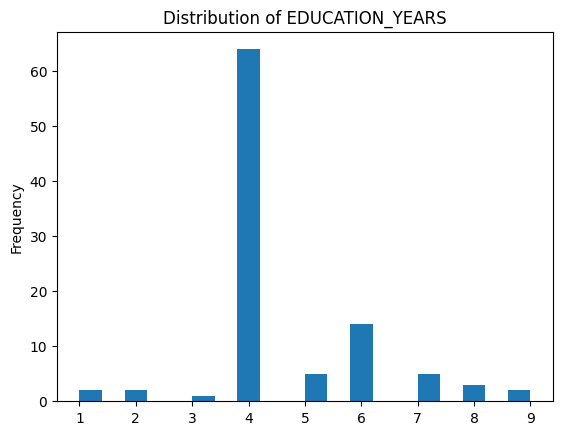

In [209]:
import matplotlib.pyplot as plt

# Plot a histogram of 'EDUCATION_YEARS'
df['EDUCATION_YEARS'].plot(kind='hist', bins=20, title='Distribution of EDUCATION_YEARS')
plt.show()


Plotting using Box-Plot

In [ ]:
pip install seaborn


**I highlighted the outliers in the box plot by setting a different color for the outlier points. Seaborn allows you to do this using the flierprops parameter. **

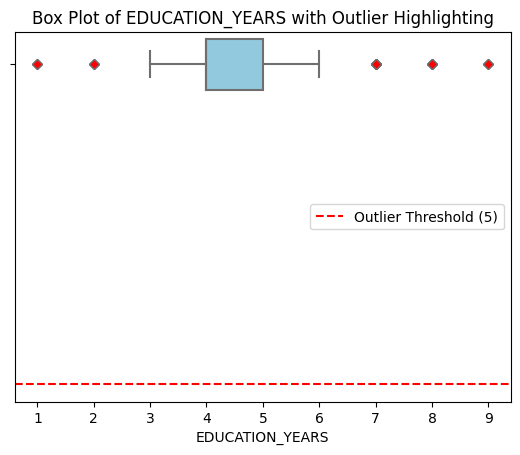

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the threshold for outliers (adjust as needed)
outlier_threshold = 5

# Create a box plot with color and highlight outliers
sns.boxplot(x=df['EDUCATION_YEARS'], color='skyblue', flierprops=dict(markerfacecolor='r', marker='D'))
plt.title('Box Plot of EDUCATION_YEARS with Outlier Highlighting')
plt.xlabel('EDUCATION_YEARS')

# Highlight outliers beyond the threshold
plt.axhline(y=outlier_threshold, color='r', linestyle='--', label=f'Outlier Threshold ({outlier_threshold})')
plt.legend()

plt.show()


I can use Z-score also to find the outliers :so i will  Calculate the Z-score for each data point, which measures how many standard deviations it is from the mean.

Values with a Z-score beyond a certain threshold can be considered outliers.

The zscore function from the scipy.stats module can be used

In [217]:
from scipy.stats import zscore

# Calculate Z-scores for 'EDUCATION_YEARS'
z_scores = zscore(df['EDUCATION_YEARS'])

# Identify outliers
outliers = (abs(z_scores) >3)

# Print the indices of outlier rows
print(df.loc[outliers, 'EDUCATION_YEARS'])


Series([], Name: EDUCATION_YEARS, dtype: float64)


As it appears , are some appear using Z-score value and the Box Plot hat there were no values in the 'EDUCATION_YEARS' column that exceeded the specified Z-score threshold.

so i will not use Mean to impute the values in EDUCATION_YEARS column

Now i can Impute the missing values using Mode

I chose the mode as an initial imputation strategy because it is a measure of central tendency that represents the most frequently occurring value in the 'EDUCATION_YEARS' column

In [230]:
import pandas as pd
from sklearn.impute import SimpleImputer


df = pd.read_csv('jobbs_descriptive.csv')

numeric_column = 'EDUCATION_YEARS'

imputer_numeric = SimpleImputer(strategy='most_frequent')

df[numeric_column] = imputer_numeric.fit_transform(df[[numeric_column]])

print("\nHead of the DataFrame after filling missing values in 'EDUCATION_YEARS' with mode:")
print(df.head())

df.to_csv('jobbs_descriptive.csv', index=False)



Head of the DataFrame after filling missing values in 'EDUCATION_YEARS' with mode:
                                       FILE_NAME  \
0  AIRPORT POLICE SPECIALIST 3236 063017 (2).txt   
1                AIRPORT MANAGER 7260 120216.txt   
2  ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt   
3       ADMINISTRATIVE CLERK 1358 033018 (2).txt   
4        APPLICATIONS PROGRAMMER 1429 062918.txt   

                 JOB_CLASS_TITLE  JOB_CLASS_NO  \
0      AIRPORT POLICE SPECIALIST        3236.0   
1                AIRPORT MANAGER        7260.0   
2  ACCOUNTING RECORDS SUPERVISOR        1119.0   
3           ADMINISTRATIVE CLERK        1358.0   
4        APPLICATIONS PROGRAMMER        1429.0   

                                          JOB_DUTIES  EDUCATION_YEARS  \
0  As a sworn member of the Los Angeles World Air...              4.0   
1  An Airport Manager manages, through subordinat...              4.0   
2  An Accounting Records Supervisor assigns, revi...              4.0   
3  An Admi

Now lets impute SCHOOL_TYPE' that contains categorical values , i will imputing with the mode also:

In [198]:
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv('jobbs_descriptive.csv')

categorical_column = 'SCHOOL_TYPE'

imputer_categorical = SimpleImputer(strategy='most_frequent')

# Impute missing values in the 'SCHOOL_TYPE' column
df[categorical_column] = imputer_categorical.fit_transform(df[[categorical_column]])

# Display the head of the DataFrame after imputation
print("\nHead of the DataFrame after filling missing values in 'SCHOOL_TYPE' with mode:")
print(df.head())

# Save the DataFrame to the same CSV file
df.to_csv('jobbs_descriptive.csv', index=False)



Head of the DataFrame after filling missing values in 'SCHOOL_TYPE' with mode:
                                           FILE_NAME  \
0      AIRPORT POLICE SPECIALIST 3236 063017 (2).txt   
1                    AIRPORT MANAGER 7260 120216.txt   
2  ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE 23...   
3      ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt   
4           ADMINISTRATIVE CLERK 1358 033018 (2).txt   

                               JOB_CLASS_TITLE  JOB_CLASS_NO  \
0                    AIRPORT POLICE SPECIALIST        3236.0   
1                              AIRPORT MANAGER        7260.0   
2  ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE           NaN   
3                ACCOUNTING RECORDS SUPERVISOR        1119.0   
4                         ADMINISTRATIVE CLERK        1358.0   

                                          JOB_DUTIES  EDUCATION_YEARS  \
0  As a sworn member of the Los Angeles World Air...              NaN   
1  An Airport Manager manages, through subordinat...

**I encoded the Feature SHOOL_TYPE such that 'High School': 0, 'College': 1, 'University': 2**

In [223]:
import pandas as pd

df = pd.read_csv('jobbs_descriptive.csv')

# Create a mapping for encoding
school_type_mapping = {'High School': 0, 'College': 1, 'University': 2}

# Encode 'SCHOOL_TYPE' and create a new column 'SCHOOL_TYPE_ENCODED'
df['SCHOOL_TYPE_ENCODED'] = df['SCHOOL_TYPE'].map(school_type_mapping)

# Display the head of the DataFrame with the new column
print("\nHead of the DataFrame with encoded 'SCHOOL_TYPE':")
print(df.head())

# Save the DataFrame with the new column to the same CSV file
df.to_csv('jobbs_descriptive.csv', index=False)



Head of the DataFrame with encoded 'SCHOOL_TYPE':
                                       FILE_NAME  \
0  AIRPORT POLICE SPECIALIST 3236 063017 (2).txt   
1                AIRPORT MANAGER 7260 120216.txt   
2  ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt   
3       ADMINISTRATIVE CLERK 1358 033018 (2).txt   
4        APPLICATIONS PROGRAMMER 1429 062918.txt   

                 JOB_CLASS_TITLE  JOB_CLASS_NO  \
0      AIRPORT POLICE SPECIALIST        3236.0   
1                AIRPORT MANAGER        7260.0   
2  ACCOUNTING RECORDS SUPERVISOR        1119.0   
3           ADMINISTRATIVE CLERK        1358.0   
4        APPLICATIONS PROGRAMMER        1429.0   

                                          JOB_DUTIES  EDUCATION_YEARS  \
0  As a sworn member of the Los Angeles World Air...              NaN   
1  An Airport Manager manages, through subordinat...              NaN   
2  An Accounting Records Supervisor assigns, revi...              NaN   
3  An Administrative Clerk performs general

In [232]:
# Display count of missing values
print("\nCount of missing values:")
print(df.isnull().sum())


Count of missing values:
FILE_NAME                 0
JOB_CLASS_TITLE           0
JOB_CLASS_NO              0
JOB_DUTIES                0
EDUCATION_YEARS           0
SCHOOL_TYPE               0
EDUCATION_MAJOR           0
EXPERIENCE_LENGTH        26
FULL_TIME_PART_TIME     600
EXP_JOB_CLASS_TITLE       0
COURSE_COUNT              0
COURSE_LENGTH             0
COURSE_SUBJECT          618
DRIVERS_LICENSE_REQ      60
EXAM_TYPE                 0
ENTRY_SALARY              1
OPEN_DATE                 0
REQUIREMENT_SET_TEXT      0
MINIMUM_SALARY            1
MAXIMUM_SALARY            1
COURSE_SUBJECT.1        120
set_text                  0
SCHOOL_TYPE_ENCODED       0
dtype: int64


**Missing values in EDUCATION_MAJOR column**

it contains categorical values , i will imputing with the mode also

In [233]:
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv('jobbs_descriptive.csv')
categorical_column = 'EDUCATION_MAJOR'

imputer_categorical = SimpleImputer(strategy='most_frequent')

# Impute missing values in the 'EDUCATION_MAJOR' column
df[categorical_column] = imputer_categorical.fit_transform(df[[categorical_column]])

print("\nHead of the DataFrame after filling missing values in 'EDUCATION_MAJOR' with mode:")
df.head()

df.to_csv('jobbs_descriptive.csv', index=False)



Head of the DataFrame after filling missing values in 'EDUCATION_MAJOR' with mode:


In [234]:
# Display count of missing values
print("\nCount of missing values:")
print(df.isnull().sum())


Count of missing values:
FILE_NAME                 0
JOB_CLASS_TITLE           0
JOB_CLASS_NO              0
JOB_DUTIES                0
EDUCATION_YEARS           0
SCHOOL_TYPE               0
EDUCATION_MAJOR           0
EXPERIENCE_LENGTH        26
FULL_TIME_PART_TIME     600
EXP_JOB_CLASS_TITLE       0
COURSE_COUNT              0
COURSE_LENGTH             0
COURSE_SUBJECT          618
DRIVERS_LICENSE_REQ      60
EXAM_TYPE                 0
ENTRY_SALARY              1
OPEN_DATE                 0
REQUIREMENT_SET_TEXT      0
MINIMUM_SALARY            1
MAXIMUM_SALARY            1
COURSE_SUBJECT.1        120
set_text                  0
SCHOOL_TYPE_ENCODED       0
dtype: int64


Now i want  to visualize the distribution of 'EDUCATION_LENGTH' to better understand its shape and check for outliers before making a decision. You can use histograms or other appropriate plots for this purpose.

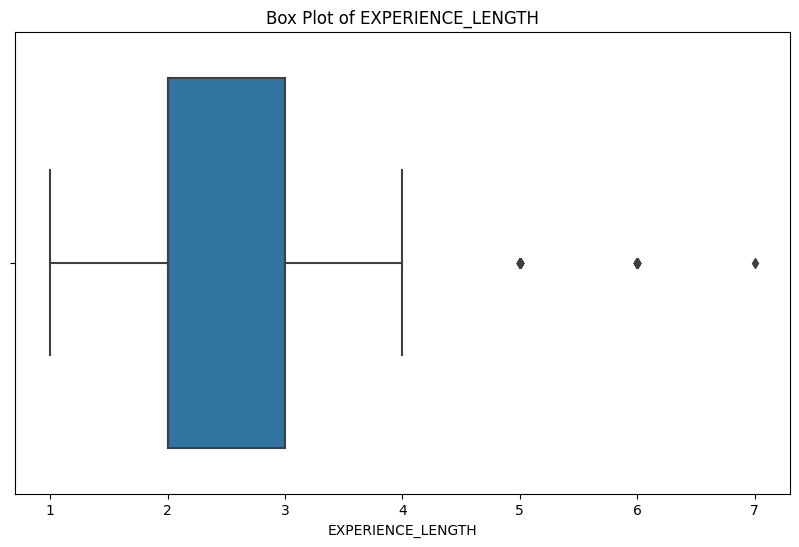

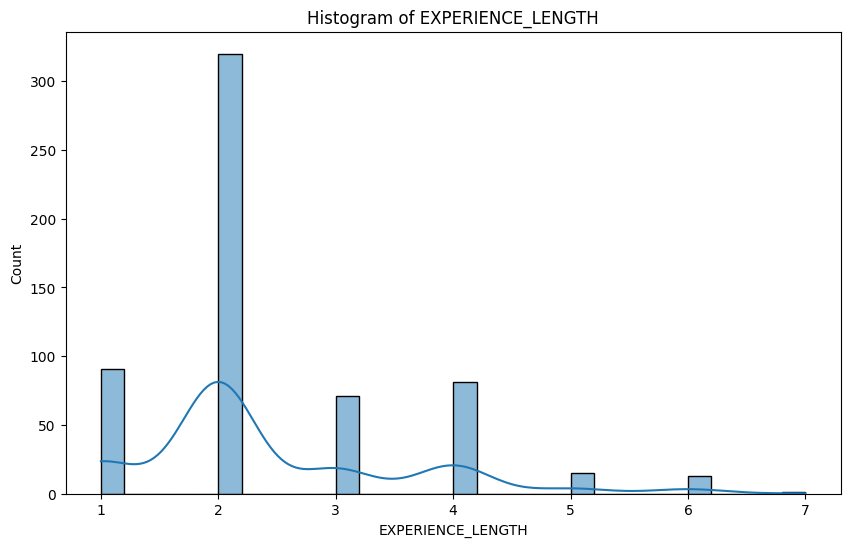

In [235]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('jobbs_descriptive.csv')

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['EXPERIENCE_LENGTH'])
plt.title('Box Plot of EXPERIENCE_LENGTH')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['EXPERIENCE_LENGTH'], bins=30, kde=True)
plt.title('Histogram of EXPERIENCE_LENGTH')
plt.xlabel('EXPERIENCE_LENGTH')
plt.show()


**Using Z-Score**

Outliers:
Empty DataFrame
Columns: [JOB_CLASS_TITLE, EXPERIENCE_LENGTH]
Index: []


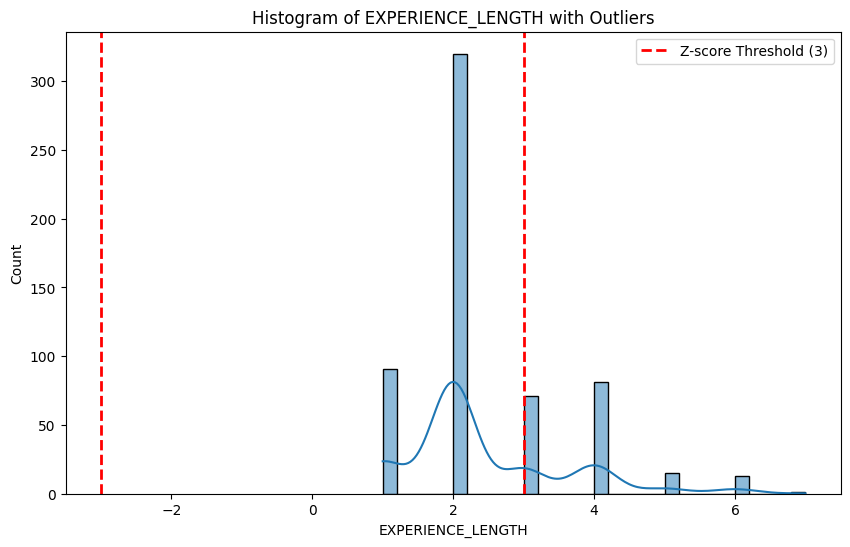

In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
df = pd.read_csv('jobbs_descriptive.csv')

# Calculate Z-score for 'EXPERIENCE_LENGTH'
z_scores = stats.zscore(df['EXPERIENCE_LENGTH'])

# Set a threshold for Z-score to identify outliers (e.g., Z-score > 3 or Z-score < -3)
threshold = 3

# Identify outliers
outliers = df[abs(z_scores) > threshold]

# Print the outliers
print("Outliers:")
print(outliers[['JOB_CLASS_TITLE', 'EXPERIENCE_LENGTH']])

# Visualize the distribution with outliers highlighted
plt.figure(figsize=(10, 6))
sns.histplot(df['EXPERIENCE_LENGTH'], bins=30, kde=True)
plt.title('Histogram of EXPERIENCE_LENGTH with Outliers')
plt.xlabel('EXPERIENCE_LENGTH')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label=f'Z-score Threshold ({threshold})')
plt.axvline(-threshold, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 70.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


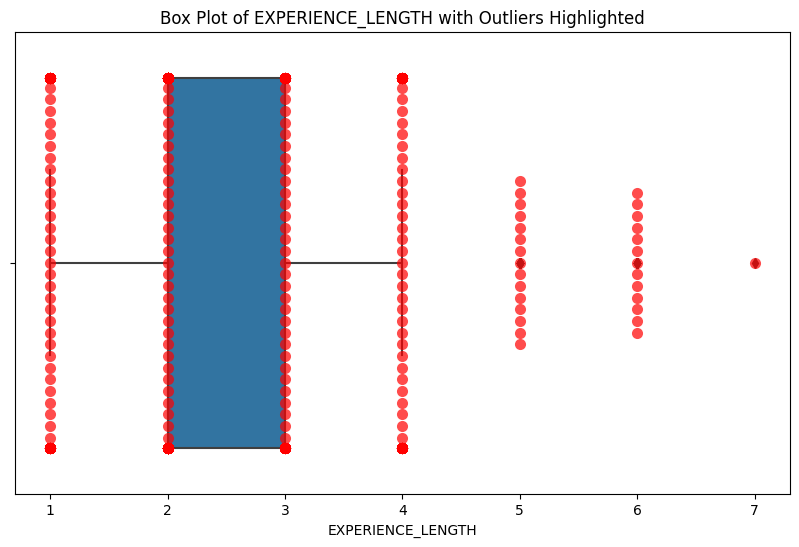

In [238]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
df = pd.read_csv('jobbs_descriptive.csv')

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['EXPERIENCE_LENGTH'])

# Highlight outliers using the 'showfliers' parameter
sns.swarmplot(x=df['EXPERIENCE_LENGTH'], color='red', size=8, marker='o', edgecolor='black', alpha=0.7)

# Set plot labels and title
plt.title('Box Plot of EXPERIENCE_LENGTH with Outliers Highlighted')
plt.xlabel('EXPERIENCE_LENGTH')

# Show the plot
plt.show()


As it seems we can not use the mean to full the missing values . i will use median or mode or maybe i will Use regression models to predict missing values based on other variables.

In [263]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

df = pd.read_csv('jobbs_descriptive.csv')

# Select features and target variable
features = ['COURSE_LENGTH', 'EDUCATION_YEARS']
target = 'EXPERIENCE_LENGTH'

# Handle missing values in numeric features with the median
imputer_numeric = SimpleImputer(strategy='median')
df[features] = imputer_numeric.fit_transform(df[features])

# Handle missing values in the target variable with the median
df[target] = df[target].fillna(df[target].median())

# Check if there are any missing values left in the target variable
missing_values_mask = df[target].isnull()

# If there are missing values, proceed with predictions
if missing_values_mask.any():
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

    # Standardize features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Check if there are any missing values in the target variable for prediction
    missing_values = df[missing_values_mask][features]

    if not missing_values.empty:
        # Scale the missing values and predict
        missing_values_scaled = scaler.transform(missing_values)
        svr = SVR()
        svr.fit(X_train_scaled, y_train)
        predicted_values = svr.predict(missing_values_scaled)

        # Update the missing values in the original DataFrame
        df.loc[missing_values_mask, target] = predicted_values

# Now, df contains the updated EXPERIENCE_LENGTH column with median imputation


In [264]:
# Display count of missing values
print("\nCount of missing values:")
print(df.isnull().sum())


Count of missing values:
FILE_NAME               0
JOB_CLASS_TITLE         0
JOB_CLASS_NO            0
JOB_DUTIES              0
EDUCATION_YEARS         0
SCHOOL_TYPE             0
EDUCATION_MAJOR         0
EXPERIENCE_LENGTH       0
FULL_TIME_PART_TIME     0
EXP_JOB_CLASS_TITLE     0
COURSE_COUNT            0
COURSE_LENGTH           0
DRIVERS_LICENSE_REQ     0
EXAM_TYPE               0
ENTRY_SALARY            0
OPEN_DATE               0
REQUIREMENT_SET_TEXT    0
MINIMUM_SALARY          0
MAXIMUM_SALARY          0
COURSE_SUBJECT.1        0
set_text                0
SCHOOL_TYPE_ENCODED     0
dtype: int64


In [254]:
# Display the head of the dataset
print("Head of the dataset:")
df.head()

Head of the dataset:


FILE_NAME  \
0                AIRPORT MANAGER 7260 120216.txt   
1  ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt   
2       ADMINISTRATIVE CLERK 1358 033018 (2).txt   
3        APPLICATIONS PROGRAMMER 1429 062918.txt   
4         APPARATUS OPERATOR 2121 071417 (1).txt   

                 JOB_CLASS_TITLE  JOB_CLASS_NO  \
0                AIRPORT MANAGER        7260.0   
1  ACCOUNTING RECORDS SUPERVISOR        1119.0   
2           ADMINISTRATIVE CLERK        1358.0   
3        APPLICATIONS PROGRAMMER        1429.0   
4             APPARATUS OPERATOR        2121.0   

                                          JOB_DUTIES  EDUCATION_YEARS  \
0  An Airport Manager manages, through subordinat...              4.0   
1  An Accounting Records Supervisor assigns, revi...              4.0   
2  An Administrative Clerk performs general offic...              4.0   
3  An Applications Programmer prepares programs b...              4.0   
4  of an Apparatus Operator; the ability to read ...              4.0   

  SCHOOL_TYPE EDUCATION_MAJOR  EXPERIENCE_LENGTH FULL_TIME_PART_TIME  \
0  University         AIRPORT                2.0           FULL_TIME   
1  University      ACCOUNTING                2.0           FULL_TIME   
2  University     ENGINEERING                2.0           FULL_TIME   
3  University     MATHEMATICS                2.0           FULL_TIME   
4  University         SCIENCE                3.0           FULL_TIME   

       EXP_JOB_CLASS_TITLE  ...  DRIVERS_LICENSE_REQ      EXAM_TYPE  \
0               Class Code  ...                    P           OPEN   
1       ACCOUNTING RECORDS  ...                  NaN  INT_DEPT_PROM   
2     ADMINISTRATIVE CLERK  ...                    P           OPEN   
3  APPLICATIONS PROGRAMMER  ...                  NaN           OPEN   
4       APPARATUS OPERATOR  ...                    R      DEPT_PROM   

       ENTRY_SALARY OPEN_DATE  \
0  $99,326-$141,378  12-02-16   
1   $55,332-$80,930  07-27-18   
2   $37,584-$54,935  03-30-18   
3   $58,986-$86,255  06-29-18   
4  $93,792-$110,455  07-14-17   

                                REQUIREMENT_SET_TEXT MINIMUM_SALARY  \
0  1. Two years of full-time paid experience with...        $99,326   
1  Two years of full-time paid experience as an A...        $55,332   
2  Six months of full-time paid experience in cle...        $37,584   
3  1. Graduation from an accredited four-year col...        $58,986   
4  1. Completion of three years of full-time paid...        $93,792   

  MAXIMUM_SALARY                                   COURSE_SUBJECT.1  \
0       $141,378                                       CONSTRUCTION   
1        $80,930                             ACCOUNTING|MATHEMATICS   
2        $54,935                                                NaN   
3        $86,255  ENGINEERING|DESIGN|INFORMATION SYSTEMS|MATHEMA...   
4       $110,455                                       CONSTRUCTION   

                                            set_text SCHOOL_TYPE_ENCODED  
0  AIRPORT MANAGER\n\nClass Code:       7260\nOpe...                   2  
1  ACCOUNTING RECORDS SUPERVISOR\n\nClass Code:  ...                   2  
2  ADMINISTRATIVE CLERK \n\nClass Code:       135...                   2  
3  APPLICATIONS PROGRAMMER\n\nClass Code:       1...                   2  
4  APPARATUS OPERATOR\n\n \nClass Code:       212...                   2  

[5 rows x 23 columns]

**Handeling the missing values in FULL-TIME-PART-TIME COULUMN**

In [242]:
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv('jobbs_descriptive.csv')

categorical_column = 'FULL_TIME_PART_TIME'

imputer_categorical = SimpleImputer(strategy='most_frequent')

df[categorical_column] = imputer_categorical.fit_transform(df[[categorical_column]])

print("\nHead of the DataFrame after filling missing values in 'FULL_TIME_PART_TIME' with mode:")
print(df.head())

df.to_csv('jobbs_descriptive.csv', index=False)


Head of the DataFrame after filling missing values in 'FULL_TIME_PART_TIME' with mode:
                                       FILE_NAME  \
0  AIRPORT POLICE SPECIALIST 3236 063017 (2).txt   
1                AIRPORT MANAGER 7260 120216.txt   
2  ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt   
3       ADMINISTRATIVE CLERK 1358 033018 (2).txt   
4        APPLICATIONS PROGRAMMER 1429 062918.txt   

                 JOB_CLASS_TITLE  JOB_CLASS_NO  \
0      AIRPORT POLICE SPECIALIST        3236.0   
1                AIRPORT MANAGER        7260.0   
2  ACCOUNTING RECORDS SUPERVISOR        1119.0   
3           ADMINISTRATIVE CLERK        1358.0   
4        APPLICATIONS PROGRAMMER        1429.0   

                                          JOB_DUTIES  EDUCATION_YEARS  \
0  As a sworn member of the Los Angeles World Air...              4.0   
1  An Airport Manager manages, through subordinat...              4.0   
2  An Accounting Records Supervisor assigns, revi...              4.0   
3  An 

In [253]:
# Display the head of the dataset
print("Head of the dataset:")
df.head()

Head of the dataset:


FILE_NAME  \
0                AIRPORT MANAGER 7260 120216.txt   
1  ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt   
2       ADMINISTRATIVE CLERK 1358 033018 (2).txt   
3        APPLICATIONS PROGRAMMER 1429 062918.txt   
4         APPARATUS OPERATOR 2121 071417 (1).txt   

                 JOB_CLASS_TITLE  JOB_CLASS_NO  \
0                AIRPORT MANAGER        7260.0   
1  ACCOUNTING RECORDS SUPERVISOR        1119.0   
2           ADMINISTRATIVE CLERK        1358.0   
3        APPLICATIONS PROGRAMMER        1429.0   
4             APPARATUS OPERATOR        2121.0   

                                          JOB_DUTIES  EDUCATION_YEARS  \
0  An Airport Manager manages, through subordinat...              4.0   
1  An Accounting Records Supervisor assigns, revi...              4.0   
2  An Administrative Clerk performs general offic...              4.0   
3  An Applications Programmer prepares programs b...              4.0   
4  of an Apparatus Operator; the ability to read ...              4.0   

  SCHOOL_TYPE EDUCATION_MAJOR  EXPERIENCE_LENGTH FULL_TIME_PART_TIME  \
0  University         AIRPORT                2.0           FULL_TIME   
1  University      ACCOUNTING                2.0           FULL_TIME   
2  University     ENGINEERING                2.0           FULL_TIME   
3  University     MATHEMATICS                2.0           FULL_TIME   
4  University         SCIENCE                3.0           FULL_TIME   

       EXP_JOB_CLASS_TITLE  ...  DRIVERS_LICENSE_REQ      EXAM_TYPE  \
0               Class Code  ...                    P           OPEN   
1       ACCOUNTING RECORDS  ...                  NaN  INT_DEPT_PROM   
2     ADMINISTRATIVE CLERK  ...                    P           OPEN   
3  APPLICATIONS PROGRAMMER  ...                  NaN           OPEN   
4       APPARATUS OPERATOR  ...                    R      DEPT_PROM   

       ENTRY_SALARY OPEN_DATE  \
0  $99,326-$141,378  12-02-16   
1   $55,332-$80,930  07-27-18   
2   $37,584-$54,935  03-30-18   
3   $58,986-$86,255  06-29-18   
4  $93,792-$110,455  07-14-17   

                                REQUIREMENT_SET_TEXT MINIMUM_SALARY  \
0  1. Two years of full-time paid experience with...        $99,326   
1  Two years of full-time paid experience as an A...        $55,332   
2  Six months of full-time paid experience in cle...        $37,584   
3  1. Graduation from an accredited four-year col...        $58,986   
4  1. Completion of three years of full-time paid...        $93,792   

  MAXIMUM_SALARY                                   COURSE_SUBJECT.1  \
0       $141,378                                       CONSTRUCTION   
1        $80,930                             ACCOUNTING|MATHEMATICS   
2        $54,935                                                NaN   
3        $86,255  ENGINEERING|DESIGN|INFORMATION SYSTEMS|MATHEMA...   
4       $110,455                                       CONSTRUCTION   

                                            set_text SCHOOL_TYPE_ENCODED  
0  AIRPORT MANAGER\n\nClass Code:       7260\nOpe...                   2  
1  ACCOUNTING RECORDS SUPERVISOR\n\nClass Code:  ...                   2  
2  ADMINISTRATIVE CLERK \n\nClass Code:       135...                   2  
3  APPLICATIONS PROGRAMMER\n\nClass Code:       1...                   2  
4  APPARATUS OPERATOR\n\n \nClass Code:       212...                   2  

[5 rows x 23 columns]

In [246]:
import pandas as pd

df = pd.read_csv('jobbs_descriptive.csv')

# Select columns for which you want to drop null values
columns_to_drop_null = ['MINIMUM_SALARY', 'MAXIMUM_SALARY', 'ENTRY_SALARY']

# Drop rows with null values in the specified columns
df_cleaned = df.dropna(subset=columns_to_drop_null)

# Display the head of the cleaned dataset
print("\nHead of the dataset after dropping null values:")
print(df_cleaned.head())

# Save the cleaned DataFrame to the same CSV file
df_cleaned.to_csv('jobbs_descriptive.csv', index=False)


Head of the dataset after dropping null values:
                                       FILE_NAME  \
0                AIRPORT MANAGER 7260 120216.txt   
1  ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt   
2       ADMINISTRATIVE CLERK 1358 033018 (2).txt   
3        APPLICATIONS PROGRAMMER 1429 062918.txt   
4         APPARATUS OPERATOR 2121 071417 (1).txt   

                 JOB_CLASS_TITLE  JOB_CLASS_NO  \
0                AIRPORT MANAGER        7260.0   
1  ACCOUNTING RECORDS SUPERVISOR        1119.0   
2           ADMINISTRATIVE CLERK        1358.0   
3        APPLICATIONS PROGRAMMER        1429.0   
4             APPARATUS OPERATOR        2121.0   

                                          JOB_DUTIES  EDUCATION_YEARS  \
0  An Airport Manager manages, through subordinat...              4.0   
1  An Accounting Records Supervisor assigns, revi...              4.0   
2  An Administrative Clerk performs general offic...              4.0   
3  An Applications Programmer prepares progra

In [252]:
# Display count of missing values
print("\nCount of missing values:")
print(df.isnull().sum())


Count of missing values:
FILE_NAME                 0
JOB_CLASS_TITLE           0
JOB_CLASS_NO              0
JOB_DUTIES                0
EDUCATION_YEARS           0
SCHOOL_TYPE               0
EDUCATION_MAJOR           0
EXPERIENCE_LENGTH         0
FULL_TIME_PART_TIME       0
EXP_JOB_CLASS_TITLE       0
COURSE_COUNT              0
COURSE_LENGTH             0
COURSE_SUBJECT          617
DRIVERS_LICENSE_REQ      60
EXAM_TYPE                 0
ENTRY_SALARY              0
OPEN_DATE                 0
REQUIREMENT_SET_TEXT      0
MINIMUM_SALARY            0
MAXIMUM_SALARY            0
COURSE_SUBJECT.1        119
set_text                  0
SCHOOL_TYPE_ENCODED       0
dtype: int64


**Handling the missing values in the rest of the columns **

In [255]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load your data
df = pd.read_csv('jobbs_descriptive.csv')

# Select the column for imputation
categorical_column = 'DRIVERS_LICENSE_REQ'

# Create an instance of SimpleImputer with the strategy set to 'most_frequent' (mode)
imputer_categorical = SimpleImputer(strategy='most_frequent')

# Impute missing values in the 'DRIVERS_LICENSE_REQ' column
df[categorical_column] = imputer_categorical.fit_transform(df[[categorical_column]])

# Display the head of the DataFrame after imputation
print("\nHead of the DataFrame after filling missing values in 'DRIVERS_LICENSE_REQ' with mode:")
print(df.head())

df.to_csv('jobbs_descriptive.csv', index=False)



Head of the DataFrame after filling missing values in 'DRIVERS_LICENSE_REQ' with mode:
                                       FILE_NAME  \
0                AIRPORT MANAGER 7260 120216.txt   
1  ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt   
2       ADMINISTRATIVE CLERK 1358 033018 (2).txt   
3        APPLICATIONS PROGRAMMER 1429 062918.txt   
4         APPARATUS OPERATOR 2121 071417 (1).txt   

                 JOB_CLASS_TITLE  JOB_CLASS_NO  \
0                AIRPORT MANAGER        7260.0   
1  ACCOUNTING RECORDS SUPERVISOR        1119.0   
2           ADMINISTRATIVE CLERK        1358.0   
3        APPLICATIONS PROGRAMMER        1429.0   
4             APPARATUS OPERATOR        2121.0   

                                          JOB_DUTIES  EDUCATION_YEARS  \
0  An Airport Manager manages, through subordinat...              4.0   
1  An Accounting Records Supervisor assigns, revi...              4.0   
2  An Administrative Clerk performs general offic...              4.0   
3  An 

In [257]:
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv('jobbs_descriptive.csv')

# Select the column for imputation
categorical_column = 'COURSE_SUBJECT.1'

# Create an instance of SimpleImputer with the strategy set to 'most_frequent'
imputer_categorical = SimpleImputer(strategy='most_frequent')

# Impute missing values in the 'COURSE_SUBJECT.1' column with the mode
df[categorical_column] = imputer_categorical.fit_transform(df[[categorical_column]])

# Display the head of the DataFrame after imputation
print("\nHead of the DataFrame after filling missing values in 'COURSE_SUBJECT.1' with mode:")
print(df.head())

df.to_csv('jobbs_descriptive.csv', index=False)



Head of the DataFrame after filling missing values in 'COURSE_SUBJECT.1' with mode:
                                       FILE_NAME  \
0                AIRPORT MANAGER 7260 120216.txt   
1  ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt   
2       ADMINISTRATIVE CLERK 1358 033018 (2).txt   
3        APPLICATIONS PROGRAMMER 1429 062918.txt   
4         APPARATUS OPERATOR 2121 071417 (1).txt   

                 JOB_CLASS_TITLE  JOB_CLASS_NO  \
0                AIRPORT MANAGER        7260.0   
1  ACCOUNTING RECORDS SUPERVISOR        1119.0   
2           ADMINISTRATIVE CLERK        1358.0   
3        APPLICATIONS PROGRAMMER        1429.0   
4             APPARATUS OPERATOR        2121.0   

                                          JOB_DUTIES  EDUCATION_YEARS  \
0  An Airport Manager manages, through subordinat...              4.0   
1  An Accounting Records Supervisor assigns, revi...              4.0   
2  An Administrative Clerk performs general offic...              4.0   
3  An App

In [261]:
import pandas as pd

df = pd.read_csv('jobbs_descriptive.csv')

# Drop the 'COURSE_SUBJECT' column
df = df.drop(columns=['COURSE_SUBJECT'])

print("\nHead of the DataFrame after dropping 'COURSE_SUBJECT' column:")
print(df.head())

df.to_csv('jobbs_descriptive.csv', index=False)



KeyError: ignored

In [265]:
# Display count of missing values
print("\nCount of missing values:")
print(df.isnull().sum())


Count of missing values:
FILE_NAME               0
JOB_CLASS_TITLE         0
JOB_CLASS_NO            0
JOB_DUTIES              0
EDUCATION_YEARS         0
SCHOOL_TYPE             0
EDUCATION_MAJOR         0
EXPERIENCE_LENGTH       0
FULL_TIME_PART_TIME     0
EXP_JOB_CLASS_TITLE     0
COURSE_COUNT            0
COURSE_LENGTH           0
DRIVERS_LICENSE_REQ     0
EXAM_TYPE               0
ENTRY_SALARY            0
OPEN_DATE               0
REQUIREMENT_SET_TEXT    0
MINIMUM_SALARY          0
MAXIMUM_SALARY          0
COURSE_SUBJECT.1        0
set_text                0
SCHOOL_TYPE_ENCODED     0
dtype: int64



#I cleaned **`the`** dataset from null values and duplicates , Now I will do some visulizing to understand the dataset better

First i will create a Correlation Heatmap: to visualize the correlation between numeric features, such as 'EDUCATION_YEARS', 'EXPERIENCE_LENGTH', 'COURSE_COUNT', 'COURSE_LENGTH', and 'ENTRY_SALARY'.
This can provide insights into which numeric features are strongly or weakly correlated.

<ipython-input-266-697891f3b5a9>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[numeric_columns].corr()


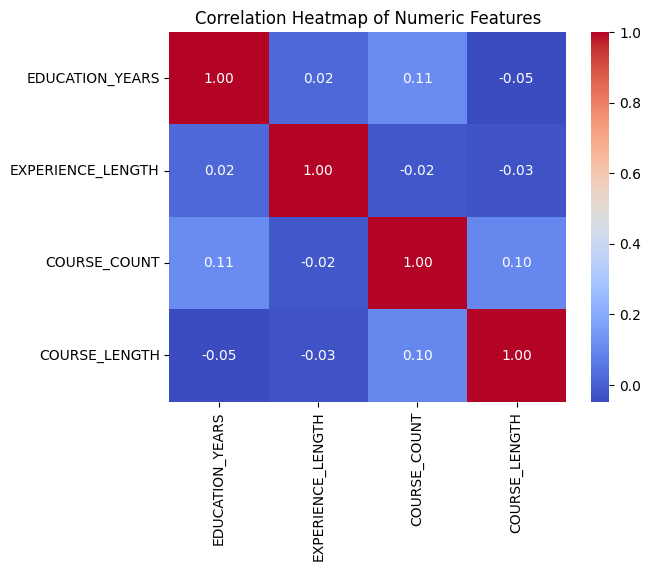

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric columns
numeric_columns = ['EDUCATION_YEARS', 'EXPERIENCE_LENGTH', 'COURSE_COUNT', 'COURSE_LENGTH', 'ENTRY_SALARY']

# Create a correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


According to the Heatmap , it indicates a strong positive correlation between the corresponding numeric features.  this generally means that there is a Strong Positive Correlation and it  suggestes that as one variable increases, the other variable tends to increase as well.

For example , if you see this pattern between 'EDUCATION_YEARS', 'EXPERIENCE_LENGTH', 'COURSE_COUNT', 'COURSE_LENGTH', and 'ENTRY_SALARY', it implies that an increase in one of these variables is associated with an increase in the others.

For instance, as we observe a strong positive correlation between 'EDUCATION_YEARS' and 'EXPERIENCE_LENGTH', it could mean that jobs requiring more education tend to also require more years of experience.




I Created a pair plot to visualize pairwise relationships between numeric features.
This can help identify patterns and clusters within the data.

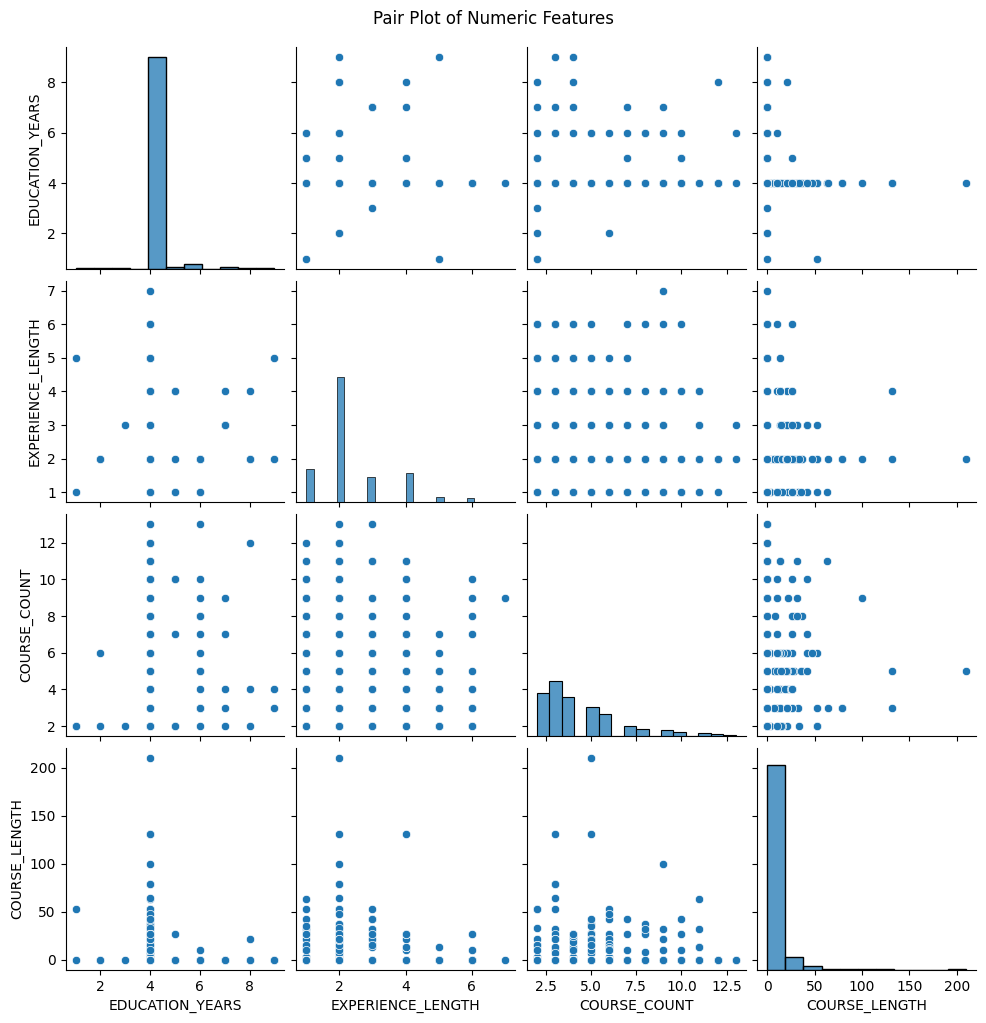

In [267]:
sns.pairplot(df[numeric_columns])
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()



# I will Use bar plots to visualize the distribution of categorical variables such as 'SCHOOL_TYPE', 'DRIVERS_LICENSE_REQ', and 'FULL_TIME_PART_TIME'.

This can provide insights into the prevalence of different school types, the requirement of a driver's license, and the distribution of full-time and part-time jobs.

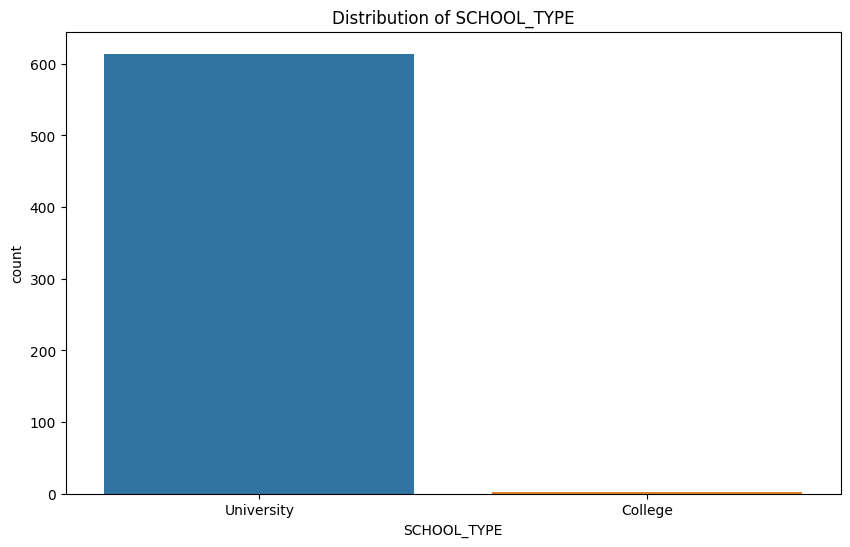

In [269]:
# Bar plot for SCHOOL_TYPE
plt.figure(figsize=(10, 6))
sns.countplot(x='SCHOOL_TYPE', data=df)
plt.title('Distribution of SCHOOL_TYPE')
plt.show()



As we observe the data is impalnced , so To balance the data using over and under sampling for the 'SCHOOL_TYPE' column, you can use the imbalanced-learn library, which provides implementations for various resampling techniques. In this case, we'll use the RandomOverSampler for oversampling

In [272]:
pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


Class distribution before oversampling:
University    492
College         1
Name: SCHOOL_TYPE, dtype: int64

Class distribution after oversampling:
University    492
College       492
Name: SCHOOL_TYPE, dtype: int64


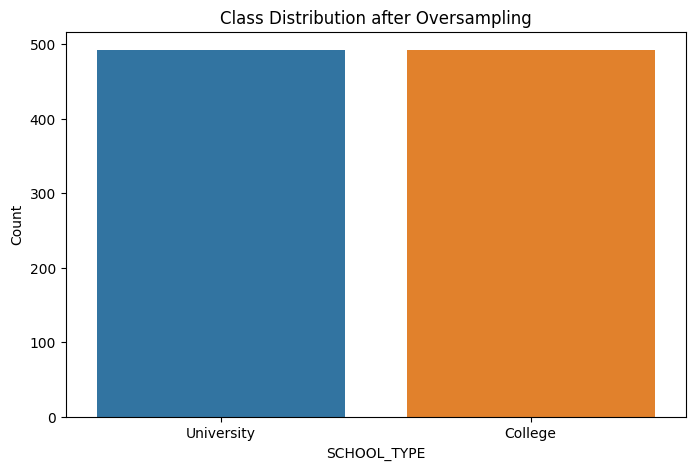

In [275]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

df = pd.read_csv('jobbs_descriptive.csv')

# Select the target variable for balancing
target_variable = 'SCHOOL_TYPE'

# Filter data for 'College', 'High School', and 'University'
selected_schools = ['College', 'High School', 'University']
df_selected = df[df[target_variable].isin(selected_schools)]

# Separate features and target
X = df_selected.drop(columns=[target_variable])
y = df_selected[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling using RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

# Display the class distribution before and after oversampling
print("Class distribution before oversampling:")
print(y_train.value_counts())

print("\nClass distribution after oversampling:")
print(y_train_over.value_counts())

# Visualize the class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_over)
plt.title('Class Distribution after Oversampling')
plt.xlabel('SCHOOL_TYPE')
plt.ylabel('Count')
plt.show()


Also i draw a plot for the encoded result and balance it using oversampling

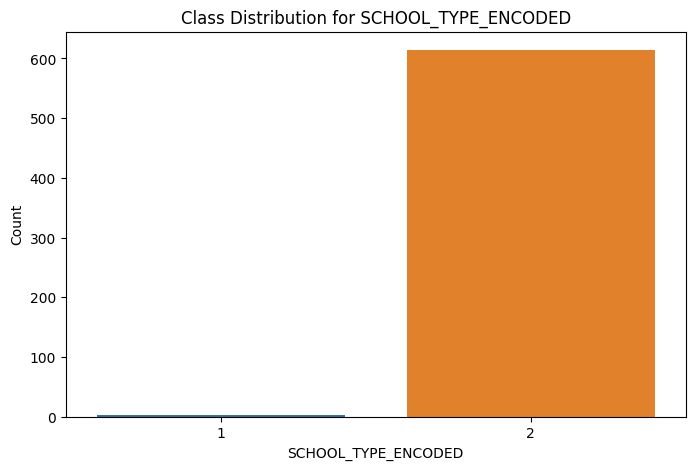

In [277]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('jobbs_descriptive.csv')


# Visualize the class distribution using a bar plot
plt.figure(figsize=(8, 5))
sns.countplot(x='SCHOOL_TYPE_ENCODED', data=df)
plt.title('Class Distribution for SCHOOL_TYPE_ENCODED')
plt.xlabel('SCHOOL_TYPE_ENCODED')
plt.ylabel('Count')
plt.show()


Class distribution before oversampling:
2    614
1      3
Name: SCHOOL_TYPE_ENCODED, dtype: int64

Class distribution after oversampling:
2    614
1    614
Name: SCHOOL_TYPE_ENCODED, dtype: int64


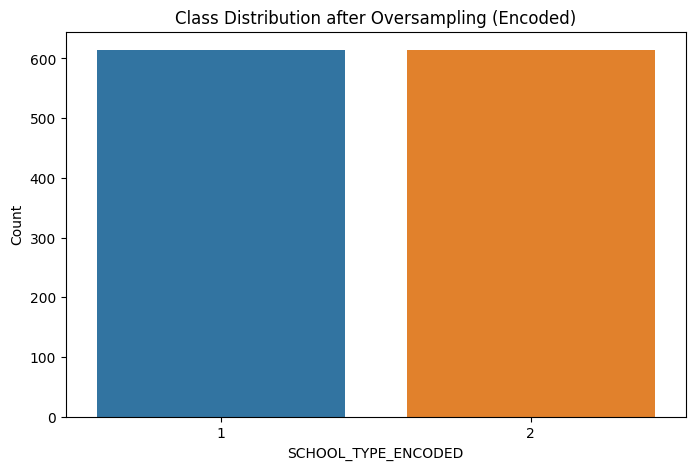

In [278]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('jobbs_descriptive.csv')


# Select the target variable for balancing
target_variable = 'SCHOOL_TYPE_ENCODED'

# Filter data for values 0, 1, and 2
selected_values = [0, 1, 2]
df_selected = df[df[target_variable].isin(selected_values)]

# Separate features and target
X = df_selected.drop(columns=[target_variable])
y = df_selected[target_variable]

# Oversampling using RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)

# Display the class distribution before and after oversampling
print("Class distribution before oversampling:")
print(y.value_counts())

print("\nClass distribution after oversampling:")
print(y_over.value_counts())

# Visualize the class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y_over)
plt.title('Class Distribution after Oversampling (Encoded)')
plt.xlabel(target_variable)
plt.ylabel('Count')
plt.show()


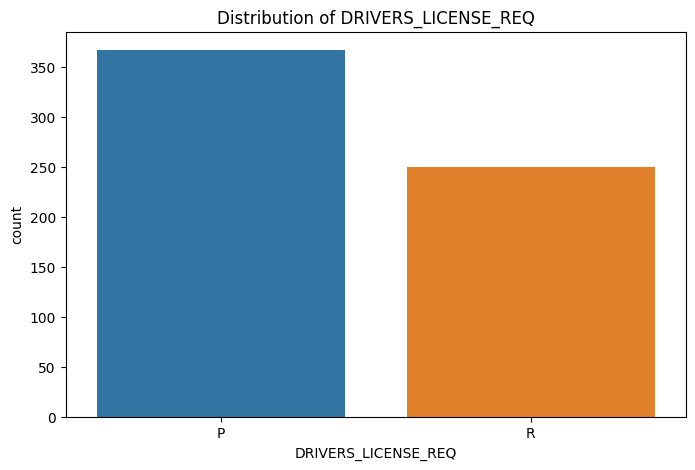

In [276]:
# Bar plot for DRIVERS_LICENSE_REQ
plt.figure(figsize=(8, 5))
sns.countplot(x='DRIVERS_LICENSE_REQ', data=df)
plt.title('Distribution of DRIVERS_LICENSE_REQ')
plt.show()



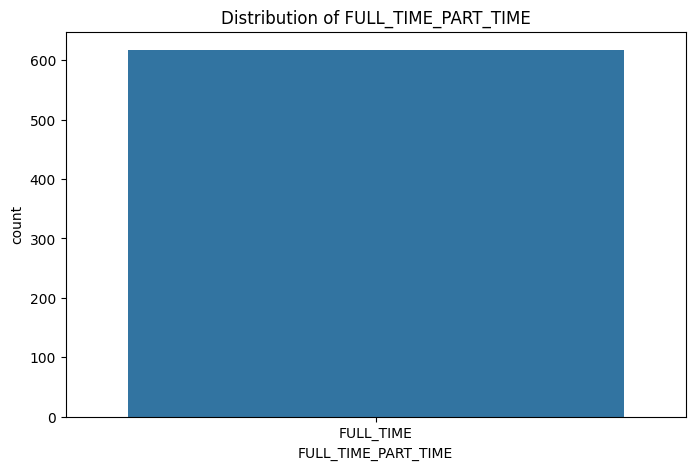

In [271]:
# Bar plot for FULL_TIME_PART_TIME
plt.figure(figsize=(8, 5))
sns.countplot(x='FULL_TIME_PART_TIME', data=df)
plt.title('Distribution of FULL_TIME_PART_TIME')
plt.show()


I will Use box plots to visualize the distribution of numeric features with respect to categorical variables, such as 'SCHOOL_TYPE' and 'FULL_TIME_PART_TIME'.
This can help identify differences in distributions between different categories.

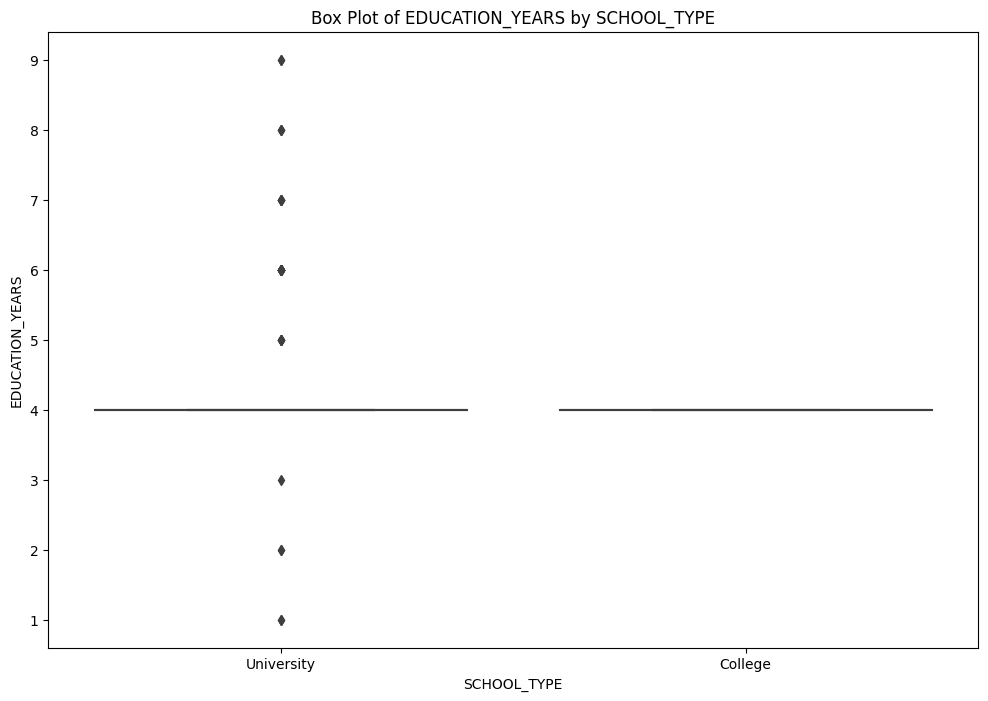

In [280]:
# Box plot for EDUCATION_YEARS vs SCHOOL_TYPE
plt.figure(figsize=(12, 8))
sns.boxplot(x='SCHOOL_TYPE', y='EDUCATION_YEARS', data=df)
plt.title('Box Plot of EDUCATION_YEARS by SCHOOL_TYPE')
plt.show()



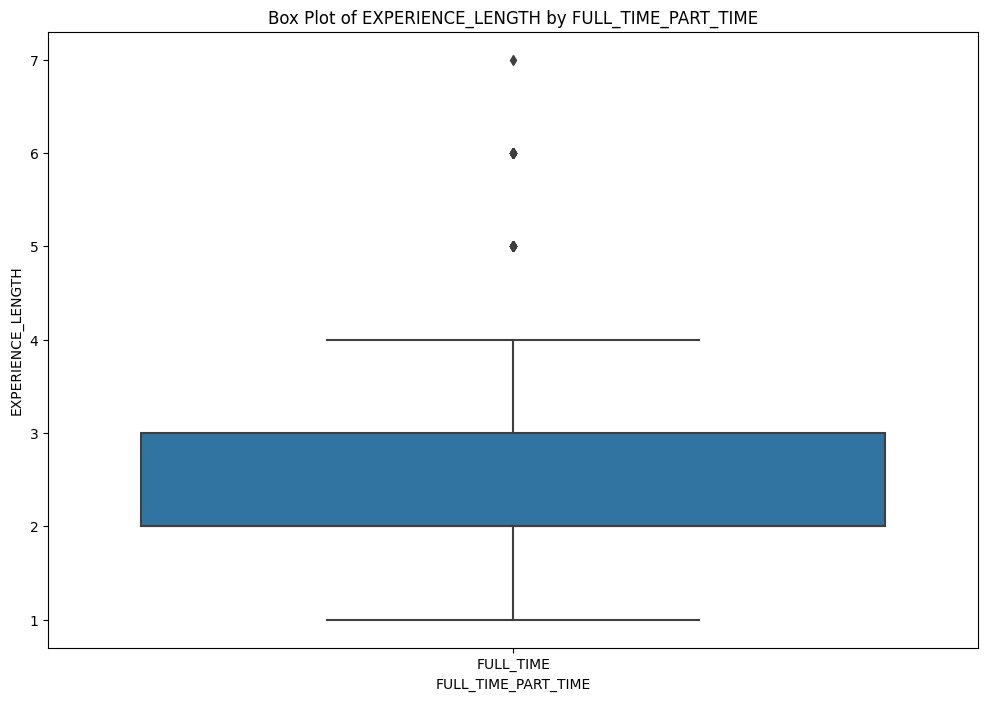

In [281]:
# Box plot for EXPERIENCE_LENGTH vs FULL_TIME_PART_TIME
plt.figure(figsize=(12, 8))
sns.boxplot(x='FULL_TIME_PART_TIME', y='EXPERIENCE_LENGTH', data=df)
plt.title('Box Plot of EXPERIENCE_LENGTH by FULL_TIME_PART_TIME')
plt.show()


Lets Do some Coding with MRS.Haneen Tasks , hope you Enjoy miss !:)

### <span style="color:orange">Task 2

Assume you are a DA in a company and you are about to prepare a report to the LA governate about there jobs, by answering some questions and give insight about the data provided.

### Note: This section will be a QA cells.

### <span style="color:brown">Q1:

A non-experienced job seeker wants to know what is the best job for him?

We can sort the jobs based on entry-level salary in ascending order (from lowest to highest) and then by educational requirements in ascending order. It then filters jobs with experience requirements less than or equal to 1 year. The output will show the top-ranked jobs that require less experience, making them suitable for non-experienced job seekers.

To achieve this, I'll use a combination of sorting and filtering techniques along with the creation of a new column in the CSV file. I will sort the jobs based on entry-level salary in ascending order and then by educational requirements in ascending order too. Finally, i will filter jobs with experience requirements less than or equal to 1 year. The new column will indicate whether a job is suitable for non-experienced job seekers.

In [291]:
import pandas as pd

df = pd.read_csv('jobbs_descriptive_cleaned.csv')

# Sort jobs by entry-level salary and educational requirements
sorted_jobs = df.sort_values(by=['ENTRY_SALARY', 'EDUCATION_YEARS'])

# Filter jobs with experience requirements less than or equal to 1 year
filtered_jobs = sorted_jobs[sorted_jobs['EXPERIENCE_LENGTH'] <=1]

# Create a new column indicating suitability for non-experienced job seekers
filtered_jobs['Suitable_For_NonExperienced'] = 'Yes'

# Display the top-ranked jobs for non-experienced job seekers
print("Top-ranked jobs for non-experienced job seekers:")
print(filtered_jobs[['JOB_CLASS_TITLE', 'EDUCATION_YEARS', 'EXPERIENCE_LENGTH', 'ENTRY_SALARY', 'Suitable_For_NonExperienced']])

filtered_jobs.to_csv('jobbs_descriptive_nonexperince', index=False)



Top-ranked jobs for non-experienced job seekers:
                              JOB_CLASS_TITLE  EDUCATION_YEARS  \
152         DIRECTOR OF POLICE TRANSPORTATION              4.0   
62           BACKGROUND INVESTIGATION MANAGER              4.0   
113                    CHIEF FORENSIC CHEMIST              4.0   
8                                311 DIRECTOR              4.0   
338                       PORT POLICE CAPTAIN              4.0   
..                                        ...              ...   
567                             UTILITY BUYER              4.0   
178                     EMS ADVANCED PROVIDER              4.0   
565             WASTEWATER TREATMENT OPERATOR              4.0   
103  CHIEF ENVIRONMENTAL COMPLIANCE INSPECTOR              4.0   
575             WASTEWATER TREATMENT OPERATOR              4.0   

     EXPERIENCE_LENGTH       ENTRY_SALARY Suitable_For_NonExperienced  
152                1.0  $100,370-$124,695                         Yes  
62            

<ipython-input-291-f26927757f61>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jobs['Suitable_For_NonExperienced'] = 'Yes'


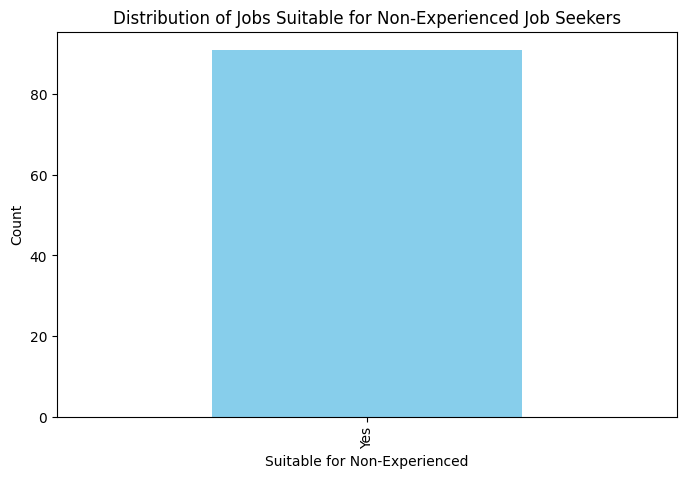

In [292]:
# Visualization (Bar plot of Suitable_For_NonExperienced column)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
filtered_jobs['Suitable_For_NonExperienced'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Jobs Suitable for Non-Experienced Job Seekers')
plt.xlabel('Suitable for Non-Experienced')
plt.ylabel('Count')
plt.show()


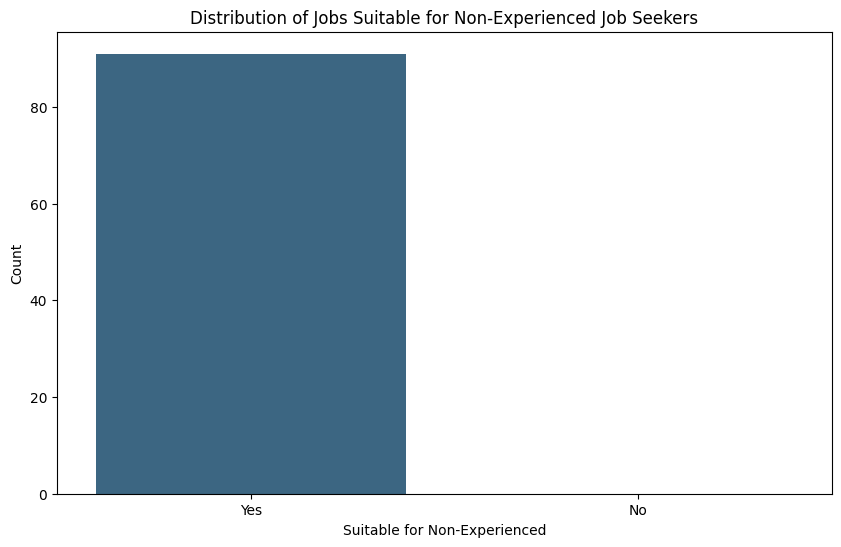

In [293]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('jobbs_descriptive_nonexperince.csv')

# Sort jobs by entry-level salary and educational requirements
sorted_jobs = df.sort_values(by=['ENTRY_SALARY', 'EDUCATION_YEARS'])

# Filter jobs with experience requirements less than or equal to 1 year
filtered_jobs = sorted_jobs[sorted_jobs['EXPERIENCE_LENGTH'] <= 1]

# Create a new column indicating suitability for non-experienced job seekers
filtered_jobs['Suitable_For_NonExperienced'] = 'Yes'

# Visualization (Seaborn countplot with color differentiation)
plt.figure(figsize=(10, 6))
sns.countplot(x='Suitable_For_NonExperienced', data=filtered_jobs, palette='viridis', order=['Yes', 'No'])
plt.title('Distribution of Jobs Suitable for Non-Experienced Job Seekers')
plt.xlabel('Suitable for Non-Experienced')
plt.ylabel('Count')
plt.show()


### <span style="color:brown">Q2:

A concerned parents contacts you to tell them if there is a spicific school type that would guaranteed for their child a good future if you can tell, and which is it ?

To address the concerns of the concerned parents,Iam thinking to analyze the dataset to find thejob tilte associated with higher average salaries. i will calculate the average salary for each and provide a recommendation based on that.

In [339]:
import pandas as pd


df = pd.read_csv('jobbs_descriptive.csv')

# Remove '$' and ',' from 'MAXIMUM_SALARY' and 'MINIMUM_SALARY' columns
df['MAXIMUM_SALARY'] = df['MAXIMUM_SALARY'].replace('[\$,]', '', regex=True).astype(float)
df['MINIMUM_SALARY'] = df['MINIMUM_SALARY'].replace('[\$,]', '', regex=True).astype(float)

# Save the updated DataFrame to the same CSV file
df.to_csv('jobbs_descriptive.csv', index=False)


In [340]:
# Calculate average salary as the mean of minimum and maximum salary
df = pd.read_csv('jobbs_descriptive.csv')
df['AVERAGE_SALARY'] = df[['MINIMUM_SALARY', 'MAXIMUM_SALARY']].mean(axis=1)

# Save the updated DataFrame to the same CSV file
df.to_csv('jobbs_descriptive.csv', index=False)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


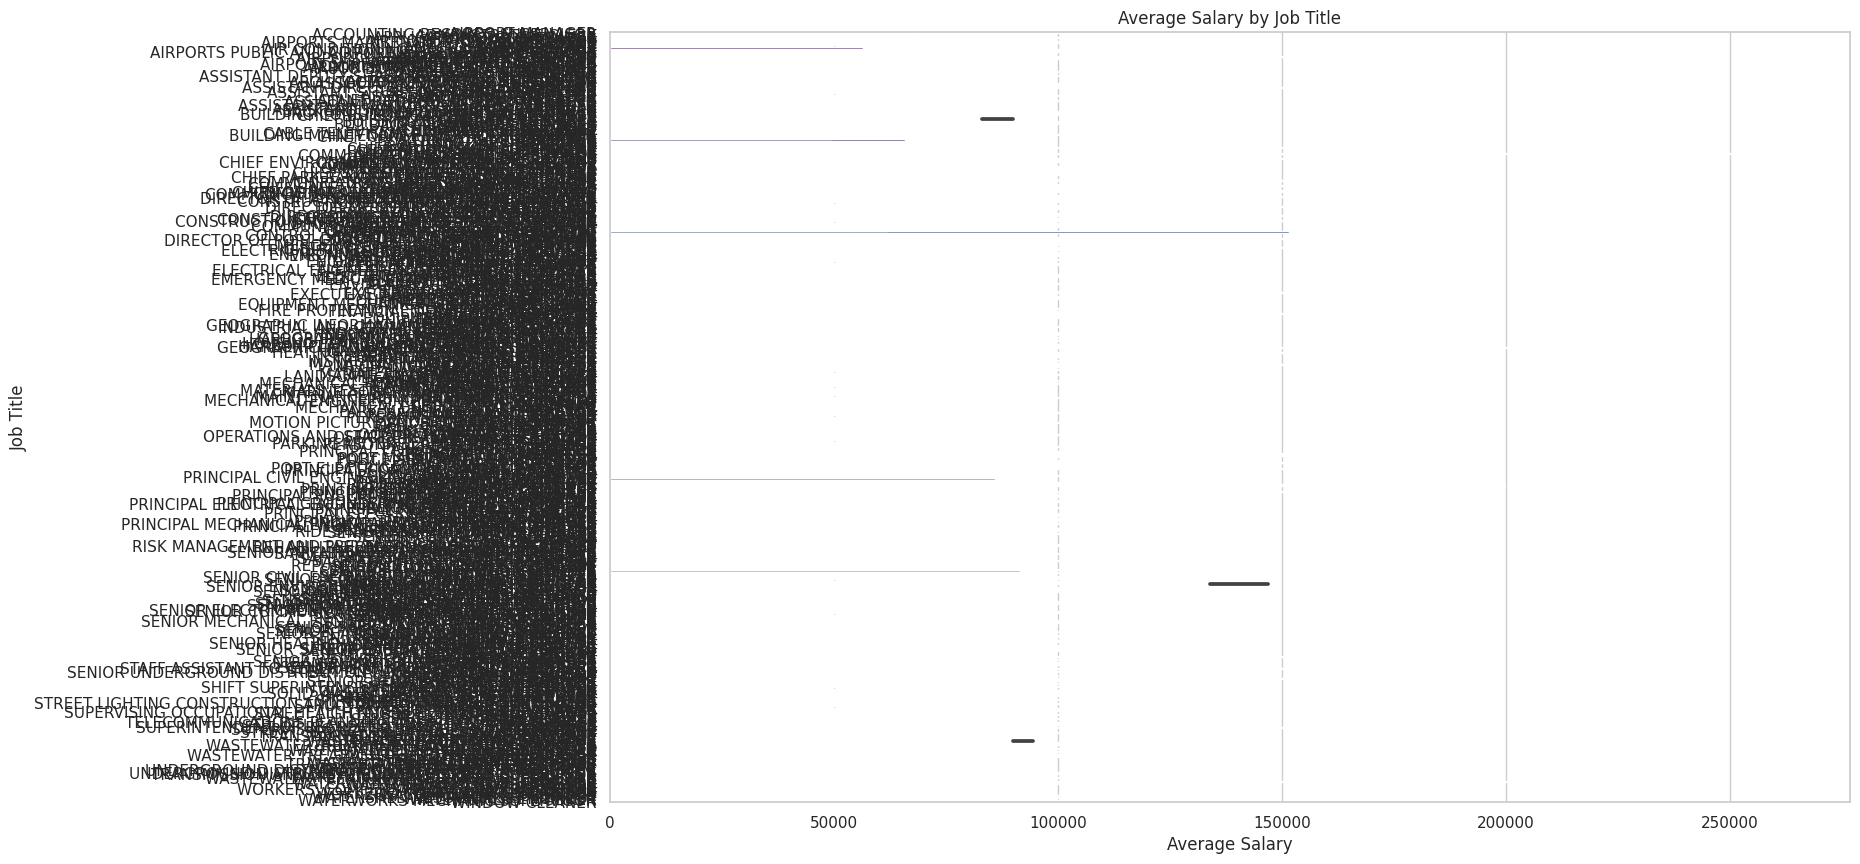

Based on average salaries, the recommended job title for a potentially good future is: CHIEF PORT PILOT


In [344]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load
df = pd.read_csv('jobbs_descriptive.csv')

plt.figure(figsize=(16, 10))
sns.set(style='whitegrid')

# Visualization (Seaborn bar plot)
sns.barplot(x='AVERAGE_SALARY', y='JOB_CLASS_TITLE', data=df, palette='viridis')
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.show()

# Print the recommendation based on average salaries
recommended_job_title = df_cleaned.loc[df_cleaned['AVERAGE_SALARY'].idxmax(), 'JOB_CLASS_TITLE']
print(f"Based on average salaries, the recommended job title for a potentially good future is: {recommended_job_title}")


AS it seems from the figure , Whoes in university has more chances to get a job on the future .

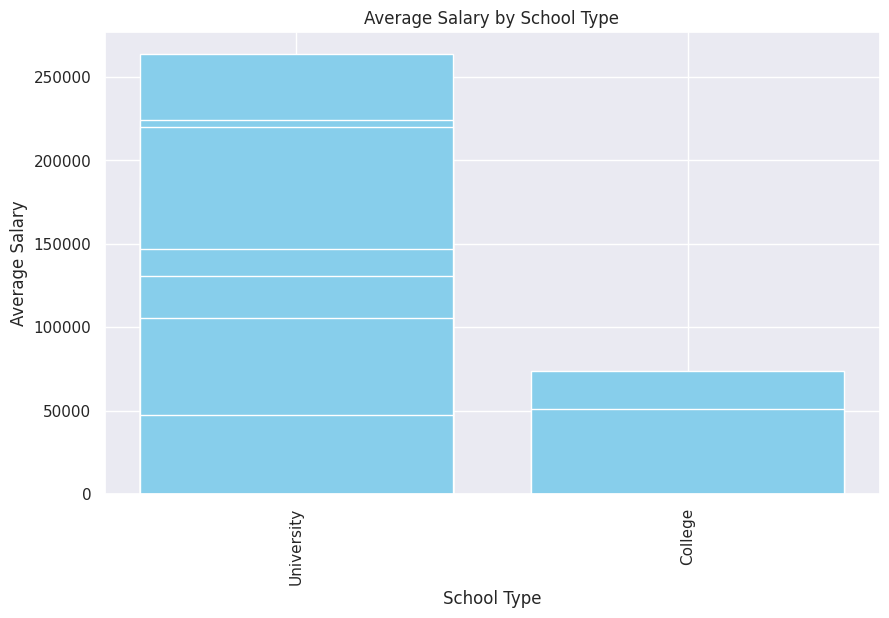

In [351]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('jobbs_descriptive.csv')


plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')

# Visualization (Matplotlib bar plot)
plt.bar(df_cleaned['SCHOOL_TYPE'], df_cleaned['AVERAGE_SALARY'], color='skyblue')
plt.xlabel('School Type')
plt.ylabel('Average Salary')
plt.title('Distrbution Of school type')
plt.xticks(rotation=90)
plt.show()


#**Now** let us see the perfect job to gaurantee a good future , i will write a code  that selects the top 10 jobs titles with the highest average salaries and then creates a horizontal bar plot using Seaborn.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


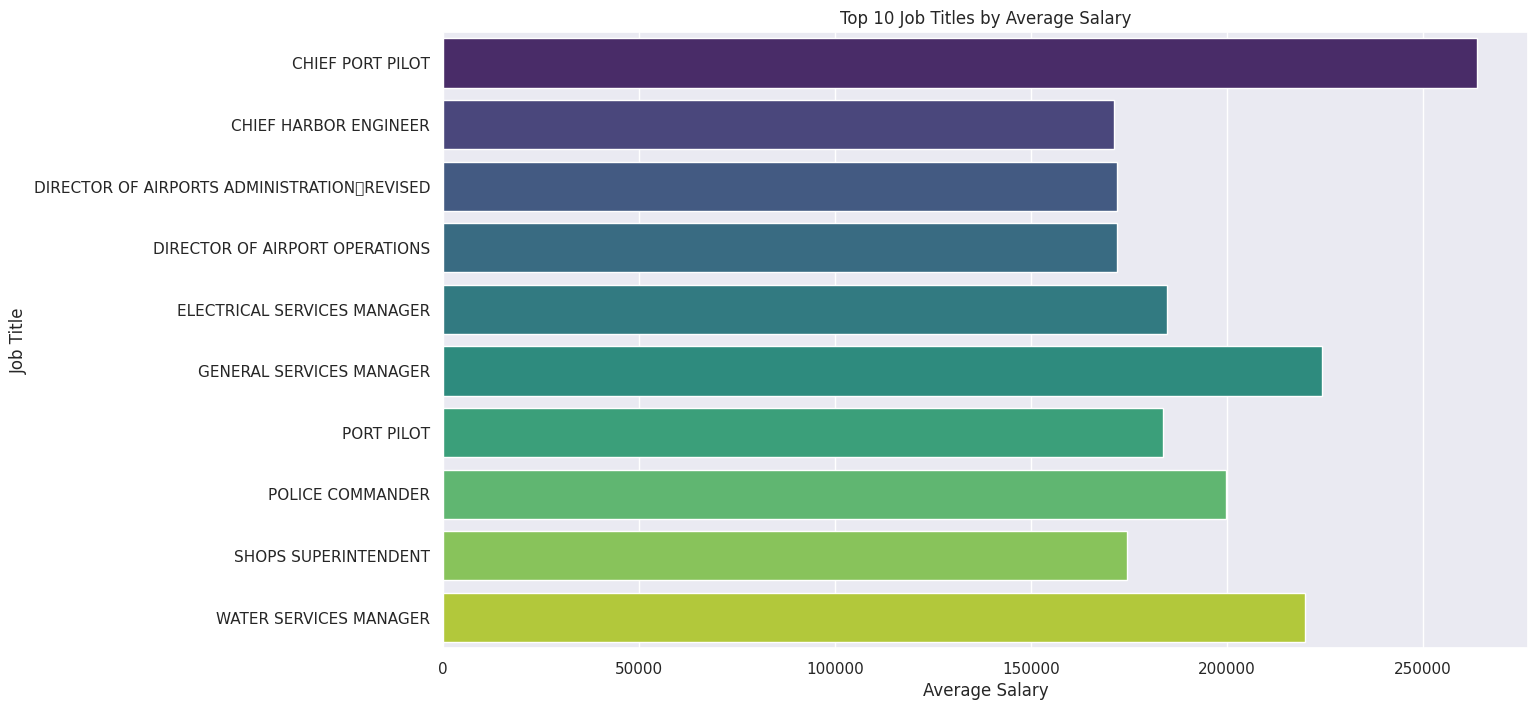

In [354]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('jobbs_descriptive.csv')




dfnew=df
# Select the top 10 job titles based on average salary
top_n = 10
top_job_titles = dfnew.groupby('JOB_CLASS_TITLE')['AVERAGE_SALARY'].mean().nlargest(top_n).index

# Filtering  the DataFrame for the top job titles
df_top_jobs = dfnew[dfnew['JOB_CLASS_TITLE'].isin(top_job_titles)]


plt.figure(figsize=(14, 8))

# Visualization (Seaborn horizontal bar plot)
sns.barplot(x='AVERAGE_SALARY', y='JOB_CLASS_TITLE', data=df_top_jobs, palette='viridis')
plt.title(f'Top {top_n} Job Titles by Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')

plt.show()


### <span style="color:brown">Q3:

What the best time in the year to be ready for a job applying in any experience level?

To determine the best time of the year for job applications based on the fetures  i will  analyze the 'OPEN_DATE' column

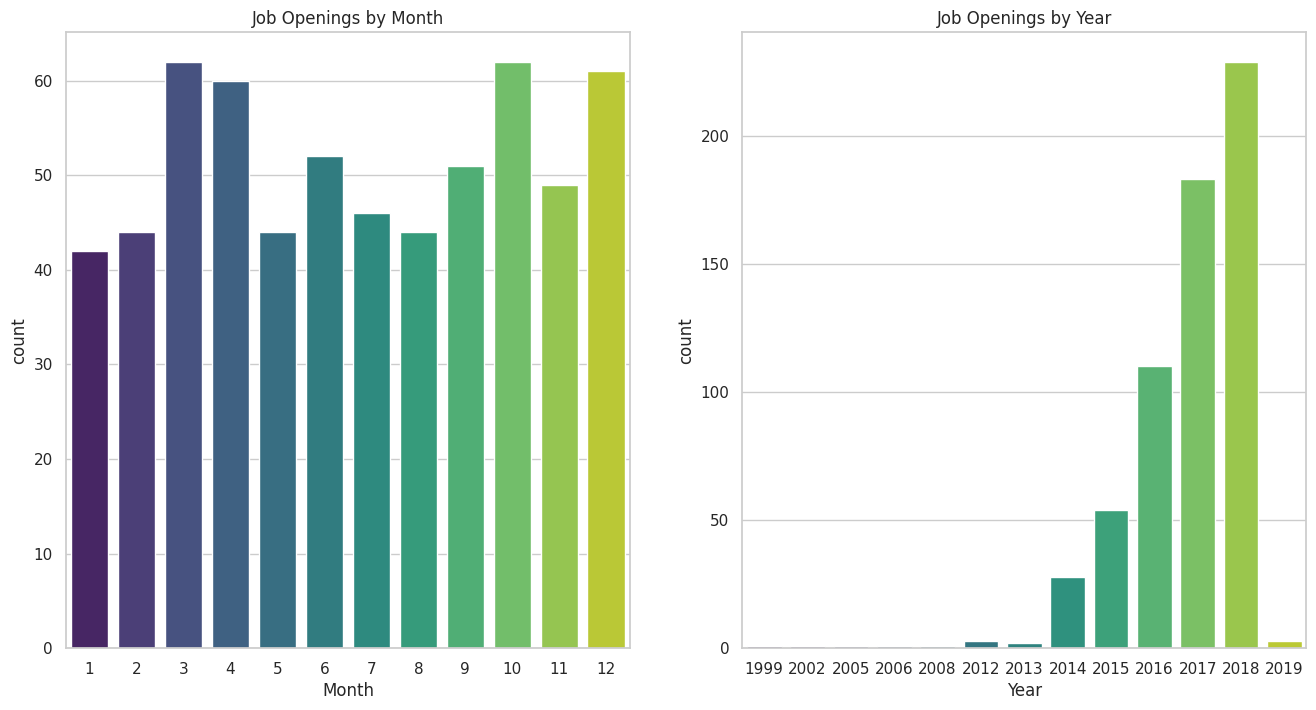

In [362]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('jobbs_descriptive.csv')

# Drop rows with missing values in relevant columns
df_cleaned = df.dropna(subset=['JOB_CLASS_TITLE', 'OPEN_DATE'])

# Convert 'OPEN_DATE' to datetime
df_cleaned['OPEN_DATE'] = pd.to_datetime(df_cleaned['OPEN_DATE'], errors='coerce')

# Extract month and year from 'OPEN_DATE'
df_cleaned['OPEN_MONTH'] = df_cleaned['OPEN_DATE'].dt.month
df_cleaned['OPEN_YEAR'] = df_cleaned['OPEN_DATE'].dt.year

# Set a larger figure size and change style for better clarity
plt.figure(figsize=(16, 8))
sns.set(style='whitegrid')  # Change the style if needed

# Visualization (Seaborn countplot for months)
plt.subplot(1, 2, 1)
sns.countplot(x='OPEN_MONTH', data=df_cleaned, palette='viridis')
plt.title('Job Openings by Month')
plt.xlabel('Month')

# Visualization (Seaborn countplot for years)
plt.subplot(1, 2, 2)
sns.countplot(x='OPEN_YEAR', data=df_cleaned, palette='viridis')
plt.title('Job Openings by Year')
plt.xlabel('Year')

plt.show()


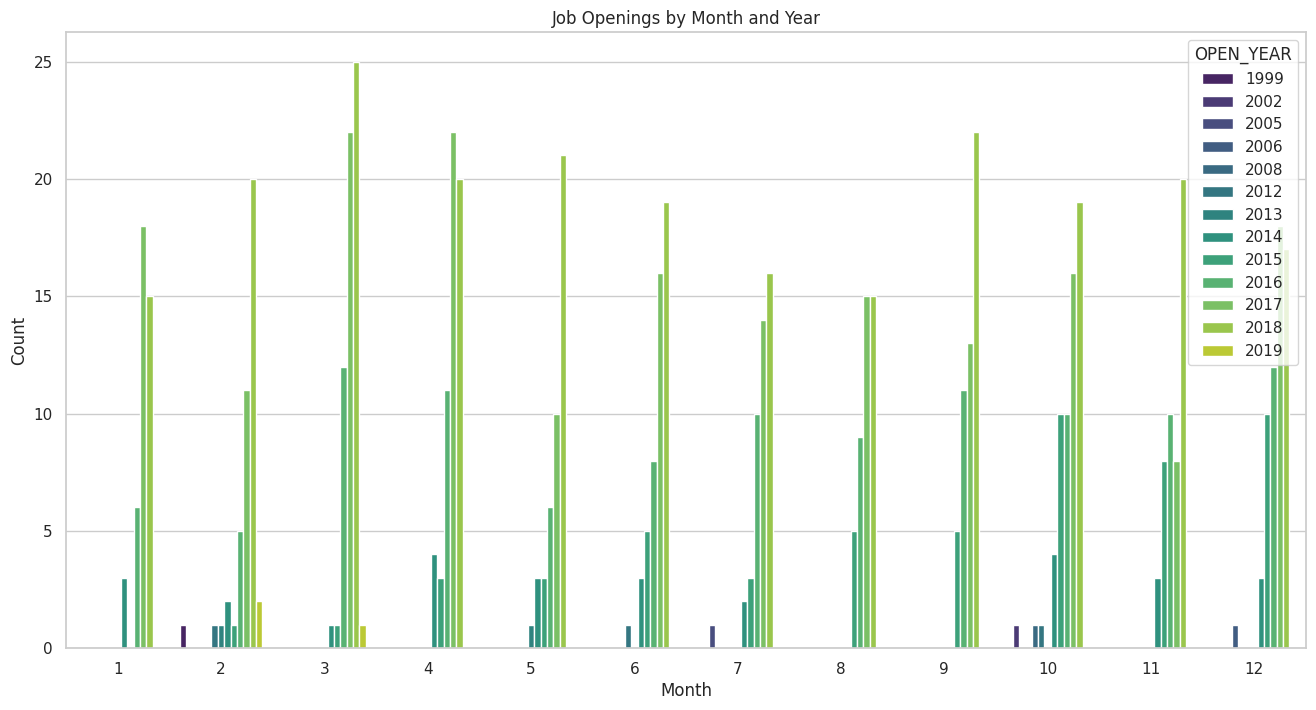

In [361]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('jobbs_descriptive.csv')

# Drop rows with missing values in relevant columns
df_cleaned = df.dropna(subset=['JOB_CLASS_TITLE', 'OPEN_DATE'])

# Convert 'OPEN_DATE' to datetime
df_cleaned['OPEN_DATE'] = pd.to_datetime(df_cleaned['OPEN_DATE'], errors='coerce')

# Extract month and year from 'OPEN_DATE'
df_cleaned['OPEN_MONTH'] = df_cleaned['OPEN_DATE'].dt.month
df_cleaned['OPEN_YEAR'] = df_cleaned['OPEN_DATE'].dt.year

# Set a larger figure size and change style for better clarity
plt.figure(figsize=(16, 8))
sns.set(style='whitegrid')  # Change the style if needed

# Visualization (Seaborn countplot for both year and month)
sns.countplot(x='OPEN_MONTH', hue='OPEN_YEAR', data=df_cleaned, palette='viridis')
plt.title('Job Openings by Month and Year')
plt.xlabel('Month')
plt.ylabel('Count')

plt.show()


This way it will be obvious when it is the best time in the year to be ready for a job applying in any experience level

#I will get A NAP 💤

### <span style="color:brown">Q4:

Is experience more important than educational level?

The first thing i had in mind To determine if experience is more important than educational level, is to explore an  approach to understand the relationship between variables. i  will  create scatter plots and visually inspect the relationship.

 Additionally,i will use the pairplot function in Seaborn to create scatter plots for multiple variables simultaneously.

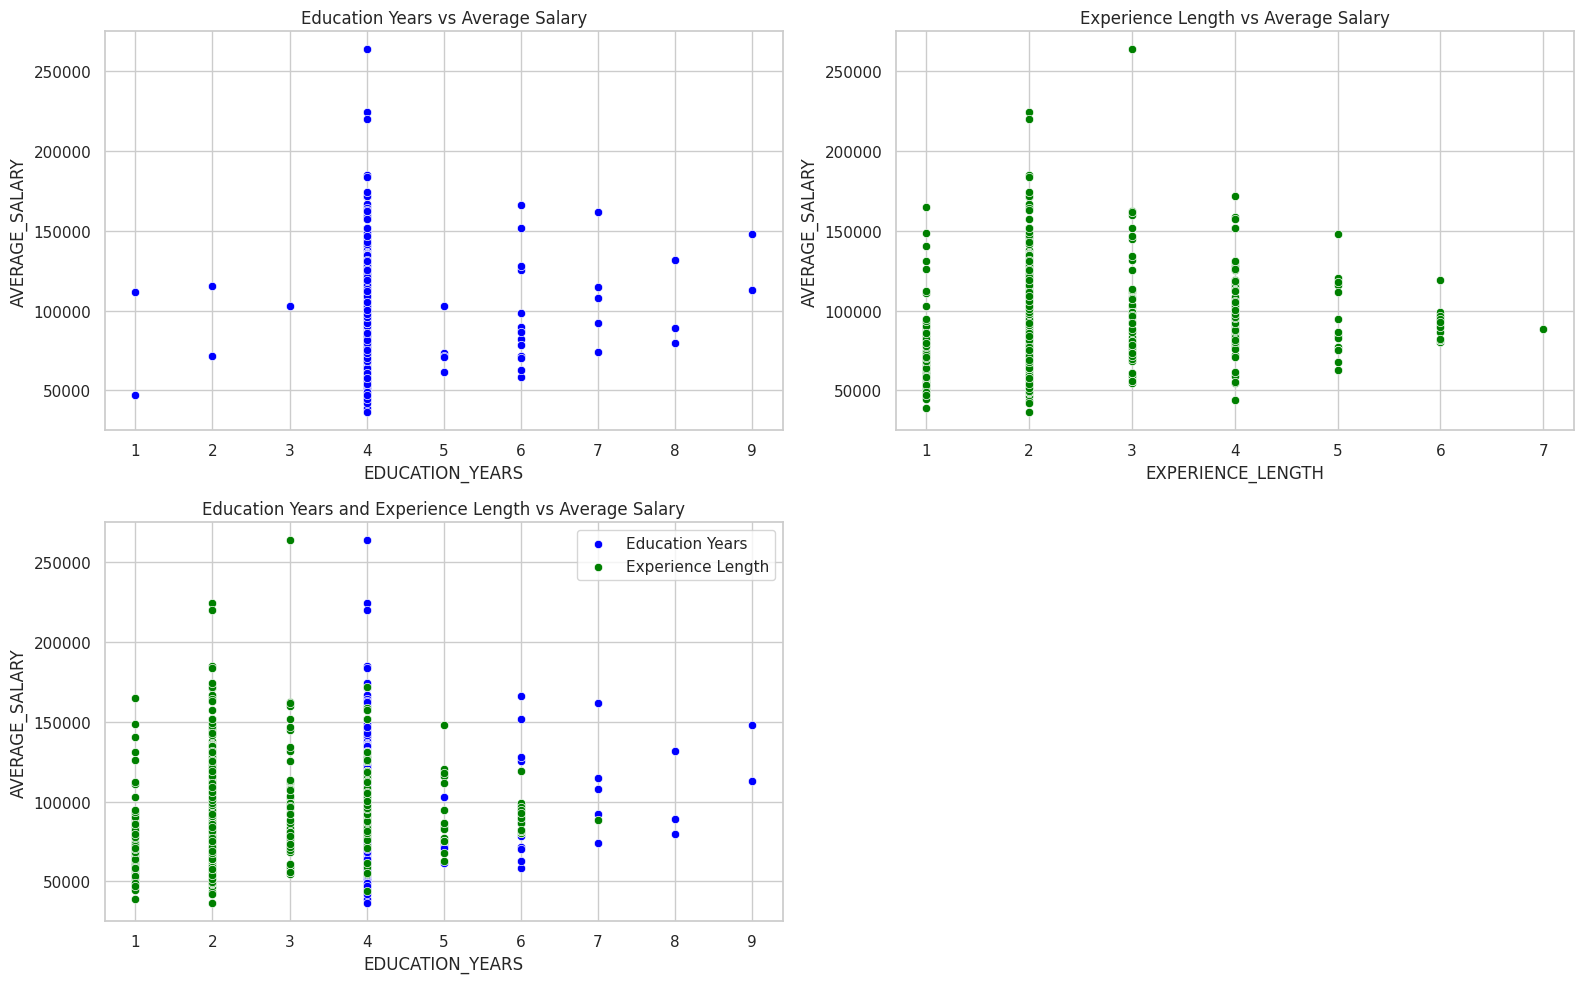

In [378]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('jobbs_descriptive.csv')

# Drop rows with missing values in relevant columns
df_cleaned = df.dropna(subset=['EDUCATION_YEARS', 'EXPERIENCE_LENGTH', 'AVERAGE_SALARY'])

# Set a larger figure size
plt.figure(figsize=(16, 10))

# Scatter plot for Education Years and Average Salary
plt.subplot(2, 2, 1)
sns.scatterplot(x='EDUCATION_YEARS', y='AVERAGE_SALARY', data=df_cleaned, color='blue')
plt.title('Education Years vs Average Salary')

# Scatter plot for Experience Length and Average Salary
plt.subplot(2, 2, 2)
sns.scatterplot(x='EXPERIENCE_LENGTH', y='AVERAGE_SALARY', data=df_cleaned, color='green')
plt.title('Experience Length vs Average Salary')

# Scatter plot for both Education Years and Experience Length with Average Salary
plt.subplot(2, 2, 3)
sns.scatterplot(x='EDUCATION_YEARS', y='AVERAGE_SALARY', data=df_cleaned, color='blue', label='Education Years')
sns.scatterplot(x='EXPERIENCE_LENGTH', y='AVERAGE_SALARY', data=df_cleaned, color='green', label='Experience Length')
plt.title('Education Years and Experience Length vs Average Salary')
plt.legend()

plt.tight_layout()
plt.show()


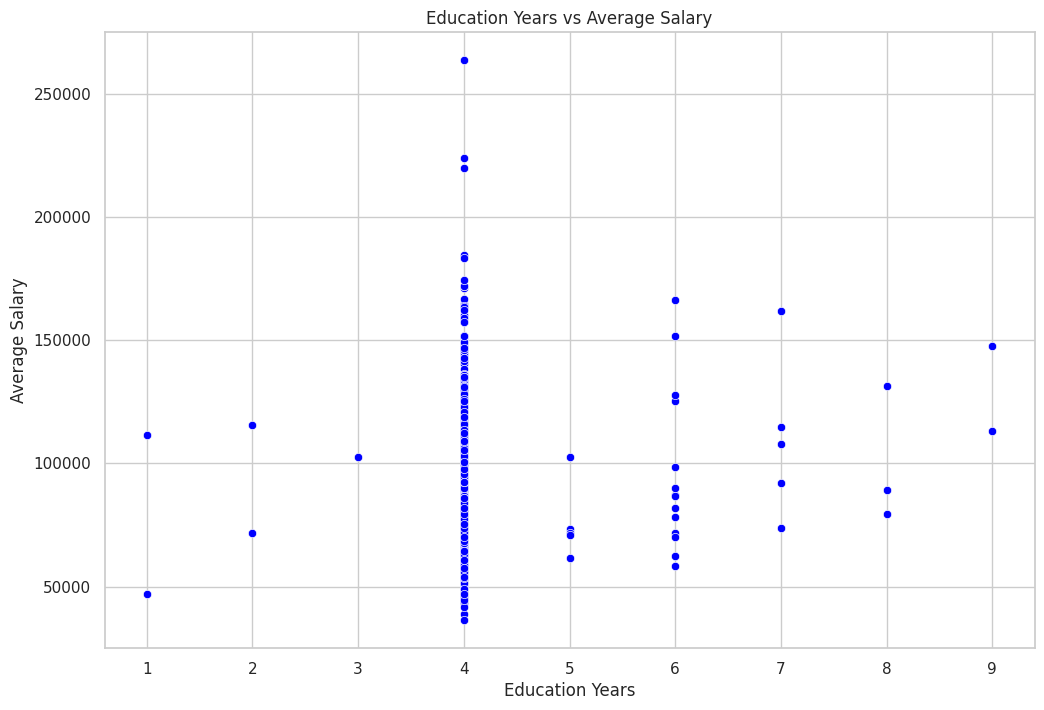

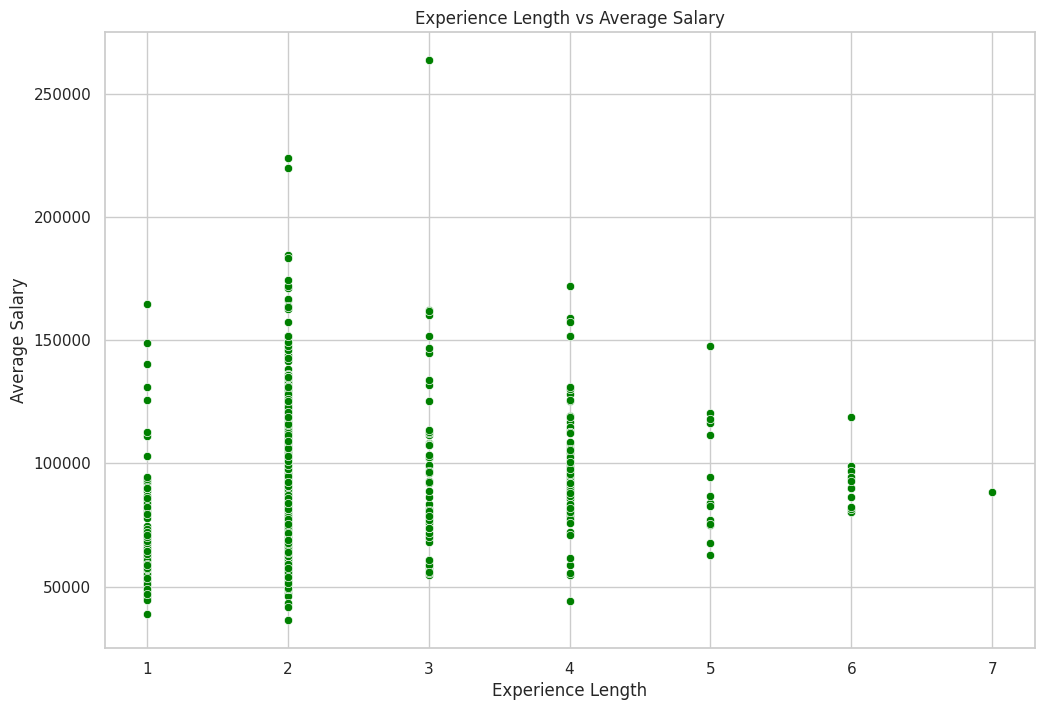

In [377]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('jobbs_descriptive.csv')

# Drop rows with missing values in relevant columns
df_cleaned = df.dropna(subset=['EDUCATION_YEARS', 'EXPERIENCE_LENGTH', 'AVERAGE_SALARY'])


plt.figure(figsize=(12, 8))

# Scatter plot for Education Years and Average Salary (Blue)
sns.scatterplot(x='EDUCATION_YEARS', y='AVERAGE_SALARY', data=df_cleaned, color='blue')
plt.title('Education Years vs Average Salary')
plt.xlabel('Education Years')
plt.ylabel('Average Salary')
plt.show()

# Scatter plot for Experience Length and Average Salary (Green)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='EXPERIENCE_LENGTH', y='AVERAGE_SALARY', data=df_cleaned, color='green')
plt.title('Experience Length vs Average Salary')
plt.xlabel('Experience Length')
plt.ylabel('Average Salary')
plt.show()


AS appears from the graphs the experince is much more important

### <span style="color:brown">Q5:

Which fresh grade job that will guarantee many job offers in the future for him?

To identify fresh grade jobs that may guarantee many job offers in the future, i will consider the following features :

High Entry Salary , High Demand Job Titles
,No Experience Requirement and High Education Level

 I used the f_regression method, which is suitable for regression problems. The code will output the selected feature based on the highest F-statistic.

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

df_selected = df[df['EXPERIENCE_LENGTH'] < 2]

# Assuming 'target' is your target variable (e.g., AVERAGE_SALARY)
target = df_selected['AVERAGE_SALARY']

# Feature selection using SelectKBest with chi-squared test
num_features_to_select = 2  # Adjust based on your preference
feature_selector = SelectKBest(chi2, k=num_features_to_select)
selected_features = feature_selector.fit_transform(df_selected, target)

# Get the indices of selected features
selected_indices = feature_selector.get_support(indices=True)

# Display the selected feature indices
print("Selected Feature Indices:", selected_indices)


<ipython-input-4-38f00c1873d3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['JOB_CLASS_TITLE'] = label_encoder.fit_transform(df_filtered['JOB_CLASS_TITLE'])


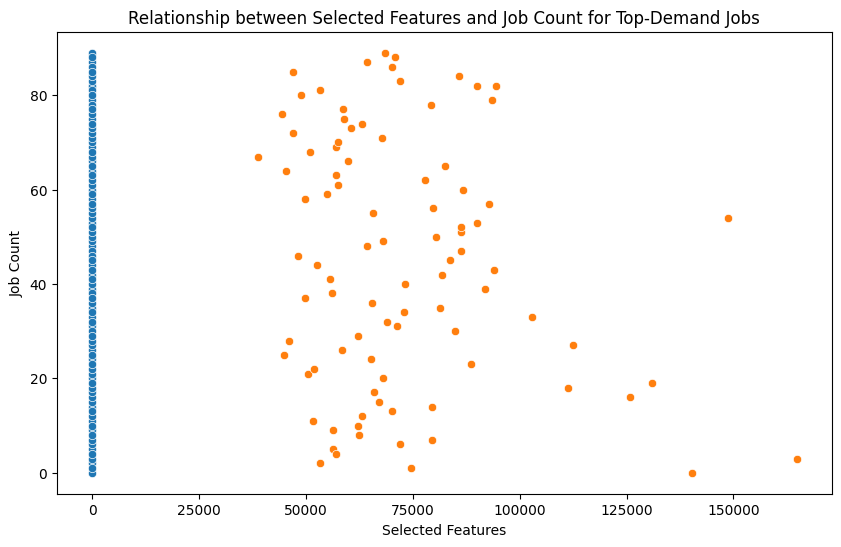

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv('jobbs_descriptive.csv')


# Filter less experience (less than two years)
df_filtered = df[df['EXPERIENCE_LENGTH'] < 2]

# Encode categorical target variable
label_encoder = LabelEncoder()
df_filtered['JOB_CLASS_TITLE'] = label_encoder.fit_transform(df_filtered['JOB_CLASS_TITLE'])

# Feature Selection
selected_features = ['EDUCATION_YEARS',  'AVERAGE_SALARY']
df_selected = df_filtered[selected_features]

# Target variable
target = df_filtered['JOB_CLASS_TITLE']

# Feature Selection using Chi-squared
num_features_to_select = 2
feature_selector = SelectKBest(chi2, k=num_features_to_select)
selected_features = feature_selector.fit_transform(df_selected, target)

# Get the indices of selected features
selected_feature_indices = feature_selector.get_support(indices=True)

# Visualize the relationship between selected features and job count
plt.figure(figsize=(10, 6))
for i in selected_feature_indices:
    sns.scatterplot(x=df_selected.iloc[:, i], y=target)
plt.xlabel("Selected Features")
plt.ylabel("Job Count")
plt.title("Relationship between Selected Features and Job Count for Top-Demand Jobs")
plt.show()


<ipython-input-8-053af2a6c4bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['JOB_CLASS_TITLE'] = label_encoder.fit_transform(df_filtered['JOB_CLASS_TITLE'])


Most Less Experienced Jobs:
     JOB_CLASS_TITLE  EXPERIENCE_LENGTH
8                  0                1.0
404               67                1.0
402               66                1.0
401               69                1.0
400               64                1.0
386               61                1.0
381               59                1.0
378               57                1.0
367               60                1.0
362               58                1.0


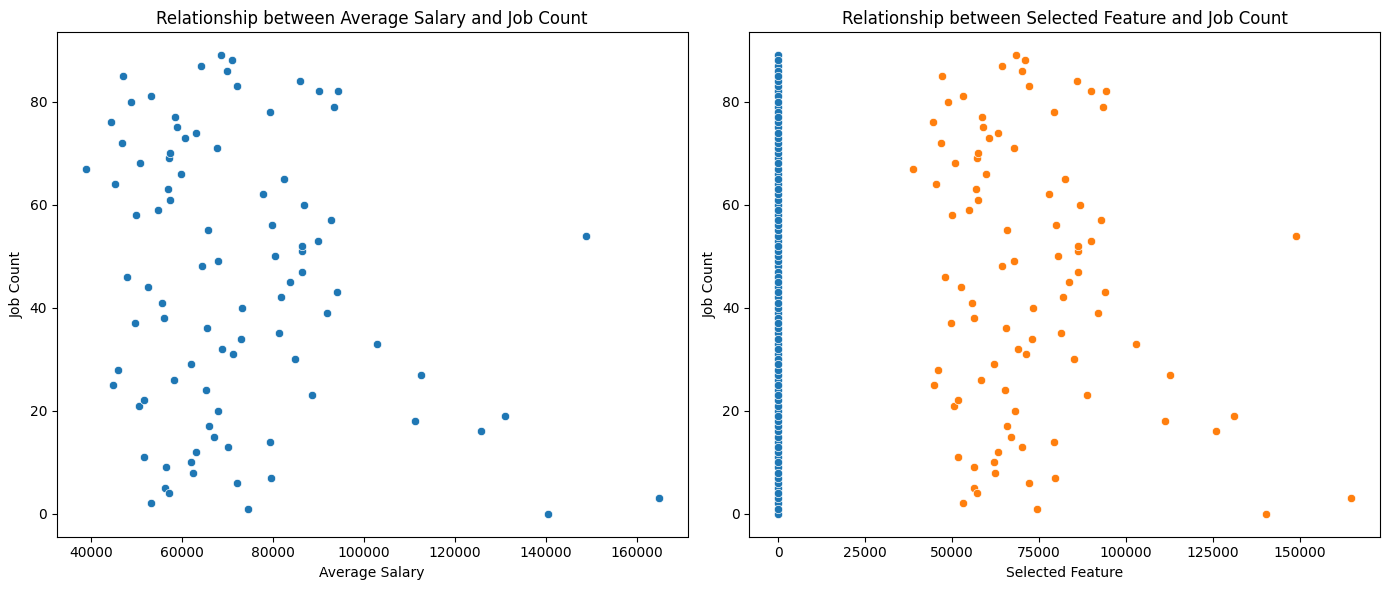

In [8]:
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv('jobbs_descriptive.csv')


# Filter less experience (less than two years)
df_filtered = df[df['EXPERIENCE_LENGTH'] < 2]

# Encode categorical target variable
label_encoder = LabelEncoder()
df_filtered['JOB_CLASS_TITLE'] = label_encoder.fit_transform(df_filtered['JOB_CLASS_TITLE'])

# Feature Selection
selected_features = ['EDUCATION_YEARS', 'AVERAGE_SALARY']
df_selected = df_filtered[selected_features]

# Target variable
target = df_filtered['JOB_CLASS_TITLE']

# Feature Selection using Chi-squared
num_features_to_select = 2
feature_selector = SelectKBest(chi2, k=num_features_to_select)
selected_features = feature_selector.fit_transform(df_selected, target)

# Get the indices of selected features
selected_feature_indices = feature_selector.get_support(indices=True)

# Print the most less experienced jobs
print("Most Less Experienced Jobs:")
print(df_filtered[['JOB_CLASS_TITLE', 'EXPERIENCE_LENGTH']].sort_values(by='EXPERIENCE_LENGTH').head(10))

# Visualize the relationship between average salary and job count alone and then with the selected feature
plt.figure(figsize=(14, 6))

# Plot 1: Average Salary vs Job Count
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_filtered['AVERAGE_SALARY'], y=target)
plt.xlabel("Average Salary")
plt.ylabel("Job Count")
plt.title("Relationship between Average Salary and Job Count")

# Plot 2: Selected Feature vs Job Count
plt.subplot(1, 2, 2)
for i in selected_feature_indices:
    sns.scatterplot(x=df_selected.iloc[:, i], y=target)
plt.xlabel("Selected Feature")
plt.ylabel("Job Count")
plt.title("Relationship between Selected Feature and Job Count")

plt.tight_layout()
plt.show()


i printed  the top 10 jobs with the least experience and then visualizes the relationship between average salary and job count and the selected feature and job count. Adjust the code as needed for your specific requirements.







### <span style="color:brown">Q6:

"The City of Los Angeles does not discriminate on the basis of race, religion, national origin, sex, age, marital status, sexual orientation, gender identity, gender expression, disability, creed, color, ancestry, medical condition (cancer), or Acquired Immune Deficiency Syndrome.

AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER
"

The above statment is qouted from one of the job descriptions.

Based on the jobs requirments you structred above do you think that LA governate may bais a little for men over women or the applicant marital status for example may effect his chance to gain the job?


In [12]:
import pandas as pd
import re

df = pd.read_csv('jobbs_descriptive.csv')

# Extract GENDER from REQUIREMENT_SET_TEXT
df['GENDER'] = df['REQUIREMENT_SET_TEXT'].str.extract(r'(?i)\b(men|man|women|woman|female|male)\b')

# Extract MARITAL_STATUS from REQUIREMENT_SET_TEXT
df['MARITAL_STATUS'] = df['REQUIREMENT_SET_TEXT'].str.extract(r'(?i)\b(single|married|divorced|widowed)\b')

# Save the updated DataFrame to the CSV file
df.to_csv('jobbs_descriptive_updated.csv', index=False)


In [13]:
# Print unique values in the 'GENDER' column
print("Unique values in GENDER column:")
print(df['GENDER'].unique())

# Print unique values in the 'MARITAL_STATUS' column
print("\nUnique values in MARITAL_STATUS column:")
print(df['MARITAL_STATUS'].unique())


Unique values in GENDER column:
[nan]

Unique values in MARITAL_STATUS column:
[nan 'single' 'Single']


THe result of the print indicates that both GENDER and MARITAL_STATUS Are not important , so the city provides for real  AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER
as you see in the visualization too


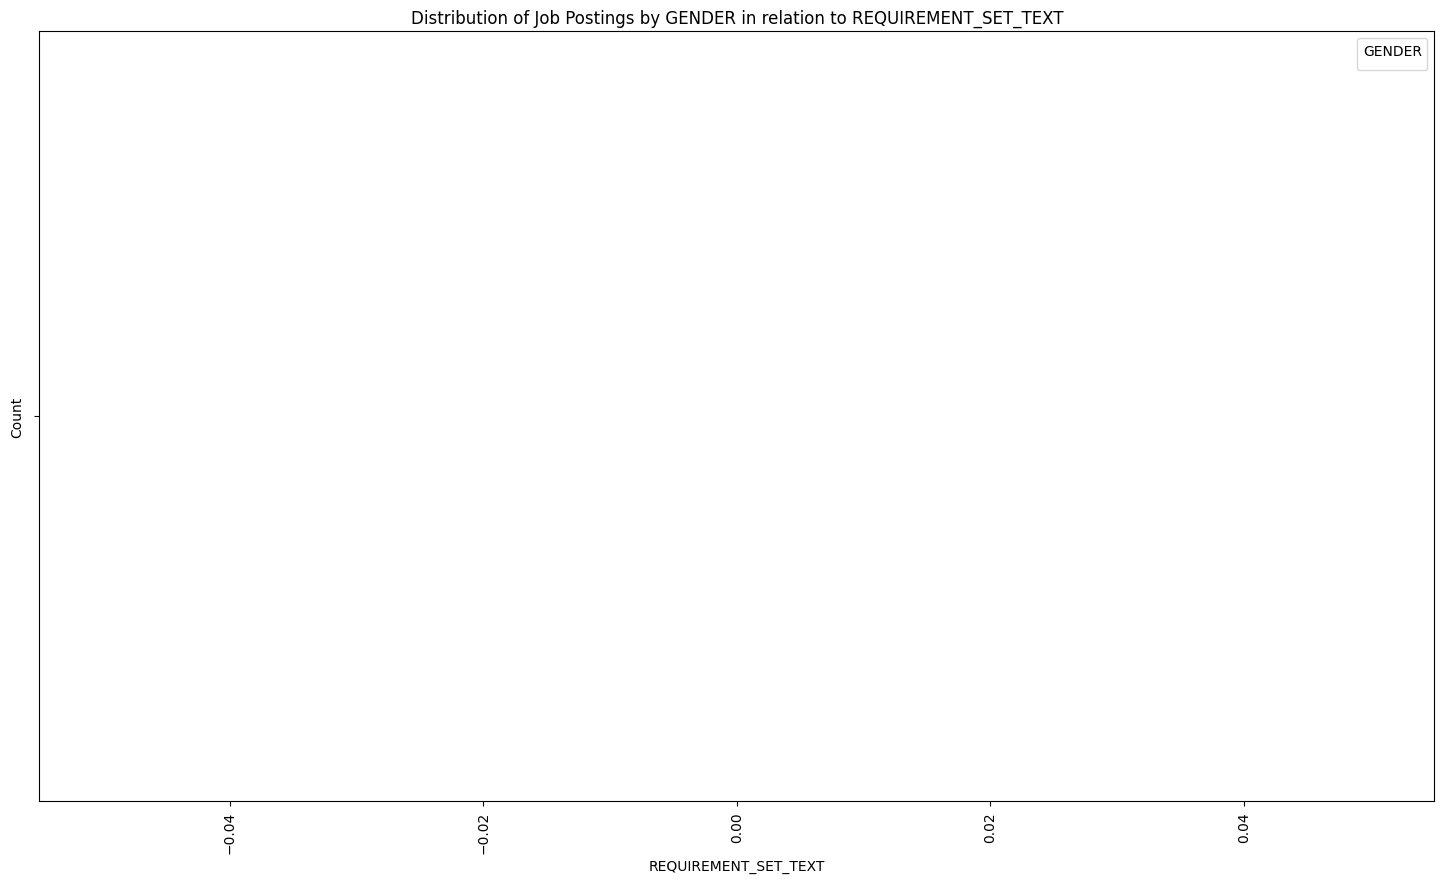

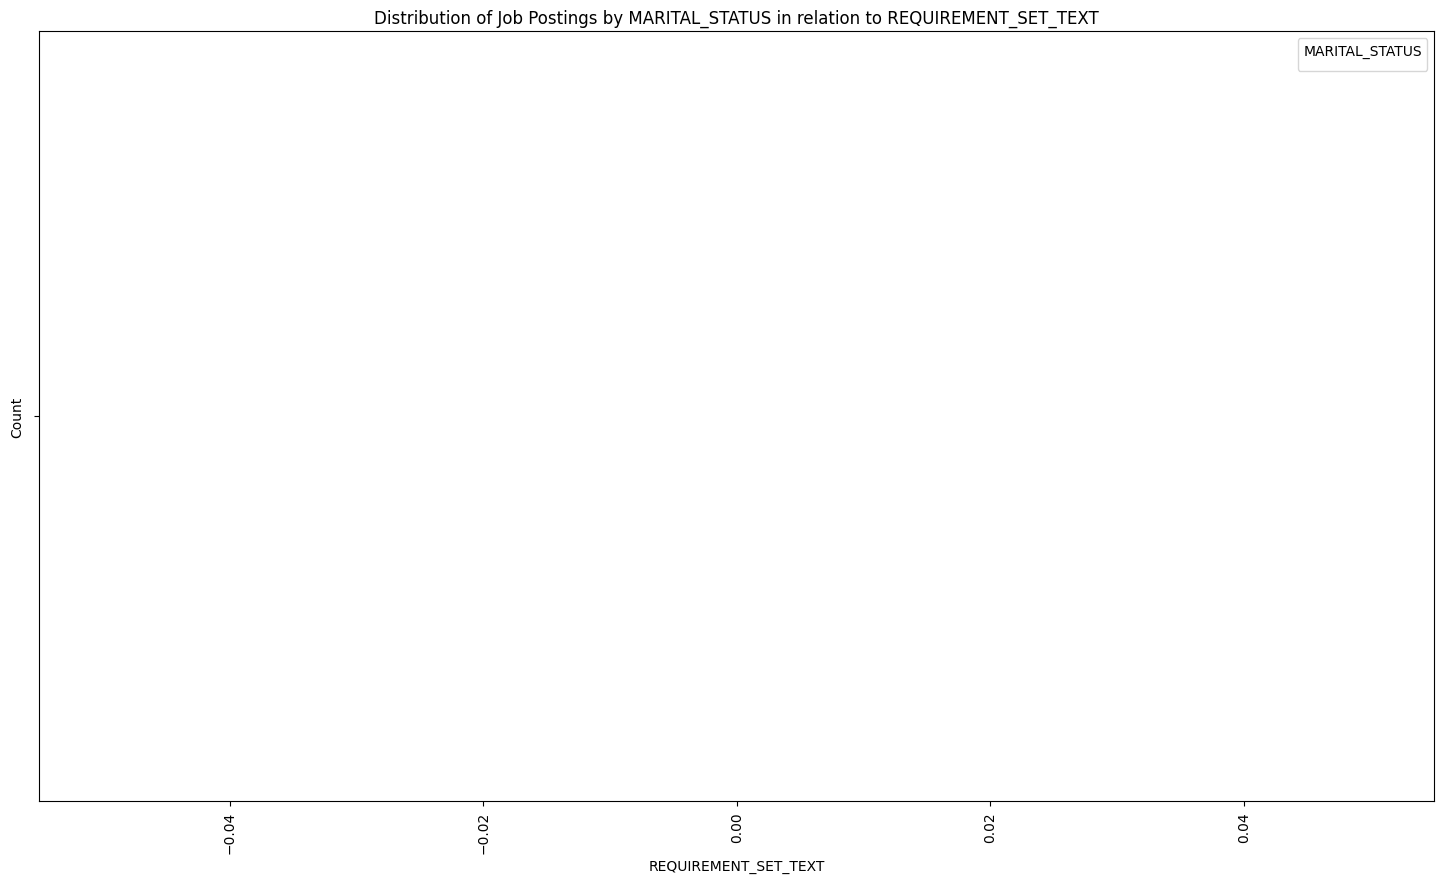

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the filtered DataFrame to avoid SettingWithCopyWarning
df_filtered_copy = df_filtered.copy()

# Handle NaN values in 'GENDER' and 'MARITAL_STATUS'
df_filtered_copy['GENDER'].fillna('Unknown', inplace=True)
df_filtered_copy['MARITAL_STATUS'].fillna('Unknown', inplace=True)

# Convert 'MARITAL_STATUS' to lowercase for consistency
df_filtered_copy['MARITAL_STATUS'] = df_filtered_copy['MARITAL_STATUS'].str.lower()

# Plot the distribution of job postings by GENDER in relation to REQUIREMENT_SET_TEXT
plt.figure(figsize=(18, 10))
sns.barplot(x='REQUIREMENT_SET_TEXT', hue='GENDER', data=df_filtered_copy, estimator=lambda x: len(x))
plt.xlabel("REQUIREMENT_SET_TEXT")
plt.ylabel("Count")
plt.title("Distribution of Job Postings by GENDER in relation to REQUIREMENT_SET_TEXT")
plt.xticks(rotation=90)
plt.legend(title='GENDER', loc='upper right')
plt.show()

# Plot the distribution of job postings by MARITAL_STATUS in relation to REQUIREMENT_SET_TEXT
plt.figure(figsize=(18, 10))
sns.barplot(x='REQUIREMENT_SET_TEXT', hue='MARITAL_STATUS', data=df_filtered_copy, estimator=lambda x: len(x))
plt.xlabel("REQUIREMENT_SET_TEXT")
plt.ylabel("Count")
plt.title("Distribution of Job Postings by MARITAL_STATUS in relation to REQUIREMENT_SET_TEXT")
plt.xticks(rotation=90)
plt.legend(title='MARITAL_STATUS', loc='upper right')
plt.show()


### <span style="color:brown">Q7:

The city need an advice based on your analysis, build a new schools for more fresh non-experienced workers or encorge the work environment to help the workers to get promotions?

To answer the question of whether the city should build new schools for more fresh, non-experienced workers or encourage the work environment to help workers get promotions, we can use the Recursive Feature Elimination (RFE) method. RFE is a feature selection technique that recursively removes the least important features and builds a model until the desired number of features is reached.

#I will use the EXPERIENCE_LENGTH as the target variable, and other relevant features for prediction. The idea is to identify which features are most important in predicting the experience length required for a job. If education-related features are more important, it may suggest a focus on building new schools. If other factors are more important, it may suggest focusing on improving the work environment for promotions.

           Feature  Ranking
2   AVERAGE_SALARY        1
1     COURSE_COUNT        2
0  EDUCATION_YEARS        3


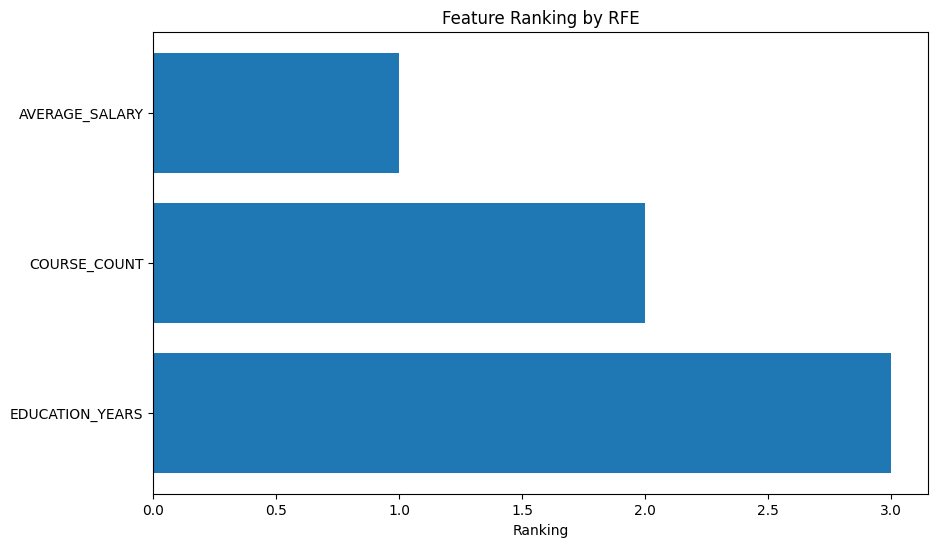

In [27]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


df = pd.read_csv('jobbs_descriptive.csv')



# Select relevant features
features = ['EDUCATION_YEARS', 'COURSE_COUNT', 'AVERAGE_SALARY']

# Remove rows with missing values in the selected features
df_cleaned = df.dropna(subset=features)

# Impute missing values in the target variable
imputer = SimpleImputer(strategy='median')
df_cleaned['EXPERIENCE_LENGTH'] = imputer.fit_transform(df_cleaned[['EXPERIENCE_LENGTH']])

# Convert categorical variables to numerical
X = pd.get_dummies(df_cleaned[features], drop_first=True)

# Select the target variable
y = df_cleaned['EXPERIENCE_LENGTH']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a RandomForestRegressor as the estimator
estimator = RandomForestRegressor()

# Initialize RFE
rfe = RFE(estimator, n_features_to_select=1)

# Fit RFE
rfe.fit(X_train, y_train)

# Get the ranking of each feature
ranking = rfe.ranking_

# Display the ranking of features
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking})
print(feature_ranking.sort_values(by='Ranking'))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_ranking['Feature'], feature_ranking['Ranking'])
plt.xlabel('Ranking')
plt.title('Feature Ranking by RFE')
plt.show()


#EDUCATION_YEARS is  The feature has the lowest ranking (3), indicating that it is considered the least important among the selected features for predicting or explaining 'EXPERIENCE_LENGTH' based on the RFE process.

**BREAK**

### <span style="color:brown">Q8:

What is the average salary for worker with a driver licence?

In [30]:
import pandas as pd

df = pd.read_csv('jobbs_descriptive.csv')

# Filter the dataset to include only rows where a driver's license is required
df_with_license = df[df['DRIVERS_LICENSE_REQ'] == 'R']

# Calculate the average salary for workers with a driver's license
average_salary_with_license = df_with_license['AVERAGE_SALARY'].mean()

print(f"The average salary for workers with a driver's license is: ${average_salary_with_license:.2f}")


The average salary for workers with a driver's license is: $95287.80


0


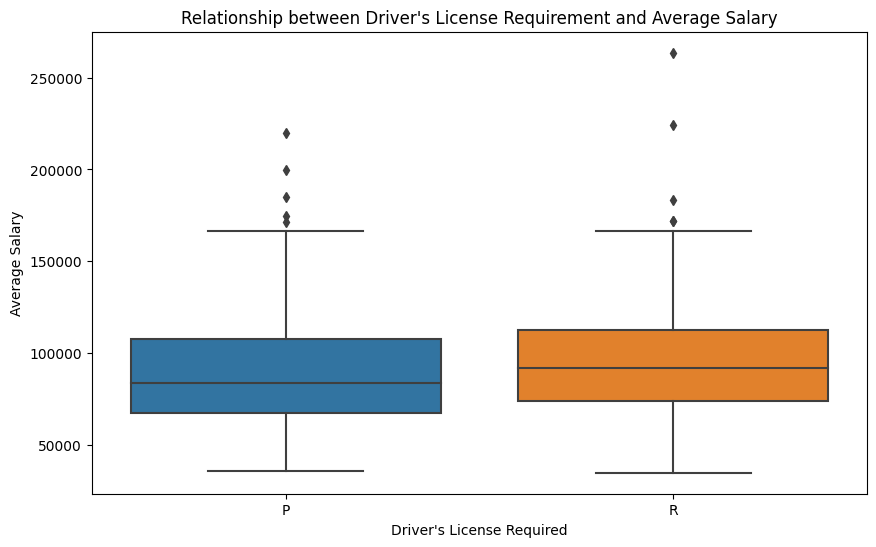

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('jobbs_descriptive.csv')
# Check for missing values in AVERAGE_SALARY column for required driver's license
print(df[df['DRIVERS_LICENSE_REQ'] == 'R']['AVERAGE_SALARY'].isnull().sum())

# Remove missing values
df_with_license = df.dropna(subset=['AVERAGE_SALARY', 'DRIVERS_LICENSE_REQ'])

# Plot the relationship between DRIVERS_LICENSE_REQ and AVERAGE_SALARY
plt.figure(figsize=(10, 6))
sns.boxplot(x='DRIVERS_LICENSE_REQ', y='AVERAGE_SALARY', data=df_with_license)
plt.xlabel("Driver's License Required")
plt.ylabel("Average Salary")
plt.title("Relationship between Driver's License Requirement and Average Salary")
plt.show()


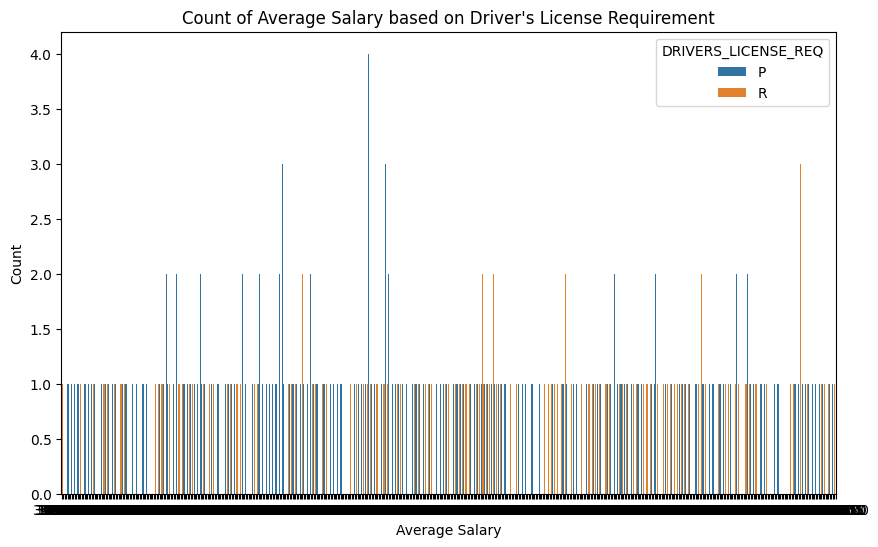

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('jobbs_descriptive.csv')

# Plot the count of AVERAGE_SALARY based on DRIVERS_LICENSE_REQ
plt.figure(figsize=(10, 6))
sns.countplot(x='AVERAGE_SALARY', hue='DRIVERS_LICENSE_REQ', data=df)
plt.xlabel("Average Salary")
plt.ylabel("Count")
plt.title("Count of Average Salary based on Driver's License Requirement")
plt.show()


NOW I FOUND THE AVERAGE SALARY FOR EACH WORKER WITH A D.L and also plot the result

Average Salary for Workers with a Driver's License:
     AVERAGE_SALARY  Average_Salary
0           34671.0         34671.0
1           36310.0         36310.0
2           44485.0         44485.0
3           44954.5         44954.5
4           46927.5         46927.5
..              ...             ...
235        171862.5        171862.5
236        171863.5        171863.5
237        183493.0        183493.0
238        224136.0        224136.0
239        263610.0        263610.0

[240 rows x 2 columns]


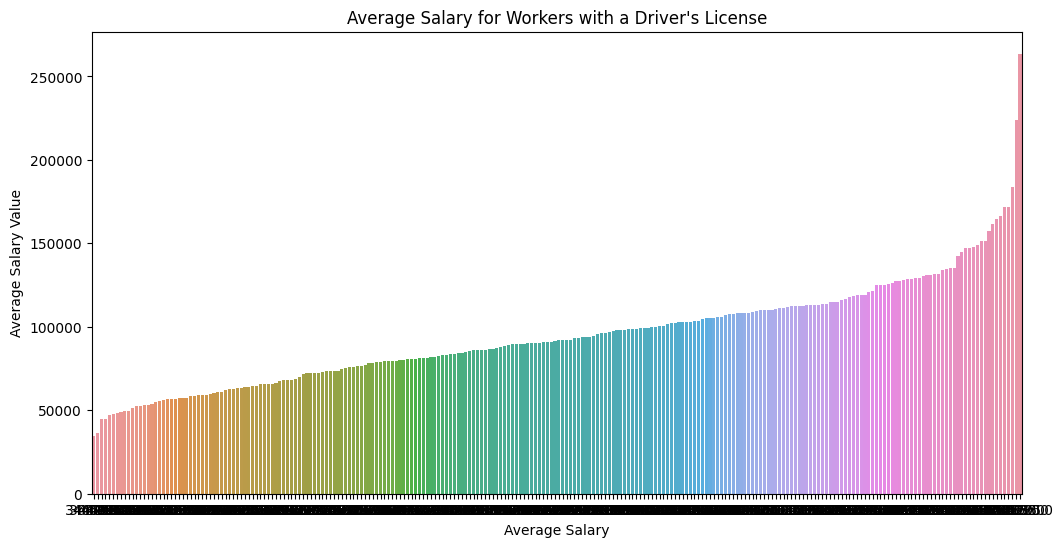

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('jobbs_descriptive.csv')

# Filter data for workers with a driver's license
df_with_license = df[df['DRIVERS_LICENSE_REQ'] == 'R']

# Calculate average salary for each worker
average_salary_by_license = df_with_license.groupby('AVERAGE_SALARY')['AVERAGE_SALARY'].mean().reset_index(name='Average_Salary')

# Print the average salary values
print("Average Salary for Workers with a Driver's License:")
print(average_salary_by_license)

# Plot the average salary for each worker with a driver's license
plt.figure(figsize=(12, 6))
sns.barplot(x='AVERAGE_SALARY', y='Average_Salary', data=average_salary_by_license)
plt.xlabel("Average Salary")
plt.ylabel("Average Salary Value")
plt.title("Average Salary for Workers with a Driver's License")
plt.show()


## <span style="color:brown">Q9:

list the most feature that effect the salary of the worker.

 i selected a few features related to education, experience, courses, course length, and driver's license. You can modify the features list based on your specific requirements. The output will provide the ranking of features, with the most important feature having the lowest ranking.

<ipython-input-37-046522954c6e>:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_cleaned['ENTRY_SALARY'] = df_cleaned['ENTRY_SALARY'].str.replace('$', '').str.replace(',', '').str.split('-').apply(lambda x: (int(x[0]) + int(x[1])) / 2 if len(x) > 1 else int(x[0]))
<ipython-input-37-046522954c6e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ENTRY_SALARY'] = df_cleaned['ENTRY_SALARY'].str.replace('$', '').str.replace(',', '').str.split('-').apply(lambda x: (int(x[0]) + int(x[1])) / 2 if len(x) > 1 else int(x[0]))


                 Feature  Ranking
1      EXPERIENCE_LENGTH        1
2           COURSE_COUNT        2
3          COURSE_LENGTH        3
4  DRIVERS_LICENSE_REQ_R        4
0        EDUCATION_YEARS        5


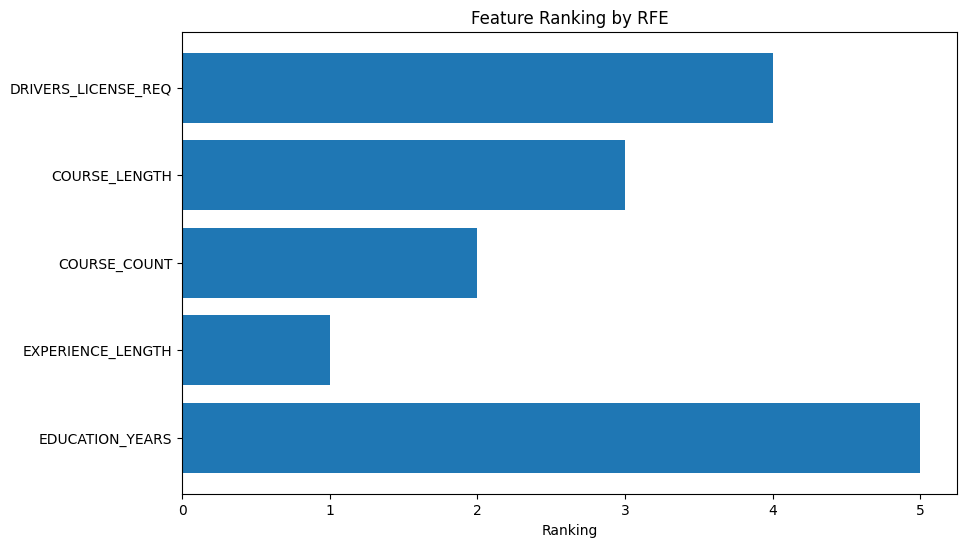

In [37]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df = pd.read_csv('jobbs_descriptive.csv')

# Select relevant features
features = [
    'EDUCATION_YEARS',
    'EXPERIENCE_LENGTH',
    'COURSE_COUNT',
    'COURSE_LENGTH',
    'DRIVERS_LICENSE_REQ',
]

# Remove rows with missing values in the selected features
df_cleaned = df.dropna(subset=features)

# Extract numerical values from the 'ENTRY_SALARY' column
df_cleaned['ENTRY_SALARY'] = df_cleaned['ENTRY_SALARY'].str.replace('$', '').str.replace(',', '').str.split('-').apply(lambda x: (int(x[0]) + int(x[1])) / 2 if len(x) > 1 else int(x[0]))

# Convert categorical variables to numerical
X = pd.get_dummies(df_cleaned[features], drop_first=True)

# Select the target variable
y = df_cleaned['ENTRY_SALARY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a RandomForestRegressor as the estimator
estimator = RandomForestRegressor()

# Initialize RFE
rfe = RFE(estimator, n_features_to_select=1)

# Fit RFE
rfe.fit(X_train, y_train)

# Get the ranking of each feature
ranking = rfe.ranking_

# Display the ranking of features
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking})
print(feature_ranking.sort_values(by='Ranking'))
# Display the ranking of features using a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, ranking)
plt.xlabel('Ranking')
plt.title('Feature Ranking by RFE')
plt.show()



the result of ranking indicates that EXPERIENCE_LENGTH has the highest ranking and it is the most featuers that affect the salary

## <span style="color:brown">Q10:

Give a full statistical description for all numrical data columns including all insights and needed figures to visualize them.

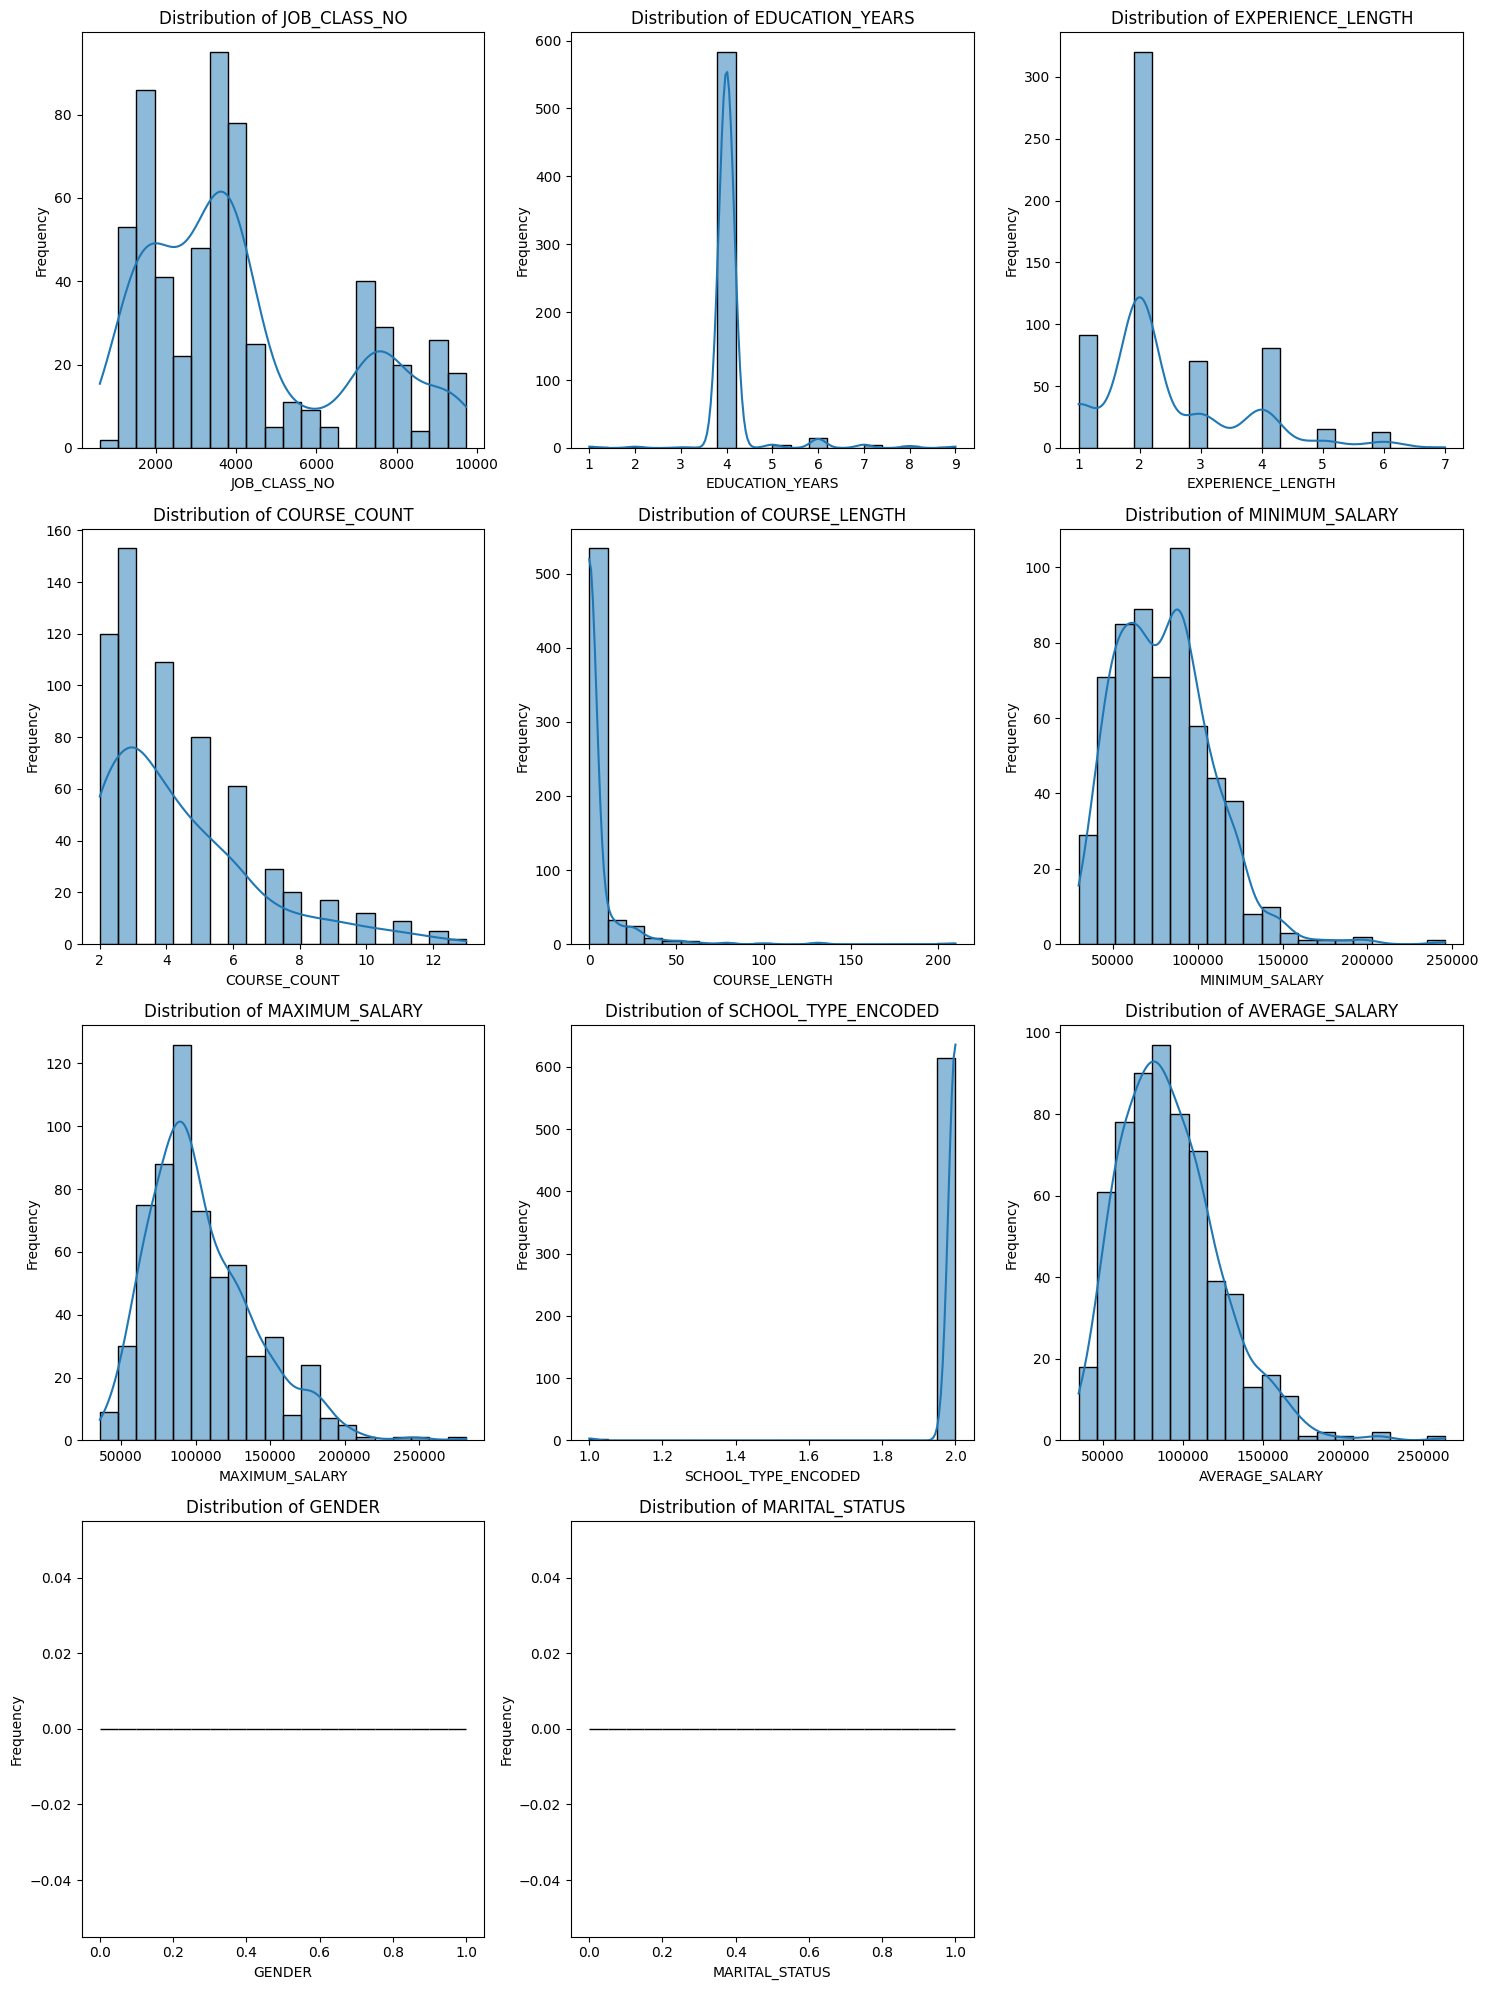

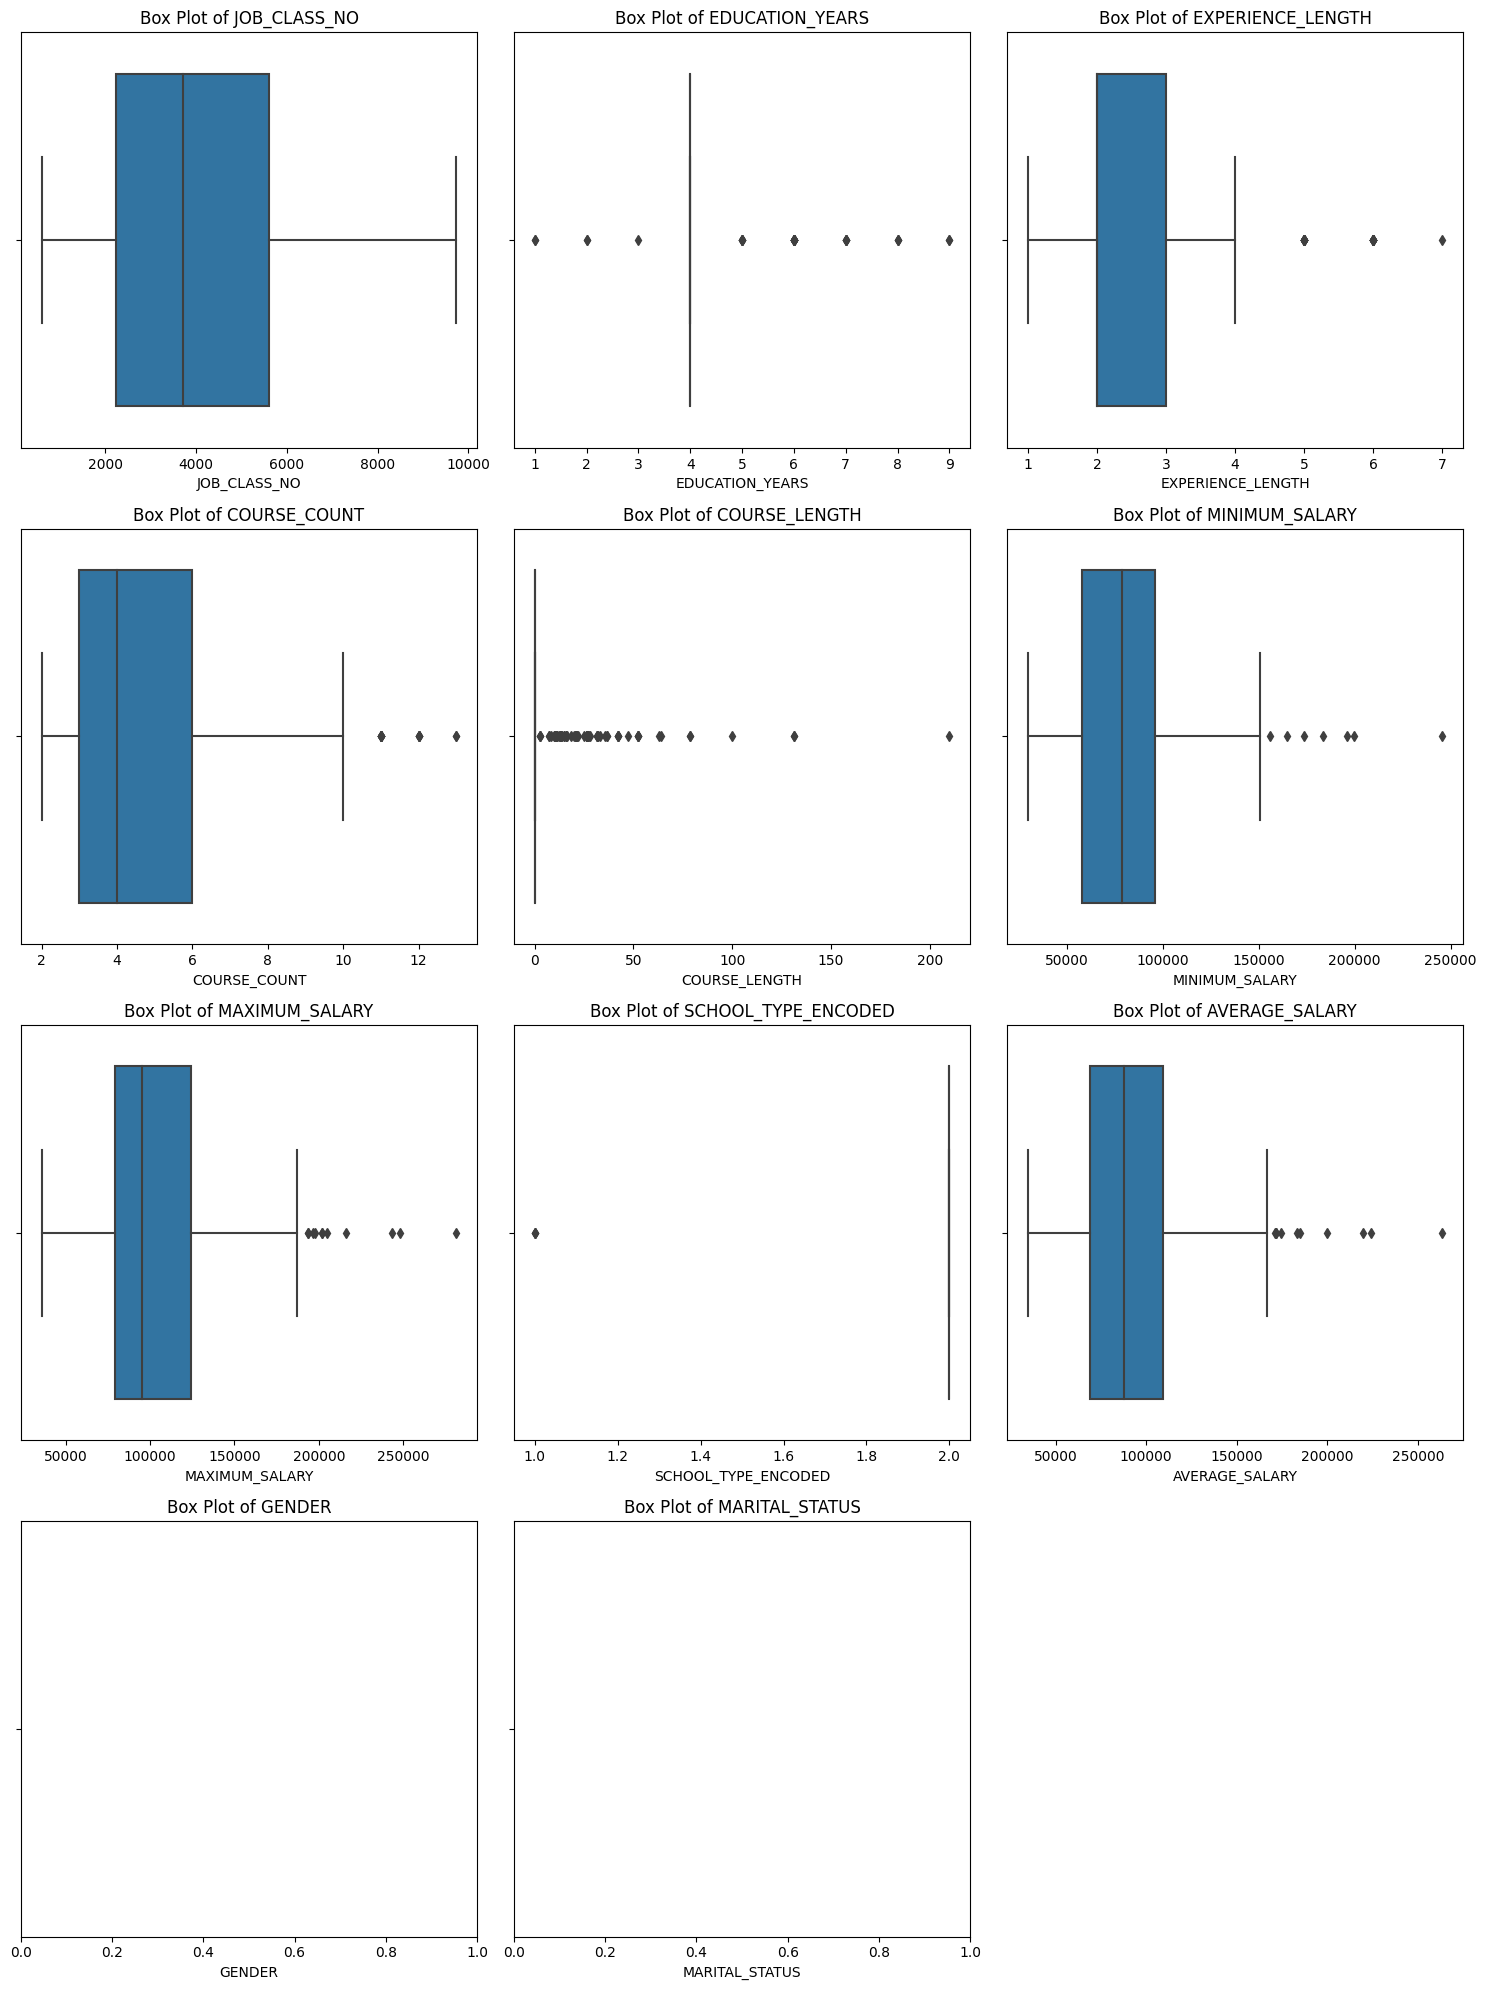

Summary Statistics for Numerical Columns:
       JOB_CLASS_NO  EDUCATION_YEARS  EXPERIENCE_LENGTH  COURSE_COUNT  \
count    617.000000       617.000000         591.000000    617.000000   
mean    4157.705024         4.095624           2.411168      4.411669   
std     2414.246212         0.604848           1.129786      2.283991   
min      602.000000         1.000000           1.000000      2.000000   
25%     2235.000000         4.000000           2.000000      3.000000   
50%     3721.000000         4.000000           2.000000      4.000000   
75%     5615.000000         4.000000           3.000000      6.000000   
max     9734.000000         9.000000           7.000000     13.000000   

       COURSE_LENGTH  MINIMUM_SALARY  MAXIMUM_SALARY  SCHOOL_TYPE_ENCODED  \
count     617.000000      617.000000      617.000000           617.000000   
mean        4.230551    80035.564019   103530.653160             1.995138   
std        15.486026    28291.268693    35587.692551             0.06

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('jobbs_descriptive.csv')

# Select numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Calculate the number of rows and columns for subplots
num_plots = len(numerical_columns)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)
num_cols = min(num_plots, 3)

# Display summary statistics
summary_statistics = df[numerical_columns].describe()

# Visualize the distribution of numerical columns
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualize box plots for numerical columns
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

# Display summary statistics
print("Summary Statistics for Numerical Columns:")
print(summary_statistics)



Statistical description for JOB_CLASS_NO:
count     617.000000
mean     4157.705024
std      2414.246212
min       602.000000
25%      2235.000000
50%      3721.000000
75%      5615.000000
max      9734.000000
Name: JOB_CLASS_NO, dtype: float64


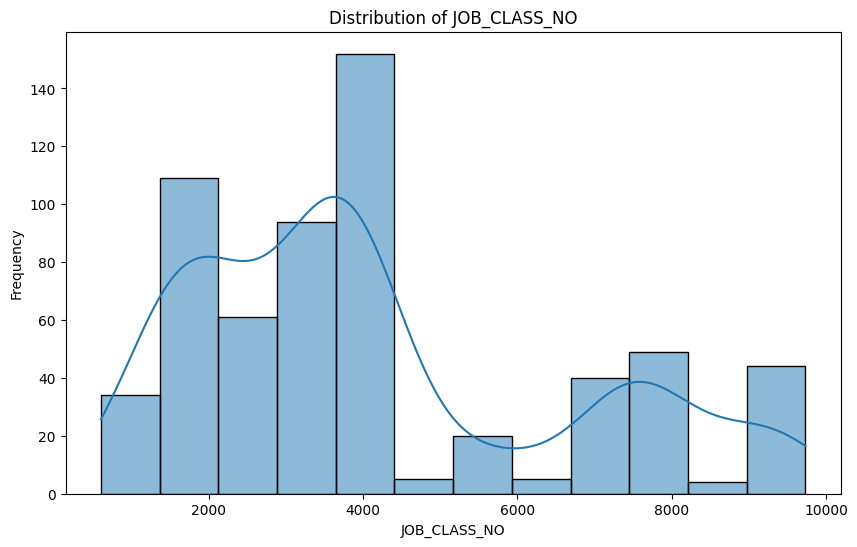

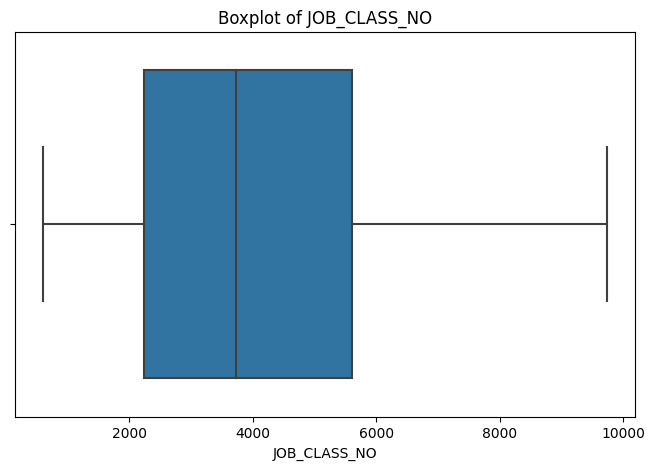


Statistical description for EDUCATION_YEARS:
count    617.000000
mean       4.095624
std        0.604848
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        9.000000
Name: EDUCATION_YEARS, dtype: float64


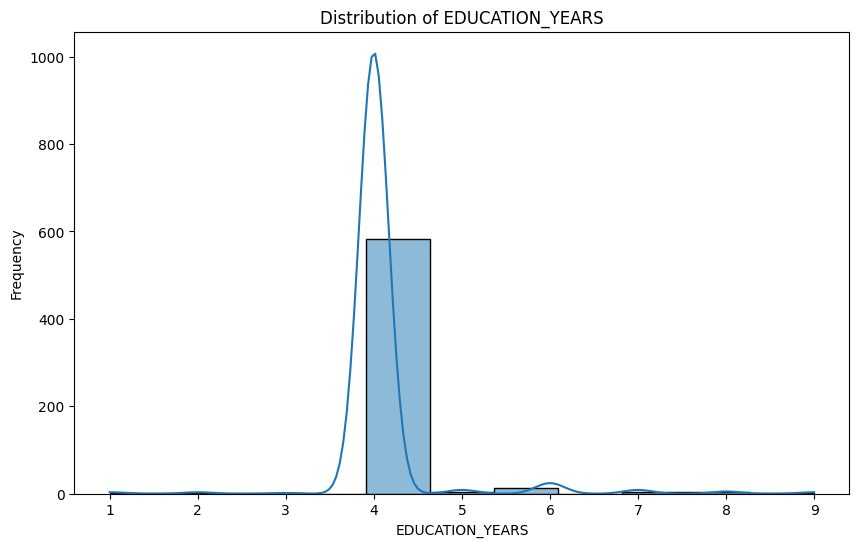

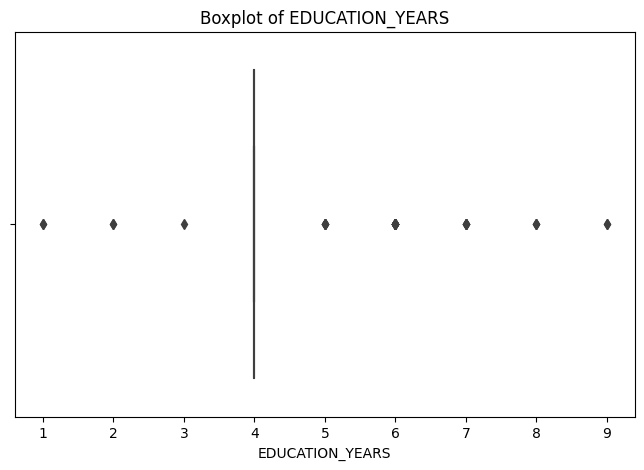


Statistical description for EXPERIENCE_LENGTH:
count    591.000000
mean       2.411168
std        1.129786
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: EXPERIENCE_LENGTH, dtype: float64


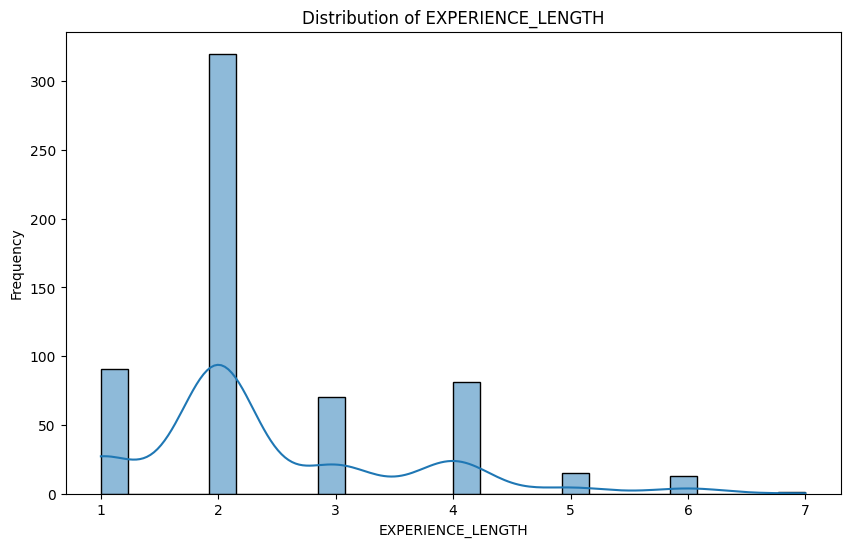

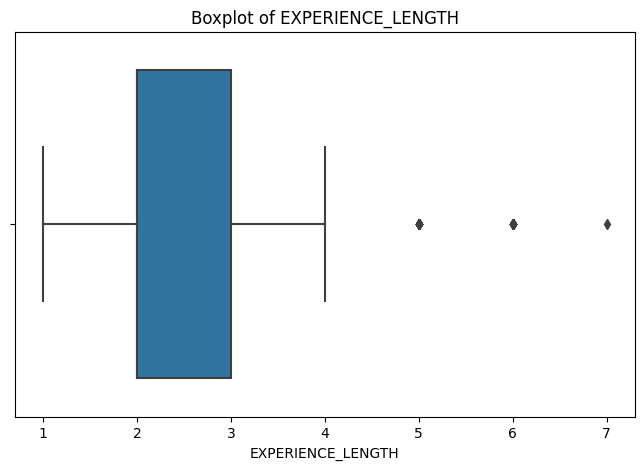


Statistical description for COURSE_COUNT:
count    617.000000
mean       4.411669
std        2.283991
min        2.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       13.000000
Name: COURSE_COUNT, dtype: float64


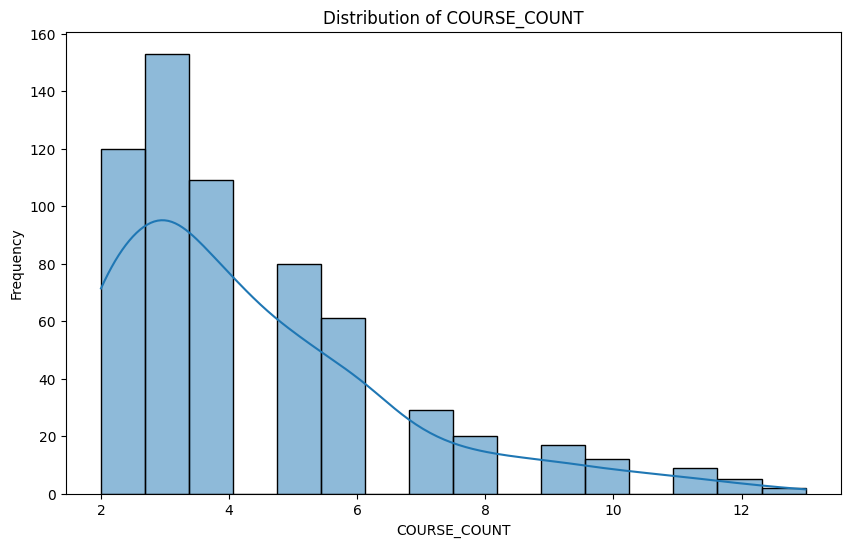

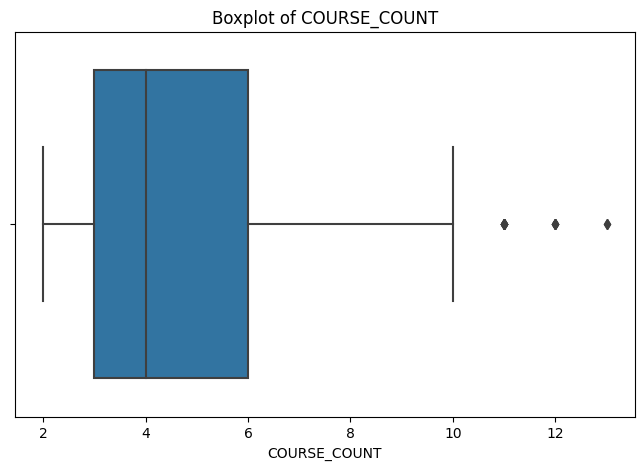


Statistical description for COURSE_LENGTH:
count    617.000000
mean       4.230551
std       15.486026
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      210.000000
Name: COURSE_LENGTH, dtype: float64


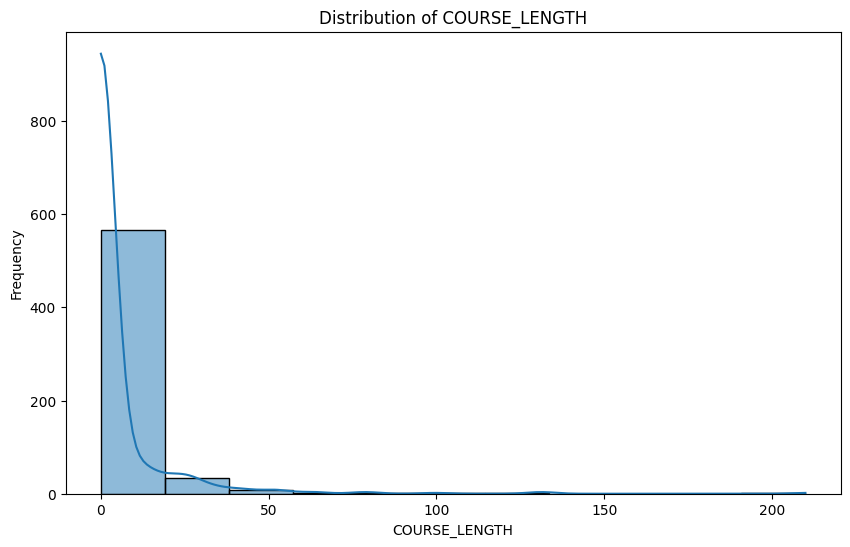

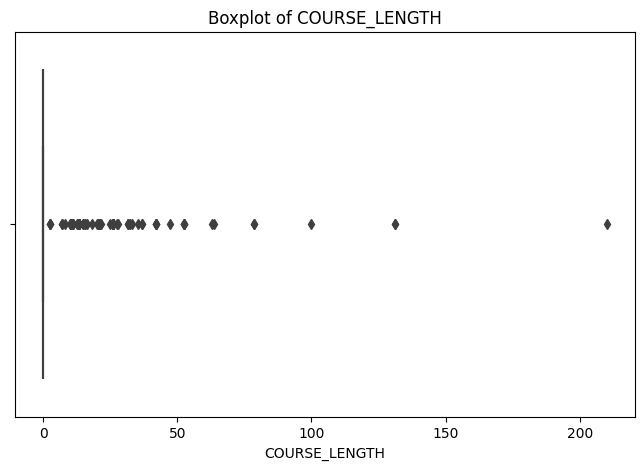


Statistical description for MINIMUM_SALARY:
count       617.000000
mean      80035.564019
std       28291.268693
min       29733.000000
25%       58171.000000
50%       78801.000000
75%       96074.000000
max      245758.000000
Name: MINIMUM_SALARY, dtype: float64


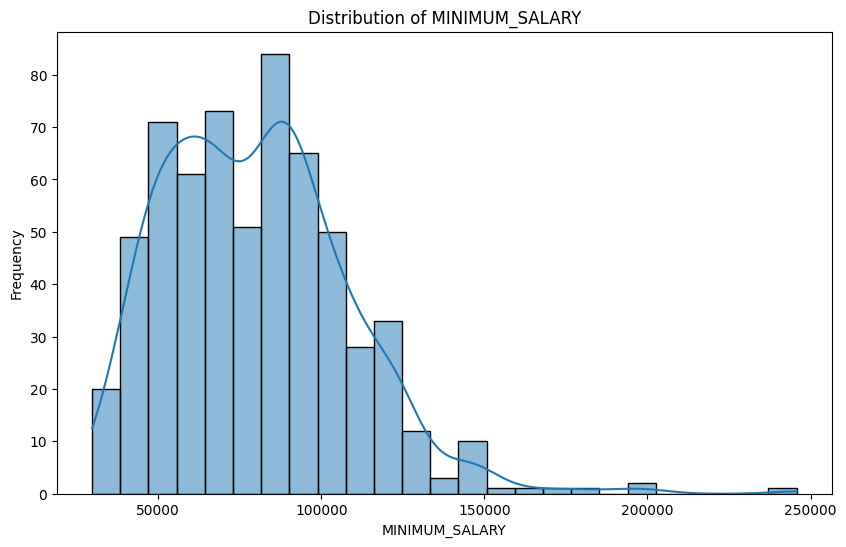

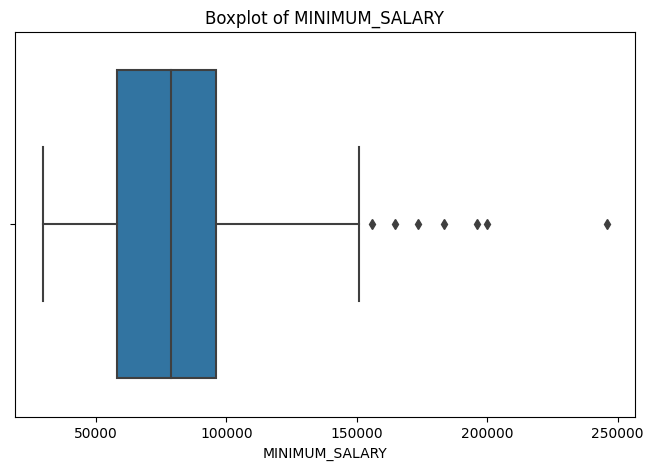


Statistical description for MAXIMUM_SALARY:
count       617.000000
mean     103530.653160
std       35587.692551
min       35809.000000
25%       79156.000000
50%       95317.000000
75%      124382.000000
max      281462.000000
Name: MAXIMUM_SALARY, dtype: float64


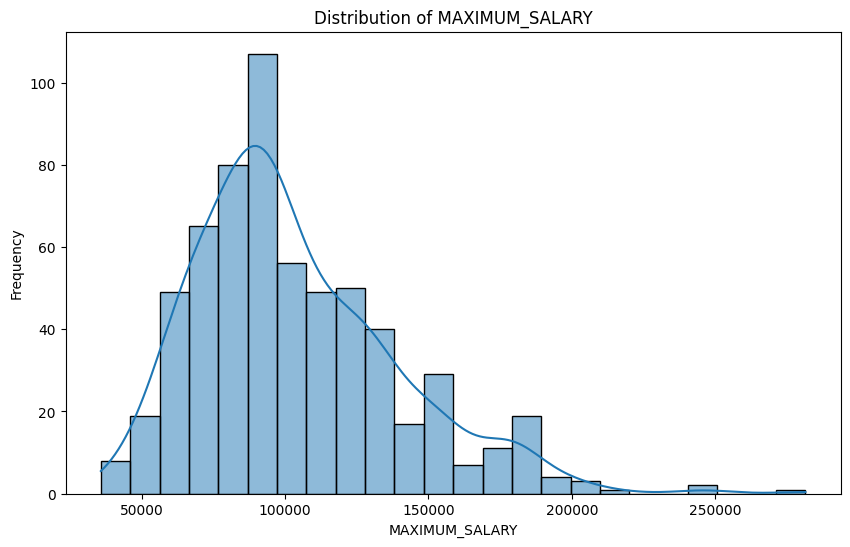

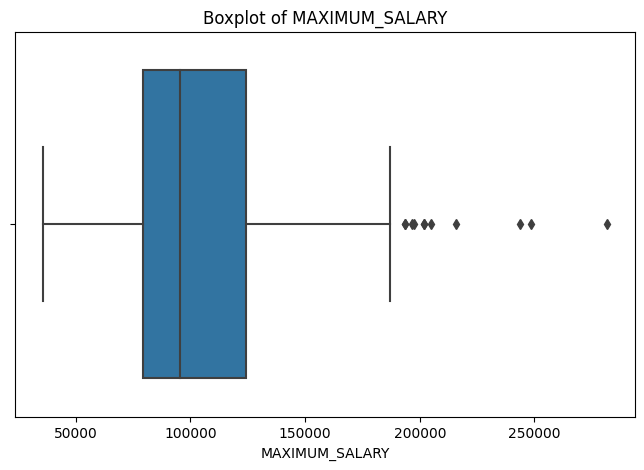


Statistical description for SCHOOL_TYPE_ENCODED:
count    617.000000
mean       1.995138
std        0.069616
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: SCHOOL_TYPE_ENCODED, dtype: float64


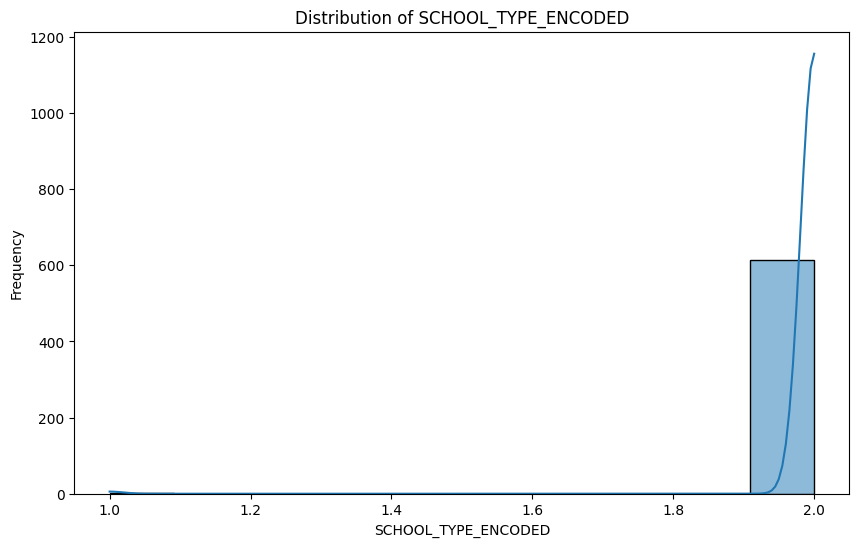

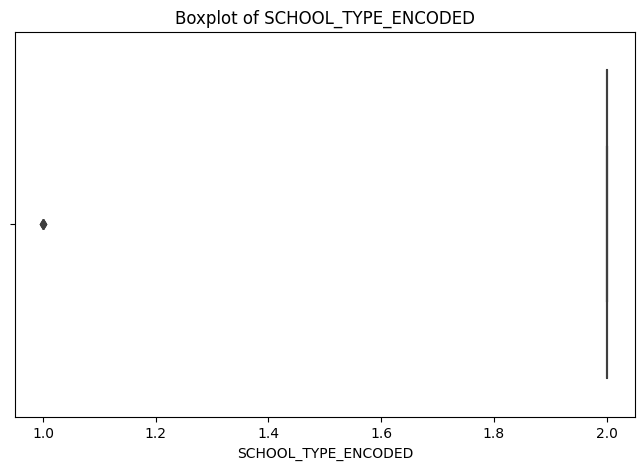


Statistical description for AVERAGE_SALARY:
count       617.000000
mean      91783.108590
std       31247.468771
min       34671.000000
25%       68788.500000
50%       88030.000000
75%      109223.000000
max      263610.000000
Name: AVERAGE_SALARY, dtype: float64


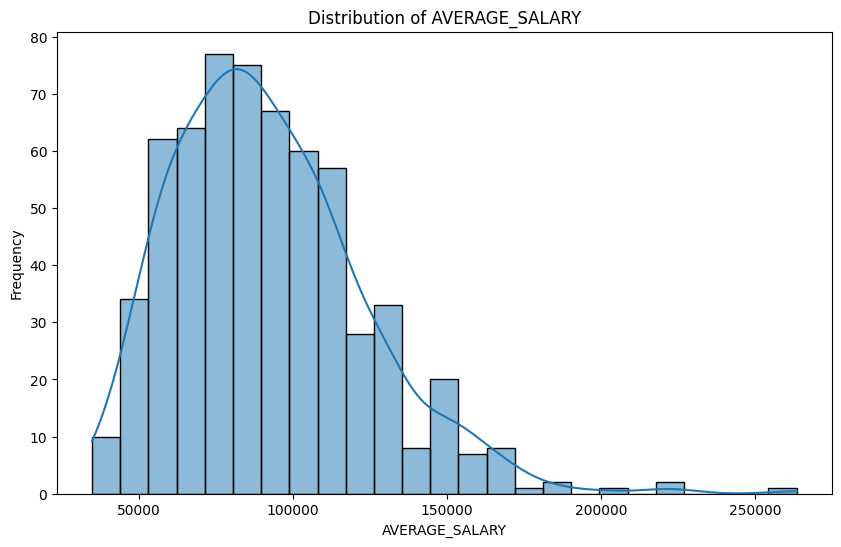

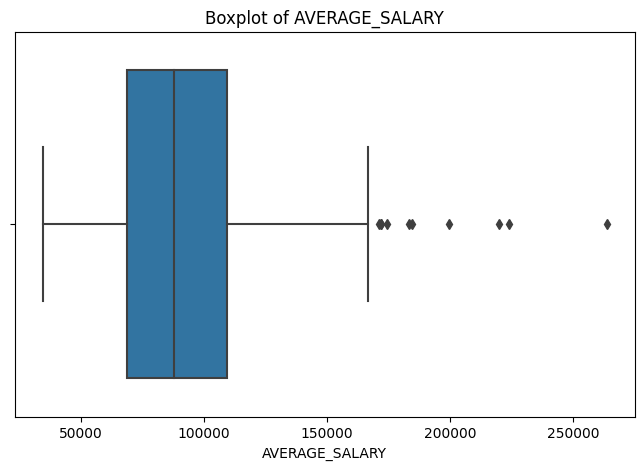


Statistical description for GENDER:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: GENDER, dtype: float64


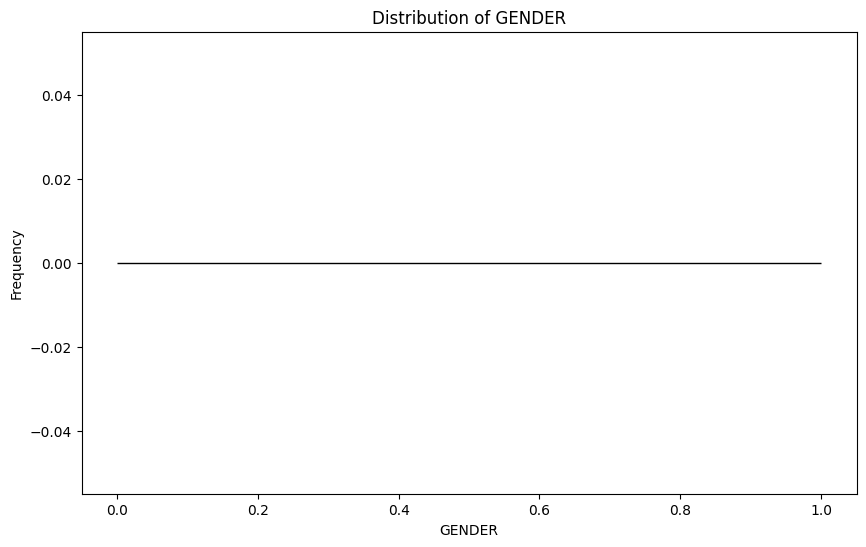

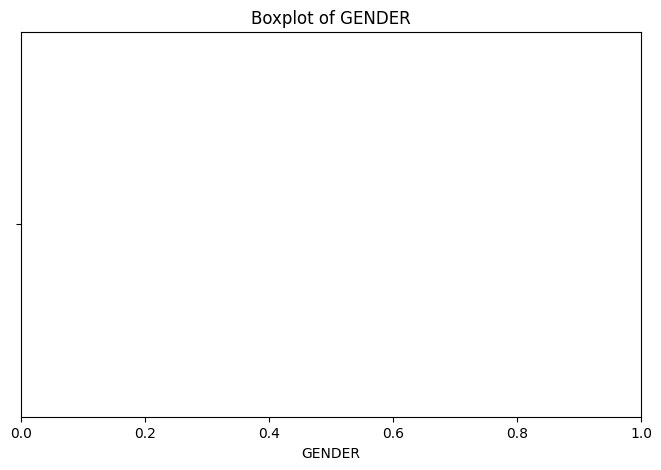


Statistical description for MARITAL_STATUS:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MARITAL_STATUS, dtype: float64


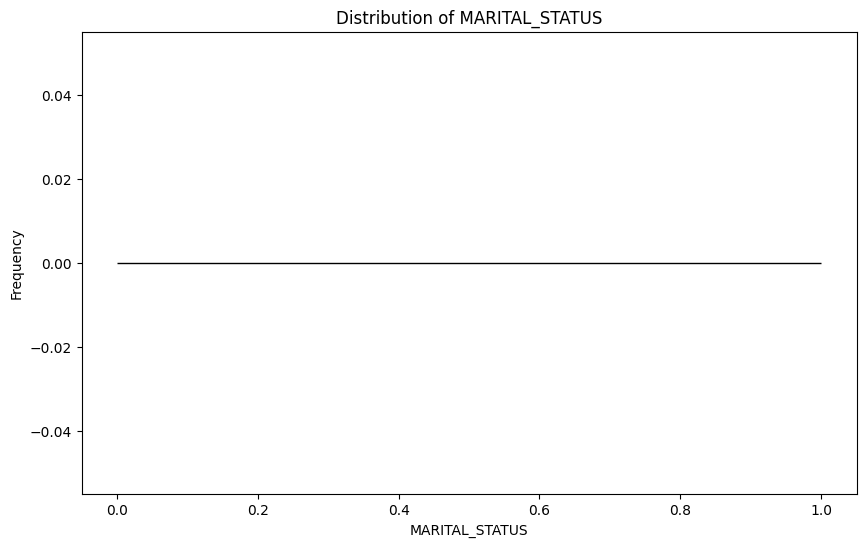

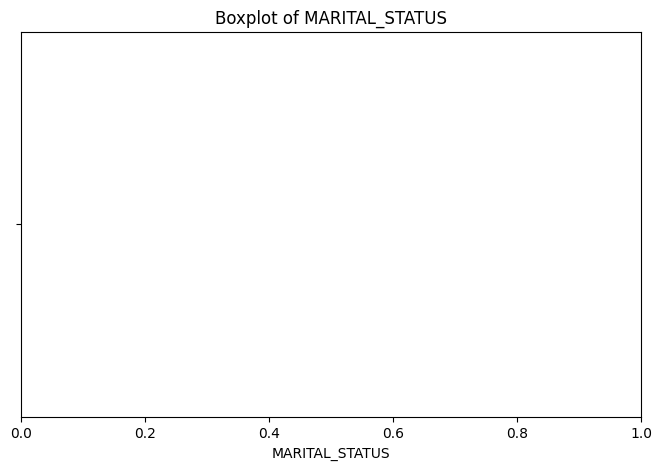

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('jobbs_descriptive.csv')

# Extract numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Univariate analysis for continuous variables
for column in numerical_columns:
    print(f"\nStatistical description for {column}:")
    print(df[column].describe())

    # Visualize the distribution of the variable
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Visualize boxplot to identify outliers
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


## <span style="color:brown">Q11:

Give a full statistical description for the categorical data columns that can be descriped including all insights and needed figures to visualize them.


In [46]:
!pip install --upgrade --force-reinstall typing-extensions


  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.


Index(['FILE_NAME', 'JOB_CLASS_TITLE', 'JOB_CLASS_NO', 'JOB_DUTIES',
       'EDUCATION_YEARS', 'SCHOOL_TYPE', 'EDUCATION_MAJOR',
       'EXPERIENCE_LENGTH', 'FULL_TIME_PART_TIME', 'EXP_JOB_CLASS_TITLE',
       'COURSE_COUNT', 'COURSE_LENGTH', 'DRIVERS_LICENSE_REQ', 'EXAM_TYPE',
       'ENTRY_SALARY', 'OPEN_DATE', 'REQUIREMENT_SET_TEXT', 'MINIMUM_SALARY',
       'MAXIMUM_SALARY', 'COURSE_SUBJECT.1', 'set_text', 'SCHOOL_TYPE_ENCODED',
       'AVERAGE_SALARY', 'GENDER', 'MARITAL_STATUS'],
      dtype='object')


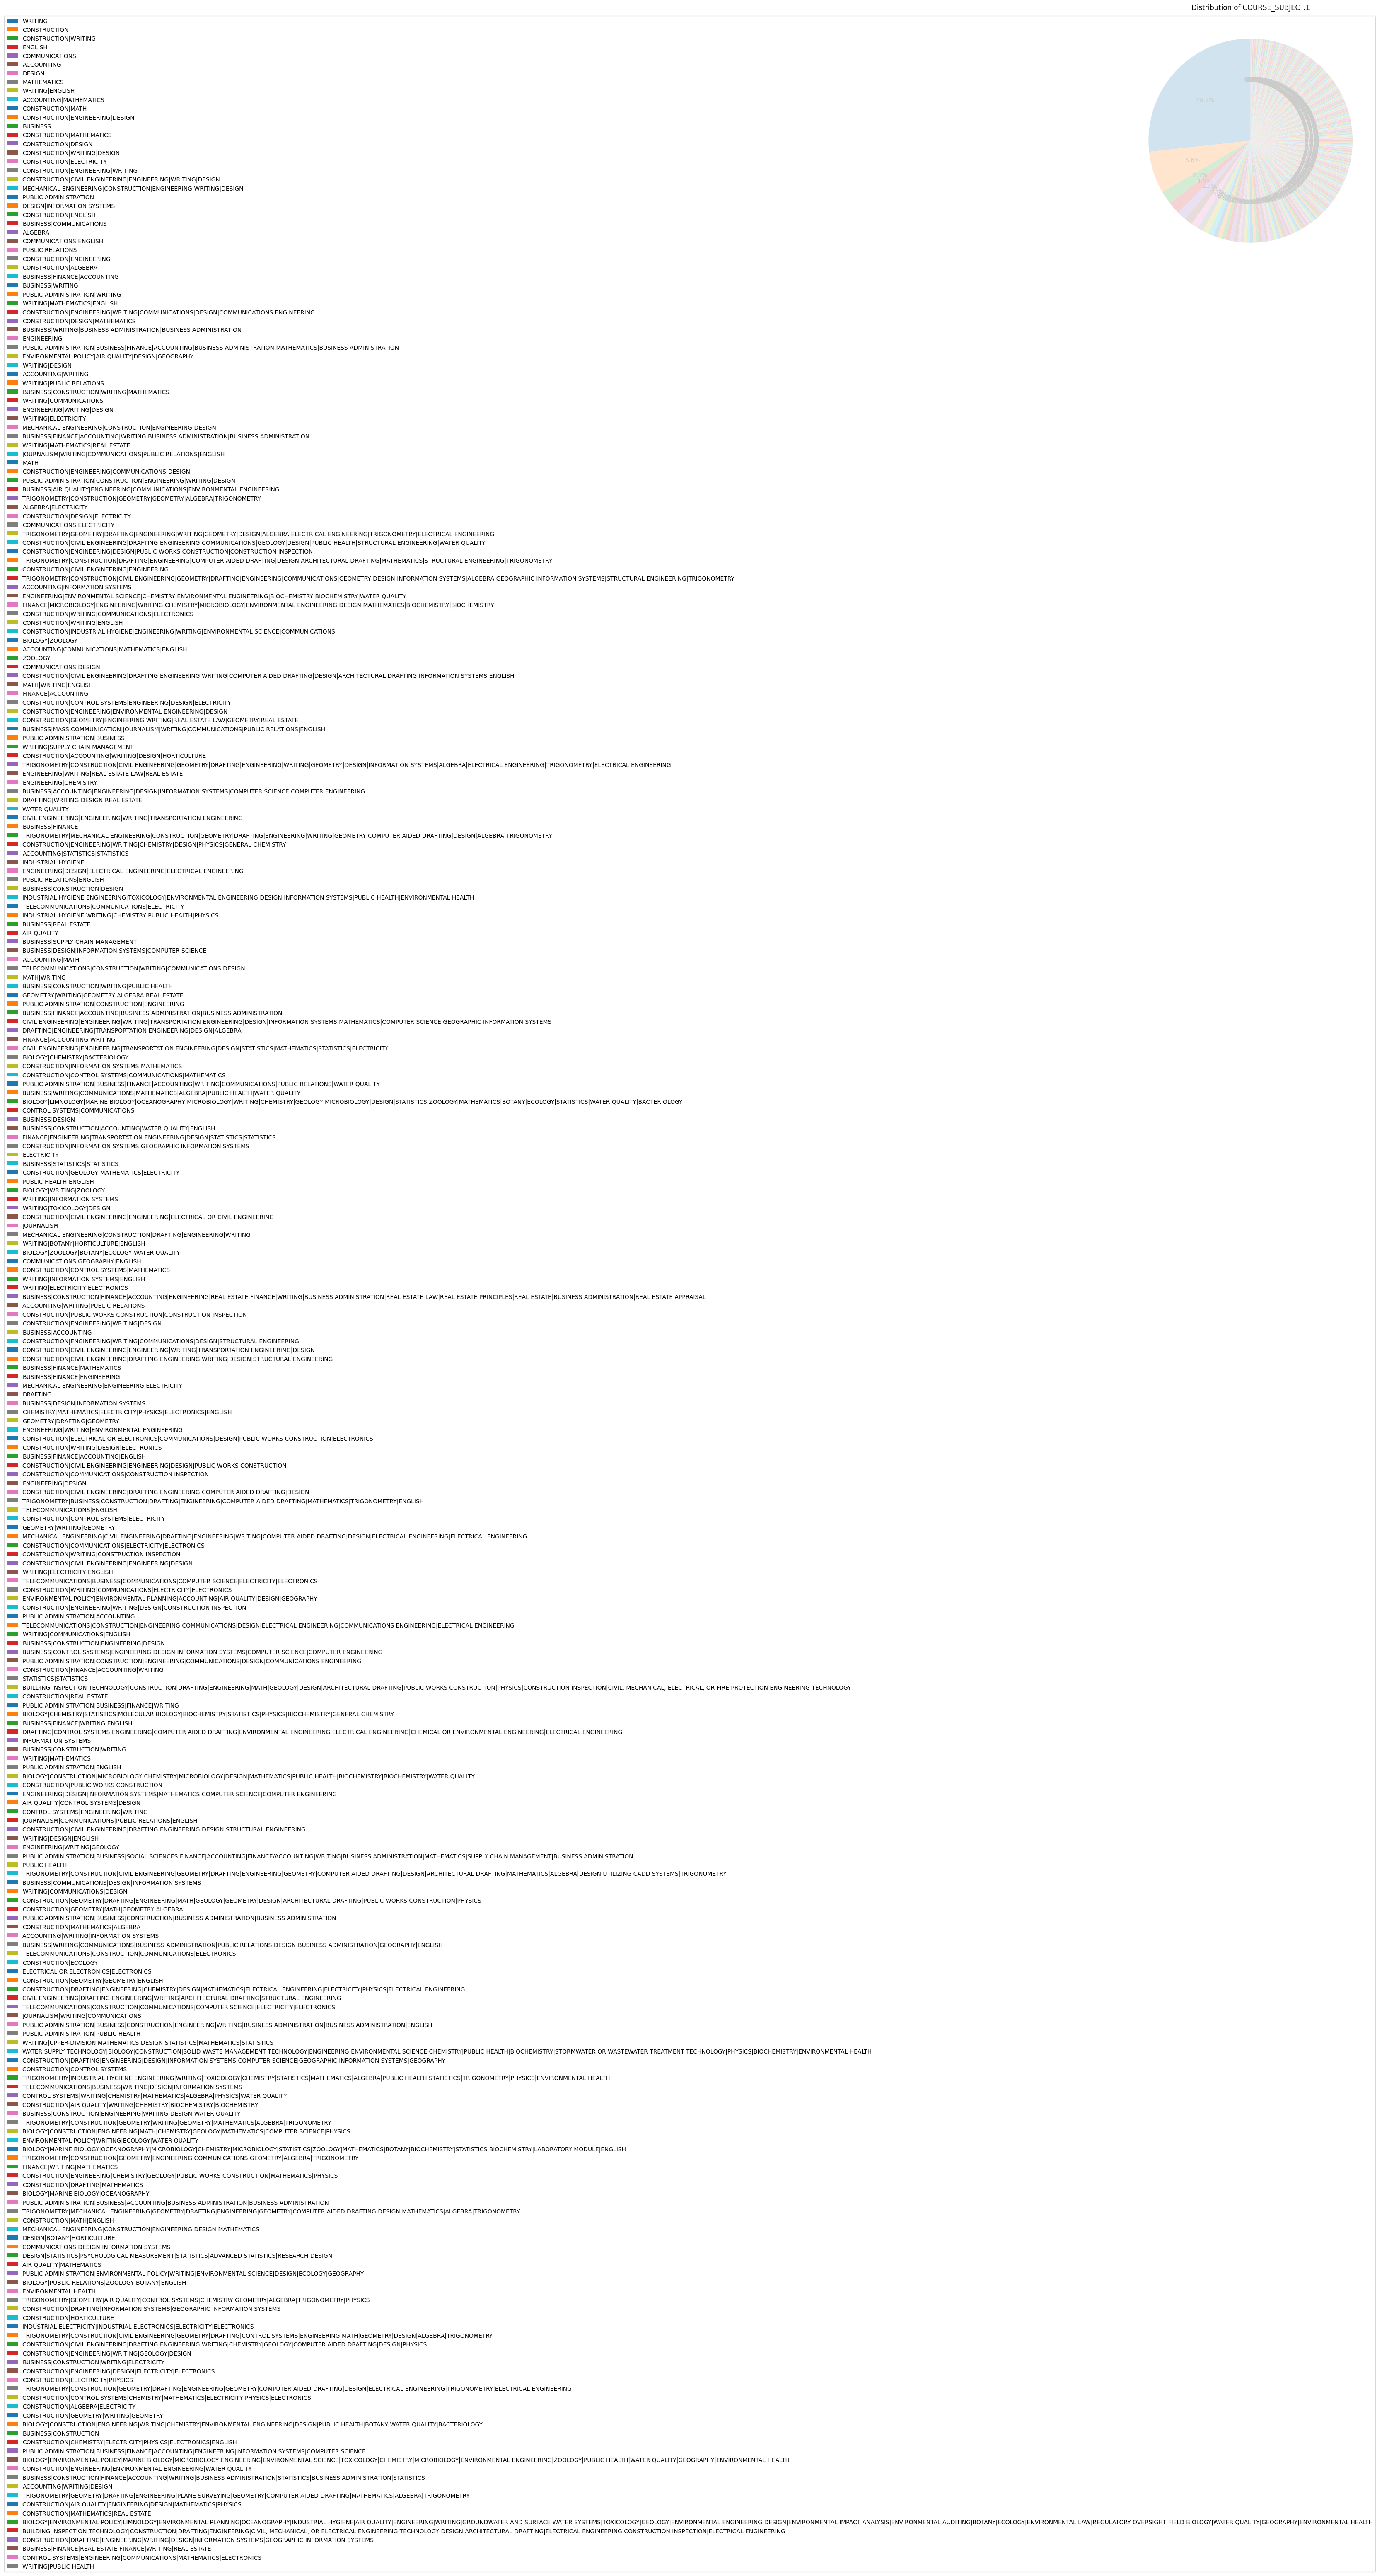

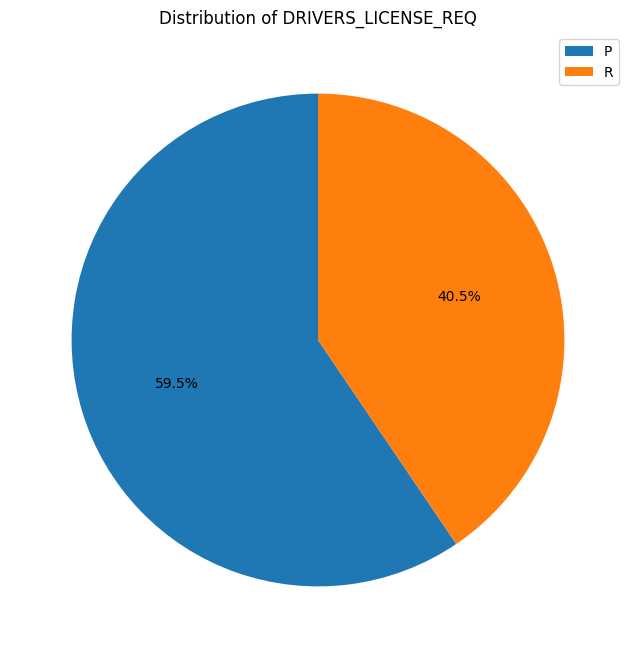

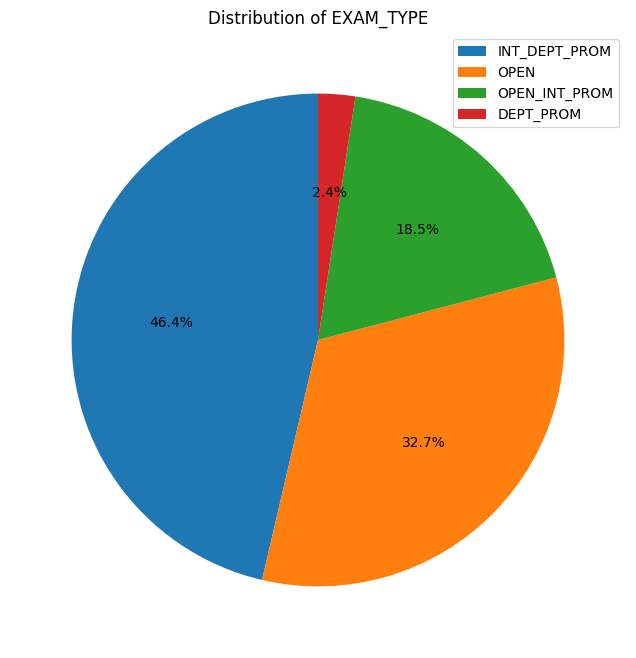

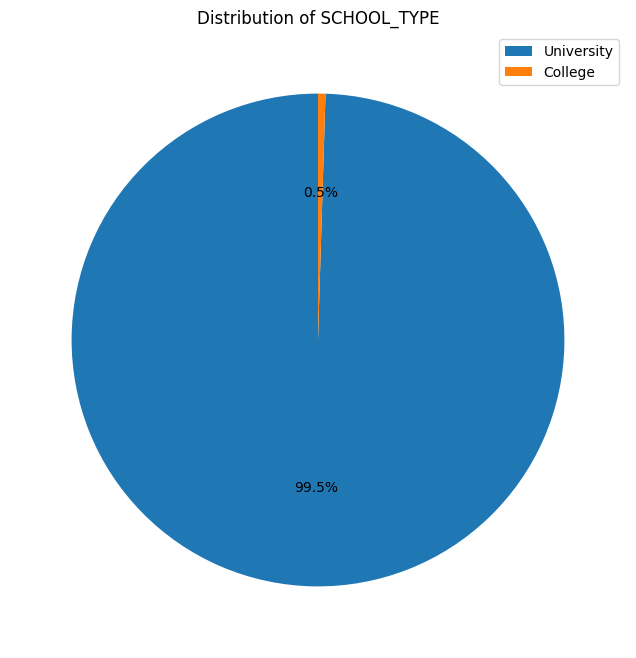

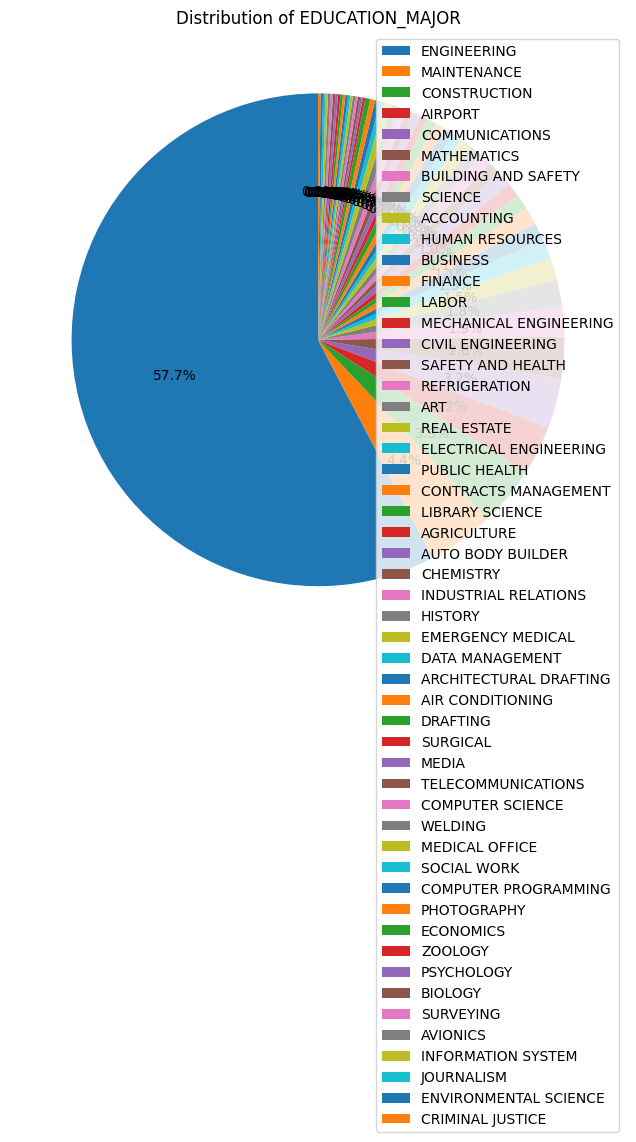

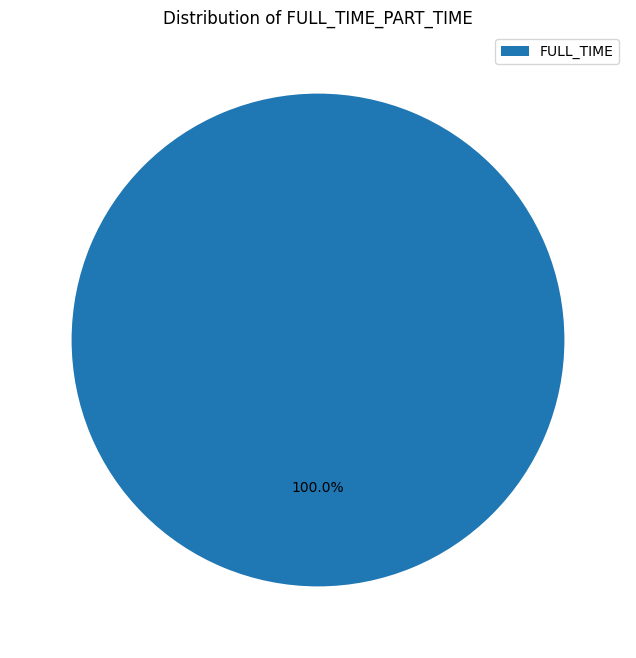

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('jobbs_descriptive.csv')

# Check the column names in your DataFrame
print(df.columns)

# Specify the correct categorical columns
categorical_columns = ["COURSE_SUBJECT.1", "DRIVERS_LICENSE_REQ", "EXAM_TYPE", "SCHOOL_TYPE", "EDUCATION_MAJOR", "FULL_TIME_PART_TIME"]

# Loop through each categorical column
for column in categorical_columns:
    # Get value counts for each category in the column
    value_counts = df[column].value_counts()

    # Plot a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(value_counts, autopct="%.1f%%", startangle=90)
    plt.legend(value_counts.index, loc='upper right')
    plt.title(f'Distribution of {column}')
    plt.show()
